In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Visakhapatnam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
3489,3726,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.32,0.39,0.71,...,306.0,2527.0,681.0,13.53,0.74,1.33,3.44,1.42,12.44,Sugarcane
3490,3727,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.27,0.52,0.66,...,159.0,2541.0,937.0,39.25,0.70,1.72,34.78,3.60,3.90,Sugarcane
3491,3728,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.26,0.14,0.42,...,231.0,711.0,299.0,3.94,0.88,1.00,4.50,0.49,10.60,Paddy/ Sugarcane
3492,3729,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.09,0.16,0.27,...,105.0,951.0,436.0,3.50,0.54,0.83,9.86,1.05,16.68,Paddy/ Sugarcane
3493,3730,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,7.90,0.12,0.19,...,42.0,449.0,150.0,2.75,0.74,0.49,10.44,0.81,14.28,Paddy/ Sugarcane


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,6.809927,0.165418,0.642691,10.683745,153.418182,1239.952727,319.054545,10.000509,0.923091,0.924800,38.874036,1.968691,45.837018
std,1.037585,0.221806,0.380173,12.766050,149.612454,710.870368,207.867186,19.193245,0.772242,0.698839,45.426617,1.161285,37.485161
min,4.850000,0.020000,0.040000,1.620000,36.000000,250.000000,59.000000,0.630000,0.120000,0.160000,2.760000,0.420000,3.900000
25%,5.920000,0.060000,0.365000,3.815000,88.000000,630.500000,149.000000,2.975000,0.480000,0.510000,15.260000,1.100000,18.230000
50%,6.610000,0.110000,0.610000,6.450000,119.000000,1068.000000,277.000000,4.970000,0.720000,0.730000,25.820000,1.840000,31.380000
75%,7.745000,0.180000,0.800000,11.660000,169.500000,1690.500000,441.000000,9.010000,1.030000,1.140000,41.520000,2.410000,65.640000
max,9.420000,2.520000,2.640000,101.770000,2037.000000,3617.000000,1156.000000,184.300000,5.580000,7.430000,354.700000,8.340000,256.880000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black ', 'RED', '   Black', 'Red Sandy', 'Red', ' Red', 'Black  ',
       'Black', 'red sandy', 'red sandy\\', 'black sandy', 'blacksandy',
       'black sandy ', 'black', 'Red ', 'Black Sandy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', '   Black', 'Black  ', 'Black', 'black', 'Black '], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['RED', 'Red', ' Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'red sandy', 'red sandy\\'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['black sandy', 'blacksandy', 'black sandy', 'Black Sandy', 'black sandy '], 'Black Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Black Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 123,
 'Red Soil': 69,
 'Red Sandy Soil': 54,
 'Black Sandy Soil': 29}

<BarContainer object of 4 artists>

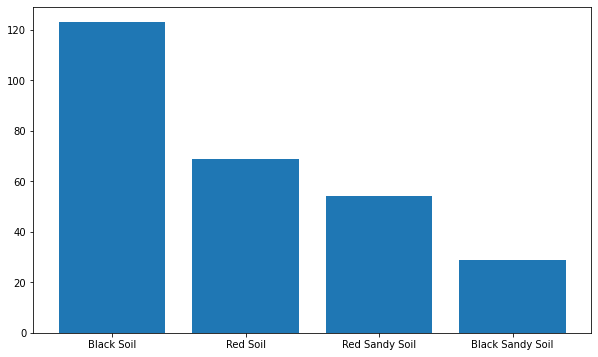

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Sugarcane ', 'Paddy/ Sugarcane', 'Paddy', 'Sugarcane',
       'suger cane ', 'paddy', 'SUGER CANE ', 'Ragi/Niger',
       'Maize/Paddy/Rajma', 'Maize/Rajma', 'Rajma/Maize',
       'Paddy/Maize/G.N', 'Maize', 'Groundnut', 'Turmeric', 'Ragi',
       'Paddy/Maize'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/ Sugarcane     81
Paddy/Maize/G.N      33
Sugarcane            24
Paddy                20
Maize/Paddy/Rajma    20
suger cane           18
Paddy/Maize          16
Ragi/Niger           15
Rajma/Maize          14
Maize/Rajma          10
SUGER CANE            8
paddy                 7
Sugarcane             5
Groundnut             1
Turmeric              1
Maize                 1
Ragi                  1
Name: Crop, dtype: int64

Paddy + SugarCane    163
Paddy + Maize         70
Maize + Rajma         24
Ragi                  16
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

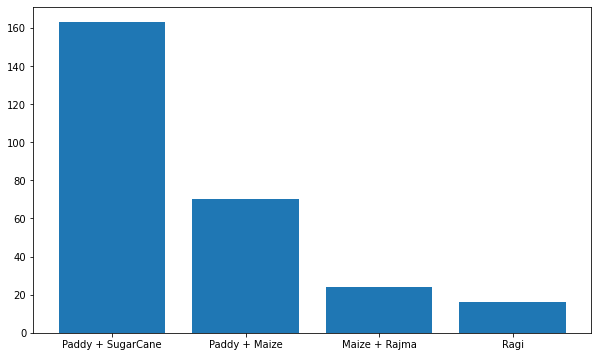

In [15]:
df['Crop'] = df['Crop'].replace(['Sugarcane ', 'Sugarcane', 'suger cane ', 'SUGER CANE '], 'SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy/ Sugarcane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy', 'paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Maize/Rajma', 'Rajma/Maize'], 'Maize + Rajma')
df['Crop'] = df['Crop'].replace(['Maize/Paddy/Rajma', 'Paddy/Maize/G.N', 'Maize', 'Paddy/Maize'], 'Paddy + Maize')
df['Crop'] = df['Crop'].replace(['Paddy + SugarCane', 'Paddy', 'SugarCane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace('Ragi/Niger', 'Ragi')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Turmeric')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.480688,-0.333383,0.212552,0.120609,0.635819,0.665875,0.375249,-0.112625,0.564074,-0.461003,-0.302912,-0.632308
EC,0.480688,1.000000,-0.113811,0.189278,0.579347,0.304698,0.353923,0.905148,0.032202,0.542661,-0.160148,-0.055957,-0.275806
OC,-0.333383,-0.113811,1.000000,-0.003450,0.216241,0.027773,-0.158163,-0.107069,0.541595,-0.030128,0.351817,0.446556,0.573010
P,0.212552,0.189278,-0.003450,1.000000,0.172696,0.205397,0.283987,0.143692,0.492402,0.210786,0.100140,0.104467,-0.227438
K,0.120609,0.579347,0.216241,0.172696,1.000000,0.062876,0.058264,0.468951,0.245236,0.173017,-0.063486,0.017689,0.071308
Ca,0.635819,0.304698,0.027773,0.205397,0.062876,1.000000,0.806148,0.252167,0.005950,0.509460,-0.149374,0.107125,-0.313804
Mg,0.665875,0.353923,-0.158163,0.283987,0.058264,0.806148,1.000000,0.270701,-0.056657,0.590767,-0.130534,0.116103,-0.424087
S,0.375249,0.905148,-0.107069,0.143692,0.468951,0.252167,0.270701,1.000000,-0.007399,0.531710,-0.096959,0.005405,-0.218240
Zn,-0.112625,0.032202,0.541595,0.492402,0.245236,0.005950,-0.056657,-0.007399,1.000000,-0.009086,0.416219,0.408112,0.287436
B,0.564074,0.542661,-0.030128,0.210786,0.173017,0.509460,0.590767,0.531710,-0.009086,1.000000,-0.149671,0.054915,-0.319448


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu', 'Mn']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe  Black Sandy Soil  Black Soil  \
3489  8.32  0.39  0.71  8.15  3.44                 0           1   

      Red Sandy Soil  Red Soil  
3489               0         0  
3489    Paddy + SugarCane
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:5] = sc1.fit_transform(X[:, 0:5])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.782608695652174


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.95 %
Standard Deviation: 8.16 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8115942028985508


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.71 %
Standard Deviation: 7.58 %


# Random Forest Classifier

In [31]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8115942028985508


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.95 %
Standard Deviation: 7.03 %


In [35]:
pickle.dump(clf3, open('Visakhapatnam_model.pkl', 'wb'))
pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# XGBoost

In [36]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [37]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7971014492753623


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [40]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.02 %
Standard Deviation: 9.16 %


In [41]:
# pickle.dump(clf4, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8235294117647058
Testing Accuracy:  0.8115942028985508


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.12 %
Standard Deviation: 9.36 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8847196	total: 146ms	remaining: 14.5s
1:	learn: 0.7371834	total: 147ms	remaining: 7.19s
2:	learn: 0.6333379	total: 147ms	remaining: 4.76s
3:	learn: 0.5935971	total: 148ms	remaining: 3.54s
4:	learn: 0.5803048	total: 148ms	remaining: 2.81s
5:	learn: 0.5572134	total: 148ms	remaining: 2.32s
6:	learn: 0.5328766	total: 149ms	remaining: 1.97s
7:	learn: 0.5203770	total: 149ms	remaining: 1.71s
8:	learn: 0.4970234	total: 149ms	remaining: 1.51s
9:	learn: 0.4713225	total: 150ms	remaining: 1.35s
10:	learn: 0.4340386	total: 150ms	remaining: 1.21s
11:	learn: 0.4190773	total: 150ms	remaining: 1.1s
12:	learn: 0.4068772	total: 151ms	remaining: 1.01s
13:	learn: 0.3806816	total: 151ms	remaining: 929ms
14:	learn: 0.3714793	total: 152ms	remaining: 860ms
15:	learn: 0.3625349	total: 152ms	remaining: 799ms
16:	learn: 0.3570460	total: 152ms	remaining: 744ms
17:	learn: 0.3447618	total: 153ms	remaining: 696ms
18:	learn: 0.3395647	total: 153ms	remaining: 653ms
19:	learn: 0.3296461	total: 154ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8094845104
bestIteration = 99

Training on fold [1/5]

bestTest = 0.7507279583
bestIteration = 99

Training on fold [2/5]

bestTest = 0.6729233486
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6847401774
bestIteration = 99

Training on fold [4/5]

bestTest = 0.6251774154
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3545975	test: 1.3610288	best: 1.3610288 (0)	total: 1.08ms	remaining: 1.08s
1:	learn: 1.3178093	test: 1.3324414	best: 1.3324414 (1)	total: 2.48ms	remaining: 1.24s
2:	learn: 1.2954034	test: 1.3190974	best: 1.3190974 (2)	total: 3.67ms	remaining: 1.22s
3:	learn: 1.2678471	test: 1.2953688	best: 1.2953688 (3)	total: 4.54ms	remaining: 1.13s
4:	learn: 1.2405470	test: 1.2723803	best: 1.2723803 (4)	total: 5.38ms	remaining: 1.07s
5:	learn: 1.2230930	test: 1.2622299	best: 1.2622299 (5)	total: 6.27ms	remaining: 1.04s
6:	learn: 1.1999918	test: 1.2416371	best: 1.2416371 (6)	total: 7.11ms	remaining: 1.01s
7:	learn: 1.1803768	test: 1.2278660	best: 1.2278660 (7)	total: 7.9ms	remaining: 980ms
8:	learn: 1.1617422	test: 1.2129899	best: 1.2129899 (8)	total: 8.76ms	remaining: 965ms
9:	learn: 1.1420478	test: 1.1989215	best: 1.1989215 (9)	total: 9.62ms	remaining: 952ms
10:	learn: 1.1243086	test: 1.1834603	best: 1.1834603 (10)	total: 10.6ms	remaining: 950ms
11:	learn: 1.1072013	test: 1.1720370	best:

137:	learn: 0.4560896	test: 0.7812509	best: 0.7812509 (137)	total: 164ms	remaining: 1.02s
138:	learn: 0.4547783	test: 0.7813218	best: 0.7812509 (137)	total: 166ms	remaining: 1.03s
139:	learn: 0.4530026	test: 0.7806696	best: 0.7806696 (139)	total: 167ms	remaining: 1.03s
140:	learn: 0.4517778	test: 0.7809254	best: 0.7806696 (139)	total: 169ms	remaining: 1.03s
141:	learn: 0.4502696	test: 0.7810150	best: 0.7806696 (139)	total: 170ms	remaining: 1.03s
142:	learn: 0.4482095	test: 0.7797398	best: 0.7797398 (142)	total: 171ms	remaining: 1.02s
143:	learn: 0.4463962	test: 0.7791173	best: 0.7791173 (143)	total: 172ms	remaining: 1.02s
144:	learn: 0.4446846	test: 0.7792518	best: 0.7791173 (143)	total: 173ms	remaining: 1.02s
145:	learn: 0.4426353	test: 0.7783258	best: 0.7783258 (145)	total: 175ms	remaining: 1.02s
146:	learn: 0.4410150	test: 0.7776688	best: 0.7776688 (146)	total: 176ms	remaining: 1.02s
147:	learn: 0.4393292	test: 0.7772876	best: 0.7772876 (147)	total: 178ms	remaining: 1.02s
148:	learn

366:	learn: 0.2328466	test: 0.7386503	best: 0.7366009 (301)	total: 497ms	remaining: 857ms
367:	learn: 0.2322141	test: 0.7381713	best: 0.7366009 (301)	total: 498ms	remaining: 855ms
368:	learn: 0.2315514	test: 0.7389097	best: 0.7366009 (301)	total: 499ms	remaining: 854ms
369:	learn: 0.2308035	test: 0.7397123	best: 0.7366009 (301)	total: 500ms	remaining: 852ms
370:	learn: 0.2304783	test: 0.7392239	best: 0.7366009 (301)	total: 501ms	remaining: 850ms
371:	learn: 0.2301028	test: 0.7387165	best: 0.7366009 (301)	total: 502ms	remaining: 848ms
372:	learn: 0.2296997	test: 0.7390918	best: 0.7366009 (301)	total: 503ms	remaining: 846ms
373:	learn: 0.2291332	test: 0.7396425	best: 0.7366009 (301)	total: 505ms	remaining: 845ms
374:	learn: 0.2282468	test: 0.7380465	best: 0.7366009 (301)	total: 506ms	remaining: 844ms
375:	learn: 0.2279384	test: 0.7377067	best: 0.7366009 (301)	total: 508ms	remaining: 842ms
376:	learn: 0.2273497	test: 0.7382090	best: 0.7366009 (301)	total: 509ms	remaining: 840ms
377:	learn

523:	learn: 0.1660133	test: 0.7419840	best: 0.7366009 (301)	total: 668ms	remaining: 607ms
524:	learn: 0.1656536	test: 0.7416485	best: 0.7366009 (301)	total: 670ms	remaining: 606ms
525:	learn: 0.1653753	test: 0.7419532	best: 0.7366009 (301)	total: 671ms	remaining: 605ms
526:	learn: 0.1650456	test: 0.7418744	best: 0.7366009 (301)	total: 672ms	remaining: 603ms
527:	learn: 0.1649055	test: 0.7423110	best: 0.7366009 (301)	total: 673ms	remaining: 602ms
528:	learn: 0.1646016	test: 0.7420245	best: 0.7366009 (301)	total: 674ms	remaining: 600ms
529:	learn: 0.1642221	test: 0.7425271	best: 0.7366009 (301)	total: 675ms	remaining: 599ms
530:	learn: 0.1640601	test: 0.7422795	best: 0.7366009 (301)	total: 677ms	remaining: 598ms
531:	learn: 0.1638272	test: 0.7426731	best: 0.7366009 (301)	total: 678ms	remaining: 596ms
532:	learn: 0.1634820	test: 0.7423839	best: 0.7366009 (301)	total: 679ms	remaining: 595ms
533:	learn: 0.1632053	test: 0.7430027	best: 0.7366009 (301)	total: 680ms	remaining: 593ms
534:	learn

687:	learn: 0.1246682	test: 0.7591263	best: 0.7366009 (301)	total: 840ms	remaining: 381ms
688:	learn: 0.1244193	test: 0.7594440	best: 0.7366009 (301)	total: 841ms	remaining: 380ms
689:	learn: 0.1242958	test: 0.7596134	best: 0.7366009 (301)	total: 842ms	remaining: 378ms
690:	learn: 0.1241005	test: 0.7595043	best: 0.7366009 (301)	total: 844ms	remaining: 377ms
691:	learn: 0.1239843	test: 0.7594345	best: 0.7366009 (301)	total: 845ms	remaining: 376ms
692:	learn: 0.1237690	test: 0.7594519	best: 0.7366009 (301)	total: 846ms	remaining: 375ms
693:	learn: 0.1234552	test: 0.7594403	best: 0.7366009 (301)	total: 847ms	remaining: 373ms
694:	learn: 0.1232204	test: 0.7596524	best: 0.7366009 (301)	total: 848ms	remaining: 372ms
695:	learn: 0.1229557	test: 0.7600615	best: 0.7366009 (301)	total: 849ms	remaining: 371ms
696:	learn: 0.1227330	test: 0.7603056	best: 0.7366009 (301)	total: 850ms	remaining: 369ms
697:	learn: 0.1225780	test: 0.7606723	best: 0.7366009 (301)	total: 851ms	remaining: 368ms
698:	learn

843:	learn: 0.0995520	test: 0.7750725	best: 0.7366009 (301)	total: 1.01s	remaining: 187ms
844:	learn: 0.0994388	test: 0.7752565	best: 0.7366009 (301)	total: 1.01s	remaining: 186ms
845:	learn: 0.0992786	test: 0.7758933	best: 0.7366009 (301)	total: 1.01s	remaining: 184ms
846:	learn: 0.0991571	test: 0.7758566	best: 0.7366009 (301)	total: 1.01s	remaining: 183ms
847:	learn: 0.0990774	test: 0.7757713	best: 0.7366009 (301)	total: 1.01s	remaining: 182ms
848:	learn: 0.0989243	test: 0.7761231	best: 0.7366009 (301)	total: 1.02s	remaining: 181ms
849:	learn: 0.0987901	test: 0.7758843	best: 0.7366009 (301)	total: 1.02s	remaining: 179ms
850:	learn: 0.0986301	test: 0.7764620	best: 0.7366009 (301)	total: 1.02s	remaining: 178ms
851:	learn: 0.0984465	test: 0.7764938	best: 0.7366009 (301)	total: 1.02s	remaining: 177ms
852:	learn: 0.0983240	test: 0.7765549	best: 0.7366009 (301)	total: 1.02s	remaining: 176ms
853:	learn: 0.0982404	test: 0.7763425	best: 0.7366009 (301)	total: 1.02s	remaining: 175ms
854:	learn

2:	learn: 1.1222190	test: 1.1931156	best: 1.1931156 (2)	total: 3.94ms	remaining: 1.31s
3:	learn: 1.0592358	test: 1.1411547	best: 1.1411547 (3)	total: 5.08ms	remaining: 1.26s
4:	learn: 1.0019125	test: 1.0952948	best: 1.0952948 (4)	total: 6.08ms	remaining: 1.21s
5:	learn: 0.9664852	test: 1.0772789	best: 1.0772789 (5)	total: 7.22ms	remaining: 1.2s
6:	learn: 0.9312470	test: 1.0526133	best: 1.0526133 (6)	total: 8.38ms	remaining: 1.19s
7:	learn: 0.8968789	test: 1.0312891	best: 1.0312891 (7)	total: 9.41ms	remaining: 1.17s
8:	learn: 0.8639247	test: 1.0146809	best: 1.0146809 (8)	total: 10.5ms	remaining: 1.16s
9:	learn: 0.8294256	test: 0.9909675	best: 0.9909675 (9)	total: 11.6ms	remaining: 1.15s
10:	learn: 0.8012130	test: 0.9654140	best: 0.9654140 (10)	total: 12.6ms	remaining: 1.13s
11:	learn: 0.7827646	test: 0.9542035	best: 0.9542035 (11)	total: 13.7ms	remaining: 1.13s
12:	learn: 0.7601250	test: 0.9370077	best: 0.9370077 (12)	total: 14.7ms	remaining: 1.12s
13:	learn: 0.7385685	test: 0.9204346	b

169:	learn: 0.1593850	test: 0.7799861	best: 0.7547373 (79)	total: 177ms	remaining: 864ms
170:	learn: 0.1584412	test: 0.7806217	best: 0.7547373 (79)	total: 178ms	remaining: 864ms
171:	learn: 0.1571154	test: 0.7786548	best: 0.7547373 (79)	total: 179ms	remaining: 863ms
172:	learn: 0.1562307	test: 0.7800381	best: 0.7547373 (79)	total: 181ms	remaining: 865ms
173:	learn: 0.1546235	test: 0.7824216	best: 0.7547373 (79)	total: 182ms	remaining: 865ms
174:	learn: 0.1536897	test: 0.7821431	best: 0.7547373 (79)	total: 183ms	remaining: 864ms
175:	learn: 0.1528356	test: 0.7819940	best: 0.7547373 (79)	total: 184ms	remaining: 863ms
176:	learn: 0.1521428	test: 0.7817668	best: 0.7547373 (79)	total: 185ms	remaining: 861ms
177:	learn: 0.1515230	test: 0.7819531	best: 0.7547373 (79)	total: 186ms	remaining: 860ms
178:	learn: 0.1506260	test: 0.7832408	best: 0.7547373 (79)	total: 187ms	remaining: 859ms
179:	learn: 0.1498631	test: 0.7834262	best: 0.7547373 (79)	total: 188ms	remaining: 857ms
180:	learn: 0.1486339

335:	learn: 0.0732259	test: 0.8438260	best: 0.7547373 (79)	total: 350ms	remaining: 691ms
336:	learn: 0.0730131	test: 0.8449788	best: 0.7547373 (79)	total: 351ms	remaining: 690ms
337:	learn: 0.0727885	test: 0.8461630	best: 0.7547373 (79)	total: 352ms	remaining: 689ms
338:	learn: 0.0725342	test: 0.8455906	best: 0.7547373 (79)	total: 353ms	remaining: 688ms
339:	learn: 0.0722821	test: 0.8464059	best: 0.7547373 (79)	total: 354ms	remaining: 688ms
340:	learn: 0.0720713	test: 0.8477088	best: 0.7547373 (79)	total: 355ms	remaining: 686ms
341:	learn: 0.0716979	test: 0.8479914	best: 0.7547373 (79)	total: 356ms	remaining: 685ms
342:	learn: 0.0715000	test: 0.8491921	best: 0.7547373 (79)	total: 357ms	remaining: 684ms
343:	learn: 0.0712414	test: 0.8504332	best: 0.7547373 (79)	total: 358ms	remaining: 683ms
344:	learn: 0.0710336	test: 0.8505932	best: 0.7547373 (79)	total: 359ms	remaining: 682ms
345:	learn: 0.0708651	test: 0.8510047	best: 0.7547373 (79)	total: 360ms	remaining: 681ms
346:	learn: 0.0705380

502:	learn: 0.0443172	test: 0.8926943	best: 0.7547373 (79)	total: 522ms	remaining: 516ms
503:	learn: 0.0441526	test: 0.8928999	best: 0.7547373 (79)	total: 523ms	remaining: 515ms
504:	learn: 0.0439069	test: 0.8918068	best: 0.7547373 (79)	total: 524ms	remaining: 514ms
505:	learn: 0.0438171	test: 0.8919318	best: 0.7547373 (79)	total: 525ms	remaining: 513ms
506:	learn: 0.0436277	test: 0.8917423	best: 0.7547373 (79)	total: 526ms	remaining: 512ms
507:	learn: 0.0435668	test: 0.8918299	best: 0.7547373 (79)	total: 527ms	remaining: 511ms
508:	learn: 0.0434139	test: 0.8919164	best: 0.7547373 (79)	total: 528ms	remaining: 509ms
509:	learn: 0.0431872	test: 0.8928741	best: 0.7547373 (79)	total: 529ms	remaining: 508ms
510:	learn: 0.0430679	test: 0.8934933	best: 0.7547373 (79)	total: 530ms	remaining: 507ms
511:	learn: 0.0429719	test: 0.8937826	best: 0.7547373 (79)	total: 531ms	remaining: 506ms
512:	learn: 0.0428702	test: 0.8937629	best: 0.7547373 (79)	total: 532ms	remaining: 505ms
513:	learn: 0.0427767

670:	learn: 0.0309452	test: 0.9285935	best: 0.7547373 (79)	total: 695ms	remaining: 341ms
671:	learn: 0.0308944	test: 0.9290583	best: 0.7547373 (79)	total: 696ms	remaining: 340ms
672:	learn: 0.0308700	test: 0.9293276	best: 0.7547373 (79)	total: 697ms	remaining: 339ms
673:	learn: 0.0308372	test: 0.9289861	best: 0.7547373 (79)	total: 698ms	remaining: 338ms
674:	learn: 0.0307699	test: 0.9295756	best: 0.7547373 (79)	total: 699ms	remaining: 337ms
675:	learn: 0.0307100	test: 0.9302623	best: 0.7547373 (79)	total: 701ms	remaining: 336ms
676:	learn: 0.0306176	test: 0.9307710	best: 0.7547373 (79)	total: 702ms	remaining: 335ms
677:	learn: 0.0305876	test: 0.9313878	best: 0.7547373 (79)	total: 703ms	remaining: 334ms
678:	learn: 0.0305467	test: 0.9318532	best: 0.7547373 (79)	total: 704ms	remaining: 333ms
679:	learn: 0.0304824	test: 0.9313042	best: 0.7547373 (79)	total: 705ms	remaining: 332ms
680:	learn: 0.0304278	test: 0.9320002	best: 0.7547373 (79)	total: 706ms	remaining: 331ms
681:	learn: 0.0303752

838:	learn: 0.0232295	test: 0.9562411	best: 0.7547373 (79)	total: 867ms	remaining: 166ms
839:	learn: 0.0232072	test: 0.9565144	best: 0.7547373 (79)	total: 868ms	remaining: 165ms
840:	learn: 0.0231760	test: 0.9570968	best: 0.7547373 (79)	total: 869ms	remaining: 164ms
841:	learn: 0.0231517	test: 0.9570887	best: 0.7547373 (79)	total: 870ms	remaining: 163ms
842:	learn: 0.0231253	test: 0.9570892	best: 0.7547373 (79)	total: 871ms	remaining: 162ms
843:	learn: 0.0230967	test: 0.9573603	best: 0.7547373 (79)	total: 872ms	remaining: 161ms
844:	learn: 0.0230578	test: 0.9575150	best: 0.7547373 (79)	total: 873ms	remaining: 160ms
845:	learn: 0.0230159	test: 0.9582886	best: 0.7547373 (79)	total: 874ms	remaining: 159ms
846:	learn: 0.0229850	test: 0.9583245	best: 0.7547373 (79)	total: 875ms	remaining: 158ms
847:	learn: 0.0229569	test: 0.9588636	best: 0.7547373 (79)	total: 876ms	remaining: 157ms
848:	learn: 0.0229182	test: 0.9592494	best: 0.7547373 (79)	total: 877ms	remaining: 156ms
849:	learn: 0.0228878

1:	learn: 1.3385548	test: 1.3542524	best: 1.3542524 (1)	total: 6.89ms	remaining: 3.44s
2:	learn: 1.3116799	test: 1.3354619	best: 1.3354619 (2)	total: 9.76ms	remaining: 3.24s
3:	learn: 1.2846088	test: 1.3110220	best: 1.3110220 (3)	total: 12.3ms	remaining: 3.07s
4:	learn: 1.2642247	test: 1.2968583	best: 1.2968583 (4)	total: 14.9ms	remaining: 2.97s
5:	learn: 1.2333770	test: 1.2734167	best: 1.2734167 (5)	total: 17.6ms	remaining: 2.91s
6:	learn: 1.2183849	test: 1.2641652	best: 1.2641652 (6)	total: 20.7ms	remaining: 2.94s
7:	learn: 1.1983260	test: 1.2502695	best: 1.2502695 (7)	total: 24.6ms	remaining: 3.05s
8:	learn: 1.1832318	test: 1.2391702	best: 1.2391702 (8)	total: 28.2ms	remaining: 3.11s
9:	learn: 1.1683726	test: 1.2305595	best: 1.2305595 (9)	total: 31.6ms	remaining: 3.13s
10:	learn: 1.1515170	test: 1.2184261	best: 1.2184261 (10)	total: 35.5ms	remaining: 3.19s
11:	learn: 1.1347985	test: 1.2072016	best: 1.2072016 (11)	total: 40.4ms	remaining: 3.33s
12:	learn: 1.1112815	test: 1.1918221	be

100:	learn: 0.5020912	test: 0.8097317	best: 0.8097317 (100)	total: 359ms	remaining: 3.2s
101:	learn: 0.4983333	test: 0.8073250	best: 0.8073250 (101)	total: 364ms	remaining: 3.2s
102:	learn: 0.4948038	test: 0.8061446	best: 0.8061446 (102)	total: 367ms	remaining: 3.2s
103:	learn: 0.4925115	test: 0.8050123	best: 0.8050123 (103)	total: 371ms	remaining: 3.19s
104:	learn: 0.4893891	test: 0.8039835	best: 0.8039835 (104)	total: 374ms	remaining: 3.19s
105:	learn: 0.4862956	test: 0.8026427	best: 0.8026427 (105)	total: 378ms	remaining: 3.19s
106:	learn: 0.4837981	test: 0.8018719	best: 0.8018719 (106)	total: 382ms	remaining: 3.19s
107:	learn: 0.4815695	test: 0.8003238	best: 0.8003238 (107)	total: 385ms	remaining: 3.18s
108:	learn: 0.4792025	test: 0.7996411	best: 0.7996411 (108)	total: 388ms	remaining: 3.17s
109:	learn: 0.4769400	test: 0.7983466	best: 0.7983466 (109)	total: 392ms	remaining: 3.17s
110:	learn: 0.4743897	test: 0.7973655	best: 0.7973655 (110)	total: 397ms	remaining: 3.18s
111:	learn: 0

197:	learn: 0.3194141	test: 0.7505938	best: 0.7505938 (197)	total: 711ms	remaining: 2.88s
198:	learn: 0.3179488	test: 0.7510814	best: 0.7505938 (197)	total: 715ms	remaining: 2.88s
199:	learn: 0.3165939	test: 0.7506409	best: 0.7505938 (197)	total: 719ms	remaining: 2.87s
200:	learn: 0.3154629	test: 0.7503264	best: 0.7503264 (200)	total: 724ms	remaining: 2.88s
201:	learn: 0.3139171	test: 0.7499834	best: 0.7499834 (201)	total: 728ms	remaining: 2.88s
202:	learn: 0.3126640	test: 0.7487935	best: 0.7487935 (202)	total: 732ms	remaining: 2.87s
203:	learn: 0.3111071	test: 0.7483250	best: 0.7483250 (203)	total: 735ms	remaining: 2.87s
204:	learn: 0.3098165	test: 0.7487242	best: 0.7483250 (203)	total: 740ms	remaining: 2.87s
205:	learn: 0.3085522	test: 0.7478986	best: 0.7478986 (205)	total: 743ms	remaining: 2.86s
206:	learn: 0.3072278	test: 0.7475787	best: 0.7475787 (206)	total: 746ms	remaining: 2.86s
207:	learn: 0.3058726	test: 0.7468831	best: 0.7468831 (207)	total: 749ms	remaining: 2.85s
208:	learn

293:	learn: 0.2181102	test: 0.7357765	best: 0.7335145 (279)	total: 1.06s	remaining: 2.55s
294:	learn: 0.2171779	test: 0.7358264	best: 0.7335145 (279)	total: 1.06s	remaining: 2.54s
295:	learn: 0.2163405	test: 0.7358531	best: 0.7335145 (279)	total: 1.07s	remaining: 2.54s
296:	learn: 0.2157090	test: 0.7354281	best: 0.7335145 (279)	total: 1.07s	remaining: 2.54s
297:	learn: 0.2148220	test: 0.7363561	best: 0.7335145 (279)	total: 1.07s	remaining: 2.53s
298:	learn: 0.2143175	test: 0.7366033	best: 0.7335145 (279)	total: 1.08s	remaining: 2.53s
299:	learn: 0.2134693	test: 0.7364798	best: 0.7335145 (279)	total: 1.08s	remaining: 2.53s
300:	learn: 0.2127471	test: 0.7362430	best: 0.7335145 (279)	total: 1.09s	remaining: 2.52s
301:	learn: 0.2119083	test: 0.7363429	best: 0.7335145 (279)	total: 1.09s	remaining: 2.52s
302:	learn: 0.2111371	test: 0.7357831	best: 0.7335145 (279)	total: 1.09s	remaining: 2.52s
303:	learn: 0.2103843	test: 0.7351339	best: 0.7335145 (279)	total: 1.1s	remaining: 2.52s
304:	learn:

416:	learn: 0.1457680	test: 0.7431635	best: 0.7335145 (279)	total: 1.42s	remaining: 1.98s
417:	learn: 0.1454668	test: 0.7436555	best: 0.7335145 (279)	total: 1.42s	remaining: 1.98s
418:	learn: 0.1451851	test: 0.7438342	best: 0.7335145 (279)	total: 1.42s	remaining: 1.98s
419:	learn: 0.1448246	test: 0.7435732	best: 0.7335145 (279)	total: 1.43s	remaining: 1.97s
420:	learn: 0.1444997	test: 0.7431835	best: 0.7335145 (279)	total: 1.43s	remaining: 1.97s
421:	learn: 0.1440748	test: 0.7435509	best: 0.7335145 (279)	total: 1.44s	remaining: 1.97s
422:	learn: 0.1437008	test: 0.7437506	best: 0.7335145 (279)	total: 1.44s	remaining: 1.96s
423:	learn: 0.1433161	test: 0.7440778	best: 0.7335145 (279)	total: 1.44s	remaining: 1.96s
424:	learn: 0.1428945	test: 0.7444915	best: 0.7335145 (279)	total: 1.44s	remaining: 1.95s
425:	learn: 0.1424357	test: 0.7448556	best: 0.7335145 (279)	total: 1.45s	remaining: 1.95s
426:	learn: 0.1419820	test: 0.7450583	best: 0.7335145 (279)	total: 1.45s	remaining: 1.95s
427:	learn

517:	learn: 0.1132731	test: 0.7585915	best: 0.7335145 (279)	total: 1.77s	remaining: 1.64s
518:	learn: 0.1130599	test: 0.7587892	best: 0.7335145 (279)	total: 1.77s	remaining: 1.64s
519:	learn: 0.1127777	test: 0.7587182	best: 0.7335145 (279)	total: 1.77s	remaining: 1.64s
520:	learn: 0.1125044	test: 0.7591408	best: 0.7335145 (279)	total: 1.78s	remaining: 1.63s
521:	learn: 0.1123579	test: 0.7586725	best: 0.7335145 (279)	total: 1.78s	remaining: 1.63s
522:	learn: 0.1121709	test: 0.7585575	best: 0.7335145 (279)	total: 1.78s	remaining: 1.63s
523:	learn: 0.1119841	test: 0.7591973	best: 0.7335145 (279)	total: 1.79s	remaining: 1.62s
524:	learn: 0.1116911	test: 0.7589258	best: 0.7335145 (279)	total: 1.79s	remaining: 1.62s
525:	learn: 0.1114405	test: 0.7588645	best: 0.7335145 (279)	total: 1.79s	remaining: 1.61s
526:	learn: 0.1111634	test: 0.7587550	best: 0.7335145 (279)	total: 1.79s	remaining: 1.61s
527:	learn: 0.1108832	test: 0.7594198	best: 0.7335145 (279)	total: 1.8s	remaining: 1.61s
528:	learn:

630:	learn: 0.0891371	test: 0.7708636	best: 0.7335145 (279)	total: 2.13s	remaining: 1.24s
631:	learn: 0.0889736	test: 0.7706668	best: 0.7335145 (279)	total: 2.13s	remaining: 1.24s
632:	learn: 0.0887495	test: 0.7712943	best: 0.7335145 (279)	total: 2.13s	remaining: 1.24s
633:	learn: 0.0885816	test: 0.7710573	best: 0.7335145 (279)	total: 2.13s	remaining: 1.23s
634:	learn: 0.0884659	test: 0.7711410	best: 0.7335145 (279)	total: 2.14s	remaining: 1.23s
635:	learn: 0.0883125	test: 0.7712198	best: 0.7335145 (279)	total: 2.14s	remaining: 1.23s
636:	learn: 0.0881178	test: 0.7712350	best: 0.7335145 (279)	total: 2.15s	remaining: 1.22s
637:	learn: 0.0879684	test: 0.7712244	best: 0.7335145 (279)	total: 2.15s	remaining: 1.22s
638:	learn: 0.0877872	test: 0.7714067	best: 0.7335145 (279)	total: 2.15s	remaining: 1.22s
639:	learn: 0.0876402	test: 0.7712537	best: 0.7335145 (279)	total: 2.15s	remaining: 1.21s
640:	learn: 0.0875204	test: 0.7713821	best: 0.7335145 (279)	total: 2.16s	remaining: 1.21s
641:	learn

751:	learn: 0.0715246	test: 0.7830311	best: 0.7335145 (279)	total: 2.48s	remaining: 818ms
752:	learn: 0.0713376	test: 0.7827516	best: 0.7335145 (279)	total: 2.48s	remaining: 814ms
753:	learn: 0.0712644	test: 0.7827722	best: 0.7335145 (279)	total: 2.48s	remaining: 811ms
754:	learn: 0.0711471	test: 0.7828842	best: 0.7335145 (279)	total: 2.49s	remaining: 807ms
755:	learn: 0.0709907	test: 0.7829859	best: 0.7335145 (279)	total: 2.49s	remaining: 804ms
756:	learn: 0.0708800	test: 0.7831791	best: 0.7335145 (279)	total: 2.49s	remaining: 800ms
757:	learn: 0.0707442	test: 0.7833347	best: 0.7335145 (279)	total: 2.5s	remaining: 797ms
758:	learn: 0.0706359	test: 0.7831394	best: 0.7335145 (279)	total: 2.5s	remaining: 793ms
759:	learn: 0.0704796	test: 0.7832150	best: 0.7335145 (279)	total: 2.5s	remaining: 790ms
760:	learn: 0.0703681	test: 0.7835546	best: 0.7335145 (279)	total: 2.5s	remaining: 786ms
761:	learn: 0.0702687	test: 0.7833847	best: 0.7335145 (279)	total: 2.51s	remaining: 783ms
762:	learn: 0.

873:	learn: 0.0591437	test: 0.7958395	best: 0.7335145 (279)	total: 2.84s	remaining: 409ms
874:	learn: 0.0590986	test: 0.7961407	best: 0.7335145 (279)	total: 2.84s	remaining: 406ms
875:	learn: 0.0589877	test: 0.7960731	best: 0.7335145 (279)	total: 2.84s	remaining: 402ms
876:	learn: 0.0589046	test: 0.7961635	best: 0.7335145 (279)	total: 2.84s	remaining: 399ms
877:	learn: 0.0588197	test: 0.7962538	best: 0.7335145 (279)	total: 2.85s	remaining: 396ms
878:	learn: 0.0587623	test: 0.7966182	best: 0.7335145 (279)	total: 2.85s	remaining: 392ms
879:	learn: 0.0586579	test: 0.7964363	best: 0.7335145 (279)	total: 2.85s	remaining: 389ms
880:	learn: 0.0585955	test: 0.7964085	best: 0.7335145 (279)	total: 2.85s	remaining: 385ms
881:	learn: 0.0584415	test: 0.7969696	best: 0.7335145 (279)	total: 2.86s	remaining: 382ms
882:	learn: 0.0583469	test: 0.7970747	best: 0.7335145 (279)	total: 2.86s	remaining: 379ms
883:	learn: 0.0582693	test: 0.7969572	best: 0.7335145 (279)	total: 2.86s	remaining: 375ms
884:	learn

989:	learn: 0.0506965	test: 0.8073698	best: 0.7335145 (279)	total: 3.19s	remaining: 32.2ms
990:	learn: 0.0506191	test: 0.8076133	best: 0.7335145 (279)	total: 3.19s	remaining: 29ms
991:	learn: 0.0505567	test: 0.8076201	best: 0.7335145 (279)	total: 3.2s	remaining: 25.8ms
992:	learn: 0.0504797	test: 0.8079737	best: 0.7335145 (279)	total: 3.2s	remaining: 22.6ms
993:	learn: 0.0504512	test: 0.8080557	best: 0.7335145 (279)	total: 3.2s	remaining: 19.3ms
994:	learn: 0.0503743	test: 0.8081384	best: 0.7335145 (279)	total: 3.21s	remaining: 16.1ms
995:	learn: 0.0503133	test: 0.8082207	best: 0.7335145 (279)	total: 3.21s	remaining: 12.9ms
996:	learn: 0.0502490	test: 0.8081765	best: 0.7335145 (279)	total: 3.21s	remaining: 9.67ms
997:	learn: 0.0501907	test: 0.8083075	best: 0.7335145 (279)	total: 3.22s	remaining: 6.45ms
998:	learn: 0.0501079	test: 0.8083857	best: 0.7335145 (279)	total: 3.22s	remaining: 3.22ms
999:	learn: 0.0500331	test: 0.8084897	best: 0.7335145 (279)	total: 3.22s	remaining: 0us

bestTe

104:	learn: 0.1812959	test: 0.7451206	best: 0.7359451 (90)	total: 313ms	remaining: 2.67s
105:	learn: 0.1793558	test: 0.7453021	best: 0.7359451 (90)	total: 316ms	remaining: 2.66s
106:	learn: 0.1777544	test: 0.7453975	best: 0.7359451 (90)	total: 318ms	remaining: 2.65s
107:	learn: 0.1762967	test: 0.7456104	best: 0.7359451 (90)	total: 321ms	remaining: 2.65s
108:	learn: 0.1749118	test: 0.7458825	best: 0.7359451 (90)	total: 323ms	remaining: 2.64s
109:	learn: 0.1734974	test: 0.7471257	best: 0.7359451 (90)	total: 326ms	remaining: 2.63s
110:	learn: 0.1715154	test: 0.7468287	best: 0.7359451 (90)	total: 328ms	remaining: 2.63s
111:	learn: 0.1696916	test: 0.7470519	best: 0.7359451 (90)	total: 331ms	remaining: 2.62s
112:	learn: 0.1680594	test: 0.7474096	best: 0.7359451 (90)	total: 333ms	remaining: 2.61s
113:	learn: 0.1670540	test: 0.7483940	best: 0.7359451 (90)	total: 335ms	remaining: 2.6s
114:	learn: 0.1652454	test: 0.7490922	best: 0.7359451 (90)	total: 338ms	remaining: 2.6s
115:	learn: 0.1630711	t

239:	learn: 0.0683216	test: 0.8161991	best: 0.7359451 (90)	total: 670ms	remaining: 2.12s
240:	learn: 0.0679876	test: 0.8162441	best: 0.7359451 (90)	total: 673ms	remaining: 2.12s
241:	learn: 0.0675587	test: 0.8166658	best: 0.7359451 (90)	total: 675ms	remaining: 2.12s
242:	learn: 0.0672528	test: 0.8160783	best: 0.7359451 (90)	total: 678ms	remaining: 2.11s
243:	learn: 0.0667931	test: 0.8170781	best: 0.7359451 (90)	total: 680ms	remaining: 2.11s
244:	learn: 0.0663707	test: 0.8165799	best: 0.7359451 (90)	total: 683ms	remaining: 2.1s
245:	learn: 0.0660595	test: 0.8166349	best: 0.7359451 (90)	total: 685ms	remaining: 2.1s
246:	learn: 0.0656836	test: 0.8164558	best: 0.7359451 (90)	total: 687ms	remaining: 2.09s
247:	learn: 0.0652929	test: 0.8167679	best: 0.7359451 (90)	total: 690ms	remaining: 2.09s
248:	learn: 0.0649065	test: 0.8166083	best: 0.7359451 (90)	total: 692ms	remaining: 2.09s
249:	learn: 0.0645763	test: 0.8170689	best: 0.7359451 (90)	total: 695ms	remaining: 2.08s
250:	learn: 0.0642868	t

381:	learn: 0.0371307	test: 0.8582068	best: 0.7359451 (90)	total: 1.03s	remaining: 1.66s
382:	learn: 0.0370281	test: 0.8584220	best: 0.7359451 (90)	total: 1.03s	remaining: 1.66s
383:	learn: 0.0368889	test: 0.8588539	best: 0.7359451 (90)	total: 1.03s	remaining: 1.66s
384:	learn: 0.0367643	test: 0.8589044	best: 0.7359451 (90)	total: 1.04s	remaining: 1.65s
385:	learn: 0.0366737	test: 0.8592680	best: 0.7359451 (90)	total: 1.04s	remaining: 1.65s
386:	learn: 0.0365558	test: 0.8591951	best: 0.7359451 (90)	total: 1.04s	remaining: 1.65s
387:	learn: 0.0364340	test: 0.8596587	best: 0.7359451 (90)	total: 1.04s	remaining: 1.65s
388:	learn: 0.0362735	test: 0.8601212	best: 0.7359451 (90)	total: 1.05s	remaining: 1.64s
389:	learn: 0.0361393	test: 0.8603328	best: 0.7359451 (90)	total: 1.05s	remaining: 1.64s
390:	learn: 0.0360489	test: 0.8612424	best: 0.7359451 (90)	total: 1.05s	remaining: 1.64s
391:	learn: 0.0359503	test: 0.8618264	best: 0.7359451 (90)	total: 1.05s	remaining: 1.64s
392:	learn: 0.0358047

516:	learn: 0.0255125	test: 0.8919283	best: 0.7359451 (90)	total: 1.38s	remaining: 1.29s
517:	learn: 0.0254246	test: 0.8919689	best: 0.7359451 (90)	total: 1.39s	remaining: 1.29s
518:	learn: 0.0253725	test: 0.8927674	best: 0.7359451 (90)	total: 1.39s	remaining: 1.29s
519:	learn: 0.0253047	test: 0.8925773	best: 0.7359451 (90)	total: 1.39s	remaining: 1.28s
520:	learn: 0.0252442	test: 0.8929001	best: 0.7359451 (90)	total: 1.39s	remaining: 1.28s
521:	learn: 0.0251827	test: 0.8923896	best: 0.7359451 (90)	total: 1.39s	remaining: 1.28s
522:	learn: 0.0251039	test: 0.8926340	best: 0.7359451 (90)	total: 1.4s	remaining: 1.27s
523:	learn: 0.0250603	test: 0.8935702	best: 0.7359451 (90)	total: 1.4s	remaining: 1.27s
524:	learn: 0.0249809	test: 0.8933480	best: 0.7359451 (90)	total: 1.4s	remaining: 1.27s
525:	learn: 0.0249160	test: 0.8931564	best: 0.7359451 (90)	total: 1.4s	remaining: 1.27s
526:	learn: 0.0248570	test: 0.8937718	best: 0.7359451 (90)	total: 1.41s	remaining: 1.26s
527:	learn: 0.0247532	tes

646:	learn: 0.0192660	test: 0.9155787	best: 0.7359451 (90)	total: 1.74s	remaining: 949ms
647:	learn: 0.0192228	test: 0.9159063	best: 0.7359451 (90)	total: 1.74s	remaining: 946ms
648:	learn: 0.0191672	test: 0.9162863	best: 0.7359451 (90)	total: 1.74s	remaining: 943ms
649:	learn: 0.0191280	test: 0.9160514	best: 0.7359451 (90)	total: 1.75s	remaining: 940ms
650:	learn: 0.0190807	test: 0.9167832	best: 0.7359451 (90)	total: 1.75s	remaining: 938ms
651:	learn: 0.0190455	test: 0.9172369	best: 0.7359451 (90)	total: 1.75s	remaining: 935ms
652:	learn: 0.0190155	test: 0.9175264	best: 0.7359451 (90)	total: 1.75s	remaining: 932ms
653:	learn: 0.0189923	test: 0.9176450	best: 0.7359451 (90)	total: 1.76s	remaining: 930ms
654:	learn: 0.0189655	test: 0.9178474	best: 0.7359451 (90)	total: 1.76s	remaining: 927ms
655:	learn: 0.0189376	test: 0.9178190	best: 0.7359451 (90)	total: 1.76s	remaining: 924ms
656:	learn: 0.0188840	test: 0.9175129	best: 0.7359451 (90)	total: 1.76s	remaining: 922ms
657:	learn: 0.0188503

783:	learn: 0.0153130	test: 0.9346280	best: 0.7359451 (90)	total: 2.1s	remaining: 578ms
784:	learn: 0.0152933	test: 0.9350020	best: 0.7359451 (90)	total: 2.1s	remaining: 575ms
785:	learn: 0.0152719	test: 0.9348489	best: 0.7359451 (90)	total: 2.1s	remaining: 572ms
786:	learn: 0.0152494	test: 0.9350425	best: 0.7359451 (90)	total: 2.1s	remaining: 570ms
787:	learn: 0.0152266	test: 0.9352229	best: 0.7359451 (90)	total: 2.11s	remaining: 567ms
788:	learn: 0.0152020	test: 0.9350883	best: 0.7359451 (90)	total: 2.11s	remaining: 564ms
789:	learn: 0.0151813	test: 0.9352435	best: 0.7359451 (90)	total: 2.11s	remaining: 561ms
790:	learn: 0.0151626	test: 0.9354433	best: 0.7359451 (90)	total: 2.11s	remaining: 559ms
791:	learn: 0.0151476	test: 0.9354373	best: 0.7359451 (90)	total: 2.12s	remaining: 556ms
792:	learn: 0.0151211	test: 0.9355059	best: 0.7359451 (90)	total: 2.12s	remaining: 553ms
793:	learn: 0.0150955	test: 0.9357299	best: 0.7359451 (90)	total: 2.12s	remaining: 551ms
794:	learn: 0.0150647	tes

918:	learn: 0.0127204	test: 0.9543686	best: 0.7359451 (90)	total: 2.45s	remaining: 216ms
919:	learn: 0.0126959	test: 0.9545302	best: 0.7359451 (90)	total: 2.45s	remaining: 213ms
920:	learn: 0.0126760	test: 0.9547165	best: 0.7359451 (90)	total: 2.46s	remaining: 211ms
921:	learn: 0.0126572	test: 0.9547448	best: 0.7359451 (90)	total: 2.46s	remaining: 208ms
922:	learn: 0.0126417	test: 0.9553136	best: 0.7359451 (90)	total: 2.46s	remaining: 205ms
923:	learn: 0.0126313	test: 0.9555093	best: 0.7359451 (90)	total: 2.46s	remaining: 203ms
924:	learn: 0.0126185	test: 0.9556317	best: 0.7359451 (90)	total: 2.47s	remaining: 200ms
925:	learn: 0.0126033	test: 0.9555765	best: 0.7359451 (90)	total: 2.47s	remaining: 197ms
926:	learn: 0.0125903	test: 0.9557932	best: 0.7359451 (90)	total: 2.47s	remaining: 195ms
927:	learn: 0.0125761	test: 0.9557632	best: 0.7359451 (90)	total: 2.47s	remaining: 192ms
928:	learn: 0.0125635	test: 0.9560282	best: 0.7359451 (90)	total: 2.48s	remaining: 189ms
929:	learn: 0.0125542

10:	learn: 1.1869001	test: 1.2584618	best: 1.2584618 (10)	total: 421ms	remaining: 37.9s
11:	learn: 1.1667000	test: 1.2455276	best: 1.2455276 (11)	total: 427ms	remaining: 35.2s
12:	learn: 1.1493254	test: 1.2353482	best: 1.2353482 (12)	total: 478ms	remaining: 36.3s
13:	learn: 1.1356586	test: 1.2264948	best: 1.2264948 (13)	total: 521ms	remaining: 36.7s
14:	learn: 1.1210930	test: 1.2148276	best: 1.2148276 (14)	total: 530ms	remaining: 34.8s
15:	learn: 1.1080037	test: 1.2040532	best: 1.2040532 (15)	total: 568ms	remaining: 34.9s
16:	learn: 1.0910564	test: 1.1891576	best: 1.1891576 (16)	total: 607ms	remaining: 35.1s
17:	learn: 1.0808023	test: 1.1849663	best: 1.1849663 (17)	total: 655ms	remaining: 35.7s
18:	learn: 1.0617573	test: 1.1711563	best: 1.1711563 (18)	total: 665ms	remaining: 34.3s
19:	learn: 1.0505905	test: 1.1622125	best: 1.1622125 (19)	total: 710ms	remaining: 34.8s
20:	learn: 1.0394104	test: 1.1548359	best: 1.1548359 (20)	total: 758ms	remaining: 35.4s
21:	learn: 1.0282944	test: 1.146

106:	learn: 0.5080789	test: 0.8439681	best: 0.8439681 (106)	total: 4.76s	remaining: 39.8s
107:	learn: 0.5050409	test: 0.8421360	best: 0.8421360 (107)	total: 4.81s	remaining: 39.7s
108:	learn: 0.5023476	test: 0.8407097	best: 0.8407097 (108)	total: 4.86s	remaining: 39.7s
109:	learn: 0.4989743	test: 0.8394737	best: 0.8394737 (109)	total: 4.9s	remaining: 39.7s
110:	learn: 0.4961393	test: 0.8386857	best: 0.8386857 (110)	total: 4.95s	remaining: 39.6s
111:	learn: 0.4932571	test: 0.8373796	best: 0.8373796 (111)	total: 5s	remaining: 39.6s
112:	learn: 0.4893553	test: 0.8351226	best: 0.8351226 (112)	total: 5s	remaining: 39.2s
113:	learn: 0.4865674	test: 0.8335010	best: 0.8335010 (113)	total: 5.05s	remaining: 39.2s
114:	learn: 0.4832975	test: 0.8317817	best: 0.8317817 (114)	total: 5.09s	remaining: 39.2s
115:	learn: 0.4802795	test: 0.8299566	best: 0.8299566 (115)	total: 5.14s	remaining: 39.2s
116:	learn: 0.4766372	test: 0.8267618	best: 0.8267618 (116)	total: 5.15s	remaining: 38.8s
117:	learn: 0.473

200:	learn: 0.3047836	test: 0.7504188	best: 0.7504188 (200)	total: 9.19s	remaining: 36.5s
201:	learn: 0.3032073	test: 0.7499473	best: 0.7499473 (201)	total: 9.23s	remaining: 36.5s
202:	learn: 0.3018691	test: 0.7495631	best: 0.7495631 (202)	total: 9.28s	remaining: 36.4s
203:	learn: 0.3004845	test: 0.7491594	best: 0.7491594 (203)	total: 9.33s	remaining: 36.4s
204:	learn: 0.2992499	test: 0.7491304	best: 0.7491304 (204)	total: 9.37s	remaining: 36.4s
205:	learn: 0.2976870	test: 0.7480771	best: 0.7480771 (205)	total: 9.43s	remaining: 36.3s
206:	learn: 0.2961626	test: 0.7476394	best: 0.7476394 (206)	total: 9.47s	remaining: 36.3s
207:	learn: 0.2947562	test: 0.7464079	best: 0.7464079 (207)	total: 9.51s	remaining: 36.2s
208:	learn: 0.2932396	test: 0.7454911	best: 0.7454911 (208)	total: 9.56s	remaining: 36.2s
209:	learn: 0.2918880	test: 0.7445084	best: 0.7445084 (209)	total: 9.61s	remaining: 36.1s
210:	learn: 0.2904841	test: 0.7441853	best: 0.7441853 (210)	total: 9.65s	remaining: 36.1s
211:	learn

295:	learn: 0.1953127	test: 0.7172041	best: 0.7172041 (295)	total: 13.8s	remaining: 32.9s
296:	learn: 0.1945460	test: 0.7171922	best: 0.7171922 (296)	total: 13.9s	remaining: 32.8s
297:	learn: 0.1937942	test: 0.7173469	best: 0.7171922 (296)	total: 13.9s	remaining: 32.8s
298:	learn: 0.1929974	test: 0.7168107	best: 0.7168107 (298)	total: 14s	remaining: 32.8s
299:	learn: 0.1922616	test: 0.7166016	best: 0.7166016 (299)	total: 14s	remaining: 32.7s
300:	learn: 0.1913796	test: 0.7162466	best: 0.7162466 (300)	total: 14.1s	remaining: 32.6s
301:	learn: 0.1906275	test: 0.7157965	best: 0.7157965 (301)	total: 14.1s	remaining: 32.6s
302:	learn: 0.1896996	test: 0.7161167	best: 0.7157965 (301)	total: 14.2s	remaining: 32.6s
303:	learn: 0.1889937	test: 0.7162428	best: 0.7157965 (301)	total: 14.2s	remaining: 32.6s
304:	learn: 0.1881599	test: 0.7157680	best: 0.7157680 (304)	total: 14.3s	remaining: 32.5s
305:	learn: 0.1875019	test: 0.7160473	best: 0.7157680 (304)	total: 14.3s	remaining: 32.5s
306:	learn: 0.

387:	learn: 0.1381283	test: 0.7083031	best: 0.7080735 (386)	total: 18.9s	remaining: 29.8s
388:	learn: 0.1376682	test: 0.7080750	best: 0.7080735 (386)	total: 18.9s	remaining: 29.7s
389:	learn: 0.1372355	test: 0.7081348	best: 0.7080735 (386)	total: 19s	remaining: 29.7s
390:	learn: 0.1366718	test: 0.7086954	best: 0.7080735 (386)	total: 19s	remaining: 29.6s
391:	learn: 0.1362124	test: 0.7084589	best: 0.7080735 (386)	total: 19s	remaining: 29.5s
392:	learn: 0.1357673	test: 0.7085167	best: 0.7080735 (386)	total: 19.1s	remaining: 29.5s
393:	learn: 0.1353141	test: 0.7085146	best: 0.7080735 (386)	total: 19.2s	remaining: 29.5s
394:	learn: 0.1348777	test: 0.7087333	best: 0.7080735 (386)	total: 19.2s	remaining: 29.5s
395:	learn: 0.1345288	test: 0.7086474	best: 0.7080735 (386)	total: 19.3s	remaining: 29.5s
396:	learn: 0.1341359	test: 0.7085787	best: 0.7080735 (386)	total: 19.4s	remaining: 29.5s
397:	learn: 0.1335812	test: 0.7083689	best: 0.7080735 (386)	total: 19.5s	remaining: 29.4s
398:	learn: 0.13

479:	learn: 0.1044402	test: 0.7055589	best: 0.7046724 (460)	total: 23.9s	remaining: 25.9s
480:	learn: 0.1041717	test: 0.7053866	best: 0.7046724 (460)	total: 23.9s	remaining: 25.8s
481:	learn: 0.1039082	test: 0.7055709	best: 0.7046724 (460)	total: 24.1s	remaining: 25.9s
482:	learn: 0.1035480	test: 0.7056015	best: 0.7046724 (460)	total: 24.1s	remaining: 25.8s
483:	learn: 0.1032786	test: 0.7055595	best: 0.7046724 (460)	total: 24.2s	remaining: 25.8s
484:	learn: 0.1030254	test: 0.7056265	best: 0.7046724 (460)	total: 24.2s	remaining: 25.7s
485:	learn: 0.1027890	test: 0.7060413	best: 0.7046724 (460)	total: 24.3s	remaining: 25.7s
486:	learn: 0.1025443	test: 0.7062489	best: 0.7046724 (460)	total: 24.3s	remaining: 25.6s
487:	learn: 0.1022933	test: 0.7061550	best: 0.7046724 (460)	total: 24.4s	remaining: 25.6s
488:	learn: 0.1020224	test: 0.7059714	best: 0.7046724 (460)	total: 24.4s	remaining: 25.5s
489:	learn: 0.1017096	test: 0.7059285	best: 0.7046724 (460)	total: 24.5s	remaining: 25.5s
490:	learn

572:	learn: 0.0824576	test: 0.7076785	best: 0.7046724 (460)	total: 28.2s	remaining: 21s
573:	learn: 0.0822758	test: 0.7074295	best: 0.7046724 (460)	total: 28.3s	remaining: 21s
574:	learn: 0.0820832	test: 0.7077552	best: 0.7046724 (460)	total: 28.3s	remaining: 20.9s
575:	learn: 0.0819004	test: 0.7080480	best: 0.7046724 (460)	total: 28.3s	remaining: 20.9s
576:	learn: 0.0817328	test: 0.7079710	best: 0.7046724 (460)	total: 28.4s	remaining: 20.8s
577:	learn: 0.0815408	test: 0.7077621	best: 0.7046724 (460)	total: 28.4s	remaining: 20.8s
578:	learn: 0.0813500	test: 0.7075989	best: 0.7046724 (460)	total: 28.5s	remaining: 20.7s
579:	learn: 0.0811741	test: 0.7075785	best: 0.7046724 (460)	total: 28.5s	remaining: 20.7s
580:	learn: 0.0810095	test: 0.7076107	best: 0.7046724 (460)	total: 28.6s	remaining: 20.6s
581:	learn: 0.0808130	test: 0.7075501	best: 0.7046724 (460)	total: 28.6s	remaining: 20.6s
582:	learn: 0.0806054	test: 0.7076291	best: 0.7046724 (460)	total: 28.7s	remaining: 20.5s
583:	learn: 0.

664:	learn: 0.0680538	test: 0.7103427	best: 0.7046724 (460)	total: 32.5s	remaining: 16.4s
665:	learn: 0.0679269	test: 0.7103414	best: 0.7046724 (460)	total: 32.6s	remaining: 16.4s
666:	learn: 0.0677990	test: 0.7104501	best: 0.7046724 (460)	total: 32.7s	remaining: 16.3s
667:	learn: 0.0676417	test: 0.7104139	best: 0.7046724 (460)	total: 32.7s	remaining: 16.3s
668:	learn: 0.0675160	test: 0.7104111	best: 0.7046724 (460)	total: 32.8s	remaining: 16.2s
669:	learn: 0.0673740	test: 0.7103929	best: 0.7046724 (460)	total: 32.8s	remaining: 16.2s
670:	learn: 0.0672138	test: 0.7104259	best: 0.7046724 (460)	total: 32.8s	remaining: 16.1s
671:	learn: 0.0671014	test: 0.7102905	best: 0.7046724 (460)	total: 32.9s	remaining: 16.1s
672:	learn: 0.0669815	test: 0.7103893	best: 0.7046724 (460)	total: 32.9s	remaining: 16s
673:	learn: 0.0668542	test: 0.7104632	best: 0.7046724 (460)	total: 33s	remaining: 16s
674:	learn: 0.0667281	test: 0.7105699	best: 0.7046724 (460)	total: 33.1s	remaining: 15.9s
675:	learn: 0.06

758:	learn: 0.0572731	test: 0.7129512	best: 0.7046724 (460)	total: 38.1s	remaining: 12.1s
759:	learn: 0.0571804	test: 0.7127866	best: 0.7046724 (460)	total: 38.1s	remaining: 12s
760:	learn: 0.0570814	test: 0.7128124	best: 0.7046724 (460)	total: 38.2s	remaining: 12s
761:	learn: 0.0569861	test: 0.7129660	best: 0.7046724 (460)	total: 38.2s	remaining: 11.9s
762:	learn: 0.0569019	test: 0.7129445	best: 0.7046724 (460)	total: 38.3s	remaining: 11.9s
763:	learn: 0.0568110	test: 0.7128724	best: 0.7046724 (460)	total: 38.4s	remaining: 11.8s
764:	learn: 0.0567070	test: 0.7129782	best: 0.7046724 (460)	total: 38.4s	remaining: 11.8s
765:	learn: 0.0566075	test: 0.7129993	best: 0.7046724 (460)	total: 38.5s	remaining: 11.8s
766:	learn: 0.0565131	test: 0.7131017	best: 0.7046724 (460)	total: 38.5s	remaining: 11.7s
767:	learn: 0.0564293	test: 0.7131855	best: 0.7046724 (460)	total: 38.6s	remaining: 11.7s
768:	learn: 0.0563347	test: 0.7132425	best: 0.7046724 (460)	total: 38.6s	remaining: 11.6s
769:	learn: 0.

852:	learn: 0.0493934	test: 0.7153160	best: 0.7046724 (460)	total: 43s	remaining: 7.41s
853:	learn: 0.0493176	test: 0.7153370	best: 0.7046724 (460)	total: 43s	remaining: 7.36s
854:	learn: 0.0492355	test: 0.7153342	best: 0.7046724 (460)	total: 43.1s	remaining: 7.31s
855:	learn: 0.0491639	test: 0.7154383	best: 0.7046724 (460)	total: 43.2s	remaining: 7.26s
856:	learn: 0.0490798	test: 0.7152844	best: 0.7046724 (460)	total: 43.2s	remaining: 7.21s
857:	learn: 0.0490094	test: 0.7152354	best: 0.7046724 (460)	total: 43.3s	remaining: 7.16s
858:	learn: 0.0489443	test: 0.7152640	best: 0.7046724 (460)	total: 43.3s	remaining: 7.11s
859:	learn: 0.0488762	test: 0.7153479	best: 0.7046724 (460)	total: 43.4s	remaining: 7.07s
860:	learn: 0.0487938	test: 0.7155198	best: 0.7046724 (460)	total: 43.5s	remaining: 7.02s
861:	learn: 0.0487284	test: 0.7156072	best: 0.7046724 (460)	total: 43.6s	remaining: 6.98s
862:	learn: 0.0486652	test: 0.7155846	best: 0.7046724 (460)	total: 43.7s	remaining: 6.93s
863:	learn: 0.

947:	learn: 0.0433117	test: 0.7189282	best: 0.7046724 (460)	total: 48s	remaining: 2.63s
948:	learn: 0.0432619	test: 0.7187640	best: 0.7046724 (460)	total: 48.1s	remaining: 2.58s
949:	learn: 0.0431968	test: 0.7187150	best: 0.7046724 (460)	total: 48.1s	remaining: 2.53s
950:	learn: 0.0431428	test: 0.7186536	best: 0.7046724 (460)	total: 48.1s	remaining: 2.48s
951:	learn: 0.0430810	test: 0.7185625	best: 0.7046724 (460)	total: 48.2s	remaining: 2.43s
952:	learn: 0.0430276	test: 0.7184552	best: 0.7046724 (460)	total: 48.2s	remaining: 2.38s
953:	learn: 0.0429744	test: 0.7186368	best: 0.7046724 (460)	total: 48.3s	remaining: 2.33s
954:	learn: 0.0429246	test: 0.7186045	best: 0.7046724 (460)	total: 48.3s	remaining: 2.28s
955:	learn: 0.0428681	test: 0.7185691	best: 0.7046724 (460)	total: 48.4s	remaining: 2.23s
956:	learn: 0.0428130	test: 0.7185687	best: 0.7046724 (460)	total: 48.4s	remaining: 2.18s
957:	learn: 0.0427499	test: 0.7185663	best: 0.7046724 (460)	total: 48.5s	remaining: 2.13s
958:	learn: 

39:	learn: 0.4410987	test: 0.8240316	best: 0.8240316 (39)	total: 1.66s	remaining: 39.9s
40:	learn: 0.4334526	test: 0.8212906	best: 0.8212906 (40)	total: 1.71s	remaining: 40s
41:	learn: 0.4258653	test: 0.8187622	best: 0.8187622 (41)	total: 1.76s	remaining: 40.1s
42:	learn: 0.4169572	test: 0.8144880	best: 0.8144880 (42)	total: 1.78s	remaining: 39.7s
43:	learn: 0.4077368	test: 0.8096072	best: 0.8096072 (43)	total: 1.83s	remaining: 39.8s
44:	learn: 0.3998896	test: 0.8054625	best: 0.8054625 (44)	total: 1.88s	remaining: 39.9s
45:	learn: 0.3937499	test: 0.8029185	best: 0.8029185 (45)	total: 1.93s	remaining: 40.1s
46:	learn: 0.3869508	test: 0.8014744	best: 0.8014744 (46)	total: 1.98s	remaining: 40.2s
47:	learn: 0.3803193	test: 0.7989662	best: 0.7989662 (47)	total: 2.03s	remaining: 40.3s
48:	learn: 0.3741973	test: 0.7957404	best: 0.7957404 (48)	total: 2.08s	remaining: 40.4s
49:	learn: 0.3677208	test: 0.7934263	best: 0.7934263 (49)	total: 2.13s	remaining: 40.6s
50:	learn: 0.3615161	test: 0.78990

136:	learn: 0.1123048	test: 0.7221105	best: 0.7221105 (136)	total: 6.25s	remaining: 39.4s
137:	learn: 0.1111428	test: 0.7224797	best: 0.7221105 (136)	total: 6.3s	remaining: 39.3s
138:	learn: 0.1100558	test: 0.7210006	best: 0.7210006 (138)	total: 6.35s	remaining: 39.3s
139:	learn: 0.1089924	test: 0.7212082	best: 0.7210006 (138)	total: 6.39s	remaining: 39.3s
140:	learn: 0.1079803	test: 0.7213613	best: 0.7210006 (138)	total: 6.44s	remaining: 39.2s
141:	learn: 0.1071256	test: 0.7212533	best: 0.7210006 (138)	total: 6.48s	remaining: 39.2s
142:	learn: 0.1060920	test: 0.7209284	best: 0.7209284 (142)	total: 6.54s	remaining: 39.2s
143:	learn: 0.1051941	test: 0.7210087	best: 0.7209284 (142)	total: 6.58s	remaining: 39.1s
144:	learn: 0.1042762	test: 0.7209901	best: 0.7209284 (142)	total: 6.63s	remaining: 39.1s
145:	learn: 0.1032804	test: 0.7216188	best: 0.7209284 (142)	total: 6.67s	remaining: 39s
146:	learn: 0.1023356	test: 0.7229488	best: 0.7209284 (142)	total: 6.72s	remaining: 39s
147:	learn: 0.1

231:	learn: 0.0566345	test: 0.7352268	best: 0.7209284 (142)	total: 10.6s	remaining: 35s
232:	learn: 0.0562666	test: 0.7364325	best: 0.7209284 (142)	total: 10.6s	remaining: 35s
233:	learn: 0.0559077	test: 0.7364026	best: 0.7209284 (142)	total: 10.7s	remaining: 34.9s
234:	learn: 0.0554855	test: 0.7367785	best: 0.7209284 (142)	total: 10.7s	remaining: 34.9s
235:	learn: 0.0552369	test: 0.7368686	best: 0.7209284 (142)	total: 10.8s	remaining: 34.8s
236:	learn: 0.0549181	test: 0.7367059	best: 0.7209284 (142)	total: 10.8s	remaining: 34.8s
237:	learn: 0.0546482	test: 0.7375225	best: 0.7209284 (142)	total: 10.9s	remaining: 34.8s
238:	learn: 0.0543730	test: 0.7382272	best: 0.7209284 (142)	total: 10.9s	remaining: 34.7s
239:	learn: 0.0541172	test: 0.7381755	best: 0.7209284 (142)	total: 10.9s	remaining: 34.7s
240:	learn: 0.0537829	test: 0.7385200	best: 0.7209284 (142)	total: 11s	remaining: 34.6s
241:	learn: 0.0535173	test: 0.7393392	best: 0.7209284 (142)	total: 11s	remaining: 34.6s
242:	learn: 0.0532

327:	learn: 0.0364556	test: 0.7495491	best: 0.7209284 (142)	total: 15.4s	remaining: 31.5s
328:	learn: 0.0362835	test: 0.7494700	best: 0.7209284 (142)	total: 15.4s	remaining: 31.4s
329:	learn: 0.0361450	test: 0.7500104	best: 0.7209284 (142)	total: 15.5s	remaining: 31.4s
330:	learn: 0.0360251	test: 0.7499128	best: 0.7209284 (142)	total: 15.5s	remaining: 31.3s
331:	learn: 0.0358967	test: 0.7502457	best: 0.7209284 (142)	total: 15.5s	remaining: 31.3s
332:	learn: 0.0357758	test: 0.7501684	best: 0.7209284 (142)	total: 15.6s	remaining: 31.2s
333:	learn: 0.0356047	test: 0.7506004	best: 0.7209284 (142)	total: 15.6s	remaining: 31.2s
334:	learn: 0.0354817	test: 0.7503026	best: 0.7209284 (142)	total: 15.7s	remaining: 31.1s
335:	learn: 0.0353546	test: 0.7510681	best: 0.7209284 (142)	total: 15.7s	remaining: 31.1s
336:	learn: 0.0352308	test: 0.7509538	best: 0.7209284 (142)	total: 15.8s	remaining: 31.1s
337:	learn: 0.0351213	test: 0.7510422	best: 0.7209284 (142)	total: 15.9s	remaining: 31.1s
338:	learn

421:	learn: 0.0266082	test: 0.7617689	best: 0.7209284 (142)	total: 20.1s	remaining: 27.5s
422:	learn: 0.0265141	test: 0.7617653	best: 0.7209284 (142)	total: 20.2s	remaining: 27.5s
423:	learn: 0.0264417	test: 0.7621692	best: 0.7209284 (142)	total: 20.2s	remaining: 27.4s
424:	learn: 0.0263802	test: 0.7621130	best: 0.7209284 (142)	total: 20.3s	remaining: 27.4s
425:	learn: 0.0262435	test: 0.7625208	best: 0.7209284 (142)	total: 20.3s	remaining: 27.3s
426:	learn: 0.0261662	test: 0.7628401	best: 0.7209284 (142)	total: 20.3s	remaining: 27.2s
427:	learn: 0.0260918	test: 0.7626295	best: 0.7209284 (142)	total: 20.4s	remaining: 27.2s
428:	learn: 0.0260213	test: 0.7626192	best: 0.7209284 (142)	total: 20.4s	remaining: 27.1s
429:	learn: 0.0259593	test: 0.7626757	best: 0.7209284 (142)	total: 20.4s	remaining: 27.1s
430:	learn: 0.0258871	test: 0.7629376	best: 0.7209284 (142)	total: 20.5s	remaining: 27.1s
431:	learn: 0.0258171	test: 0.7632073	best: 0.7209284 (142)	total: 20.5s	remaining: 27s
432:	learn: 

514:	learn: 0.0210312	test: 0.7702351	best: 0.7209284 (142)	total: 24.7s	remaining: 23.3s
515:	learn: 0.0209747	test: 0.7701361	best: 0.7209284 (142)	total: 24.8s	remaining: 23.3s
516:	learn: 0.0209274	test: 0.7698340	best: 0.7209284 (142)	total: 24.8s	remaining: 23.2s
517:	learn: 0.0208839	test: 0.7698672	best: 0.7209284 (142)	total: 24.9s	remaining: 23.2s
518:	learn: 0.0208348	test: 0.7701695	best: 0.7209284 (142)	total: 25s	remaining: 23.1s
519:	learn: 0.0207850	test: 0.7704739	best: 0.7209284 (142)	total: 25s	remaining: 23.1s
520:	learn: 0.0207399	test: 0.7707614	best: 0.7209284 (142)	total: 25.1s	remaining: 23.1s
521:	learn: 0.0206991	test: 0.7709973	best: 0.7209284 (142)	total: 25.1s	remaining: 23s
522:	learn: 0.0206533	test: 0.7712982	best: 0.7209284 (142)	total: 25.2s	remaining: 23s
523:	learn: 0.0206193	test: 0.7711245	best: 0.7209284 (142)	total: 25.2s	remaining: 22.9s
524:	learn: 0.0205666	test: 0.7711368	best: 0.7209284 (142)	total: 25.3s	remaining: 22.9s
525:	learn: 0.0205

609:	learn: 0.0171920	test: 0.7792635	best: 0.7209284 (142)	total: 29.5s	remaining: 18.9s
610:	learn: 0.0171619	test: 0.7792964	best: 0.7209284 (142)	total: 29.5s	remaining: 18.8s
611:	learn: 0.0171360	test: 0.7793597	best: 0.7209284 (142)	total: 29.6s	remaining: 18.8s
612:	learn: 0.0171006	test: 0.7795262	best: 0.7209284 (142)	total: 29.6s	remaining: 18.7s
613:	learn: 0.0170645	test: 0.7795081	best: 0.7209284 (142)	total: 29.7s	remaining: 18.7s
614:	learn: 0.0170250	test: 0.7798162	best: 0.7209284 (142)	total: 29.7s	remaining: 18.6s
615:	learn: 0.0169925	test: 0.7799977	best: 0.7209284 (142)	total: 29.8s	remaining: 18.6s
616:	learn: 0.0169659	test: 0.7799029	best: 0.7209284 (142)	total: 29.8s	remaining: 18.5s
617:	learn: 0.0169264	test: 0.7799655	best: 0.7209284 (142)	total: 29.9s	remaining: 18.5s
618:	learn: 0.0168917	test: 0.7802312	best: 0.7209284 (142)	total: 29.9s	remaining: 18.4s
619:	learn: 0.0168644	test: 0.7802675	best: 0.7209284 (142)	total: 30s	remaining: 18.4s
620:	learn: 

701:	learn: 0.0146097	test: 0.7889794	best: 0.7209284 (142)	total: 34s	remaining: 14.4s
702:	learn: 0.0145845	test: 0.7889709	best: 0.7209284 (142)	total: 34s	remaining: 14.4s
703:	learn: 0.0145623	test: 0.7890170	best: 0.7209284 (142)	total: 34.1s	remaining: 14.3s
704:	learn: 0.0145412	test: 0.7892078	best: 0.7209284 (142)	total: 34.1s	remaining: 14.3s
705:	learn: 0.0145178	test: 0.7894338	best: 0.7209284 (142)	total: 34.2s	remaining: 14.2s
706:	learn: 0.0144985	test: 0.7895186	best: 0.7209284 (142)	total: 34.2s	remaining: 14.2s
707:	learn: 0.0144764	test: 0.7897433	best: 0.7209284 (142)	total: 34.3s	remaining: 14.1s
708:	learn: 0.0144541	test: 0.7897155	best: 0.7209284 (142)	total: 34.3s	remaining: 14.1s
709:	learn: 0.0144287	test: 0.7900847	best: 0.7209284 (142)	total: 34.3s	remaining: 14s
710:	learn: 0.0144040	test: 0.7901533	best: 0.7209284 (142)	total: 34.4s	remaining: 14s
711:	learn: 0.0143781	test: 0.7899943	best: 0.7209284 (142)	total: 34.4s	remaining: 13.9s
712:	learn: 0.0143

793:	learn: 0.0127414	test: 0.7955537	best: 0.7209284 (142)	total: 38.6s	remaining: 10s
794:	learn: 0.0127228	test: 0.7955697	best: 0.7209284 (142)	total: 38.7s	remaining: 9.97s
795:	learn: 0.0127079	test: 0.7956891	best: 0.7209284 (142)	total: 38.7s	remaining: 9.92s
796:	learn: 0.0126913	test: 0.7957170	best: 0.7209284 (142)	total: 38.8s	remaining: 9.88s
797:	learn: 0.0126724	test: 0.7956304	best: 0.7209284 (142)	total: 38.8s	remaining: 9.82s
798:	learn: 0.0126552	test: 0.7956110	best: 0.7209284 (142)	total: 38.9s	remaining: 9.78s
799:	learn: 0.0126313	test: 0.7959379	best: 0.7209284 (142)	total: 38.9s	remaining: 9.73s
800:	learn: 0.0126132	test: 0.7960312	best: 0.7209284 (142)	total: 39s	remaining: 9.68s
801:	learn: 0.0125973	test: 0.7962251	best: 0.7209284 (142)	total: 39s	remaining: 9.63s
802:	learn: 0.0125762	test: 0.7960516	best: 0.7209284 (142)	total: 39s	remaining: 9.58s
803:	learn: 0.0125615	test: 0.7959992	best: 0.7209284 (142)	total: 39.1s	remaining: 9.53s
804:	learn: 0.0125

889:	learn: 0.0112092	test: 0.8022799	best: 0.7209284 (142)	total: 43.2s	remaining: 5.34s
890:	learn: 0.0111956	test: 0.8021530	best: 0.7209284 (142)	total: 43.2s	remaining: 5.29s
891:	learn: 0.0111823	test: 0.8022155	best: 0.7209284 (142)	total: 43.3s	remaining: 5.24s
892:	learn: 0.0111650	test: 0.8023472	best: 0.7209284 (142)	total: 43.3s	remaining: 5.19s
893:	learn: 0.0111510	test: 0.8024493	best: 0.7209284 (142)	total: 43.3s	remaining: 5.14s
894:	learn: 0.0111362	test: 0.8025462	best: 0.7209284 (142)	total: 43.4s	remaining: 5.09s
895:	learn: 0.0111245	test: 0.8026300	best: 0.7209284 (142)	total: 43.5s	remaining: 5.04s
896:	learn: 0.0111096	test: 0.8027842	best: 0.7209284 (142)	total: 43.5s	remaining: 5s
897:	learn: 0.0110981	test: 0.8028117	best: 0.7209284 (142)	total: 43.6s	remaining: 4.95s
898:	learn: 0.0110844	test: 0.8028561	best: 0.7209284 (142)	total: 43.6s	remaining: 4.9s
899:	learn: 0.0110735	test: 0.8028516	best: 0.7209284 (142)	total: 43.7s	remaining: 4.85s
900:	learn: 0.

984:	learn: 0.0100173	test: 0.8077566	best: 0.7209284 (142)	total: 48s	remaining: 730ms
985:	learn: 0.0100042	test: 0.8080017	best: 0.7209284 (142)	total: 48s	remaining: 682ms
986:	learn: 0.0099923	test: 0.8080069	best: 0.7209284 (142)	total: 48.1s	remaining: 633ms
987:	learn: 0.0099823	test: 0.8080398	best: 0.7209284 (142)	total: 48.1s	remaining: 584ms
988:	learn: 0.0099707	test: 0.8079710	best: 0.7209284 (142)	total: 48.2s	remaining: 536ms
989:	learn: 0.0099626	test: 0.8079776	best: 0.7209284 (142)	total: 48.2s	remaining: 487ms
990:	learn: 0.0099527	test: 0.8079484	best: 0.7209284 (142)	total: 48.3s	remaining: 438ms
991:	learn: 0.0099441	test: 0.8079148	best: 0.7209284 (142)	total: 48.3s	remaining: 390ms
992:	learn: 0.0099350	test: 0.8079741	best: 0.7209284 (142)	total: 48.4s	remaining: 341ms
993:	learn: 0.0099231	test: 0.8080781	best: 0.7209284 (142)	total: 48.4s	remaining: 292ms
994:	learn: 0.0099125	test: 0.8080403	best: 0.7209284 (142)	total: 48.4s	remaining: 243ms
995:	learn: 0.

77:	learn: 0.6229567	test: 0.9168246	best: 0.9168246 (77)	total: 2.51s	remaining: 29.7s
78:	learn: 0.6187797	test: 0.9149109	best: 0.9149109 (78)	total: 2.55s	remaining: 29.7s
79:	learn: 0.6145348	test: 0.9119500	best: 0.9119500 (79)	total: 2.59s	remaining: 29.8s
80:	learn: 0.6107739	test: 0.9074232	best: 0.9074232 (80)	total: 2.59s	remaining: 29.4s
81:	learn: 0.6067546	test: 0.9054649	best: 0.9054649 (81)	total: 2.63s	remaining: 29.4s
82:	learn: 0.6027359	test: 0.9040314	best: 0.9040314 (82)	total: 2.67s	remaining: 29.5s
83:	learn: 0.5979627	test: 0.9016373	best: 0.9016373 (83)	total: 2.71s	remaining: 29.5s
84:	learn: 0.5938129	test: 0.8999814	best: 0.8999814 (84)	total: 2.74s	remaining: 29.5s
85:	learn: 0.5894399	test: 0.8963348	best: 0.8963348 (85)	total: 2.75s	remaining: 29.2s
86:	learn: 0.5835090	test: 0.8936270	best: 0.8936270 (86)	total: 2.79s	remaining: 29.3s
87:	learn: 0.5787320	test: 0.8911485	best: 0.8911485 (87)	total: 2.82s	remaining: 29.3s
88:	learn: 0.5753738	test: 0.890

171:	learn: 0.3475561	test: 0.7893346	best: 0.7893346 (171)	total: 5.64s	remaining: 27.2s
172:	learn: 0.3458660	test: 0.7884756	best: 0.7884756 (172)	total: 5.68s	remaining: 27.2s
173:	learn: 0.3443379	test: 0.7878709	best: 0.7878709 (173)	total: 5.72s	remaining: 27.2s
174:	learn: 0.3425014	test: 0.7872498	best: 0.7872498 (174)	total: 5.76s	remaining: 27.1s
175:	learn: 0.3406612	test: 0.7861856	best: 0.7861856 (175)	total: 5.79s	remaining: 27.1s
176:	learn: 0.3389940	test: 0.7855636	best: 0.7855636 (176)	total: 5.83s	remaining: 27.1s
177:	learn: 0.3371533	test: 0.7848905	best: 0.7848905 (177)	total: 5.87s	remaining: 27.1s
178:	learn: 0.3355262	test: 0.7839617	best: 0.7839617 (178)	total: 5.91s	remaining: 27.1s
179:	learn: 0.3338253	test: 0.7835128	best: 0.7835128 (179)	total: 5.93s	remaining: 27s
180:	learn: 0.3322741	test: 0.7828169	best: 0.7828169 (180)	total: 5.97s	remaining: 27s
181:	learn: 0.3306585	test: 0.7824399	best: 0.7824399 (181)	total: 6s	remaining: 27s
182:	learn: 0.32904

263:	learn: 0.2201082	test: 0.7461703	best: 0.7461703 (263)	total: 8.79s	remaining: 24.5s
264:	learn: 0.2192178	test: 0.7459194	best: 0.7459194 (264)	total: 8.83s	remaining: 24.5s
265:	learn: 0.2181800	test: 0.7457359	best: 0.7457359 (265)	total: 8.86s	remaining: 24.5s
266:	learn: 0.2169802	test: 0.7443929	best: 0.7443929 (266)	total: 8.89s	remaining: 24.4s
267:	learn: 0.2161085	test: 0.7442074	best: 0.7442074 (267)	total: 8.92s	remaining: 24.4s
268:	learn: 0.2151520	test: 0.7439801	best: 0.7439801 (268)	total: 8.95s	remaining: 24.3s
269:	learn: 0.2142798	test: 0.7437919	best: 0.7437919 (269)	total: 8.98s	remaining: 24.3s
270:	learn: 0.2133652	test: 0.7434392	best: 0.7434392 (270)	total: 9.01s	remaining: 24.2s
271:	learn: 0.2124376	test: 0.7434083	best: 0.7434083 (271)	total: 9.05s	remaining: 24.2s
272:	learn: 0.2113601	test: 0.7432529	best: 0.7432529 (272)	total: 9.09s	remaining: 24.2s
273:	learn: 0.2104273	test: 0.7429241	best: 0.7429241 (273)	total: 9.12s	remaining: 24.2s
274:	learn

361:	learn: 0.1482182	test: 0.7316434	best: 0.7311001 (358)	total: 12.1s	remaining: 21.4s
362:	learn: 0.1477674	test: 0.7314805	best: 0.7311001 (358)	total: 12.2s	remaining: 21.4s
363:	learn: 0.1470074	test: 0.7311711	best: 0.7311001 (358)	total: 12.2s	remaining: 21.3s
364:	learn: 0.1463562	test: 0.7313602	best: 0.7311001 (358)	total: 12.2s	remaining: 21.3s
365:	learn: 0.1458037	test: 0.7313463	best: 0.7311001 (358)	total: 12.3s	remaining: 21.3s
366:	learn: 0.1453407	test: 0.7311879	best: 0.7311001 (358)	total: 12.3s	remaining: 21.2s
367:	learn: 0.1449481	test: 0.7310016	best: 0.7310016 (367)	total: 12.3s	remaining: 21.2s
368:	learn: 0.1443839	test: 0.7309638	best: 0.7309638 (368)	total: 12.4s	remaining: 21.2s
369:	learn: 0.1439377	test: 0.7309766	best: 0.7309638 (368)	total: 12.4s	remaining: 21.1s
370:	learn: 0.1433456	test: 0.7310296	best: 0.7309638 (368)	total: 12.4s	remaining: 21.1s
371:	learn: 0.1427520	test: 0.7307681	best: 0.7307681 (371)	total: 12.5s	remaining: 21.1s
372:	learn

454:	learn: 0.1090009	test: 0.7310264	best: 0.7296308 (386)	total: 15.2s	remaining: 18.2s
455:	learn: 0.1086651	test: 0.7308599	best: 0.7296308 (386)	total: 15.3s	remaining: 18.2s
456:	learn: 0.1083695	test: 0.7306136	best: 0.7296308 (386)	total: 15.3s	remaining: 18.2s
457:	learn: 0.1079838	test: 0.7310000	best: 0.7296308 (386)	total: 15.3s	remaining: 18.1s
458:	learn: 0.1077364	test: 0.7308771	best: 0.7296308 (386)	total: 15.4s	remaining: 18.1s
459:	learn: 0.1073487	test: 0.7311270	best: 0.7296308 (386)	total: 15.4s	remaining: 18.1s
460:	learn: 0.1070374	test: 0.7311321	best: 0.7296308 (386)	total: 15.4s	remaining: 18.1s
461:	learn: 0.1067034	test: 0.7310434	best: 0.7296308 (386)	total: 15.5s	remaining: 18s
462:	learn: 0.1063895	test: 0.7312782	best: 0.7296308 (386)	total: 15.5s	remaining: 18s
463:	learn: 0.1061182	test: 0.7312645	best: 0.7296308 (386)	total: 15.5s	remaining: 18s
464:	learn: 0.1057703	test: 0.7315191	best: 0.7296308 (386)	total: 15.6s	remaining: 17.9s
465:	learn: 0.10

546:	learn: 0.0853395	test: 0.7334135	best: 0.7296308 (386)	total: 18.1s	remaining: 15s
547:	learn: 0.0851488	test: 0.7334132	best: 0.7296308 (386)	total: 18.1s	remaining: 15s
548:	learn: 0.0849518	test: 0.7333386	best: 0.7296308 (386)	total: 18.2s	remaining: 14.9s
549:	learn: 0.0847937	test: 0.7334101	best: 0.7296308 (386)	total: 18.2s	remaining: 14.9s
550:	learn: 0.0846232	test: 0.7334857	best: 0.7296308 (386)	total: 18.2s	remaining: 14.9s
551:	learn: 0.0844605	test: 0.7333989	best: 0.7296308 (386)	total: 18.3s	remaining: 14.8s
552:	learn: 0.0842208	test: 0.7335976	best: 0.7296308 (386)	total: 18.3s	remaining: 14.8s
553:	learn: 0.0839898	test: 0.7338737	best: 0.7296308 (386)	total: 18.3s	remaining: 14.7s
554:	learn: 0.0838063	test: 0.7338957	best: 0.7296308 (386)	total: 18.4s	remaining: 14.7s
555:	learn: 0.0836199	test: 0.7339155	best: 0.7296308 (386)	total: 18.4s	remaining: 14.7s
556:	learn: 0.0834341	test: 0.7341206	best: 0.7296308 (386)	total: 18.4s	remaining: 14.7s
557:	learn: 0.

638:	learn: 0.0696162	test: 0.7384285	best: 0.7296308 (386)	total: 21.2s	remaining: 12s
639:	learn: 0.0694682	test: 0.7385163	best: 0.7296308 (386)	total: 21.2s	remaining: 11.9s
640:	learn: 0.0692941	test: 0.7386401	best: 0.7296308 (386)	total: 21.3s	remaining: 11.9s
641:	learn: 0.0691489	test: 0.7386442	best: 0.7296308 (386)	total: 21.3s	remaining: 11.9s
642:	learn: 0.0689861	test: 0.7384922	best: 0.7296308 (386)	total: 21.3s	remaining: 11.8s
643:	learn: 0.0688559	test: 0.7384438	best: 0.7296308 (386)	total: 21.4s	remaining: 11.8s
644:	learn: 0.0687052	test: 0.7383562	best: 0.7296308 (386)	total: 21.4s	remaining: 11.8s
645:	learn: 0.0685536	test: 0.7385657	best: 0.7296308 (386)	total: 21.4s	remaining: 11.7s
646:	learn: 0.0684184	test: 0.7386517	best: 0.7296308 (386)	total: 21.5s	remaining: 11.7s
647:	learn: 0.0682893	test: 0.7386304	best: 0.7296308 (386)	total: 21.5s	remaining: 11.7s
648:	learn: 0.0681117	test: 0.7383426	best: 0.7296308 (386)	total: 21.5s	remaining: 11.6s
649:	learn: 

733:	learn: 0.0578611	test: 0.7421644	best: 0.7296308 (386)	total: 24.3s	remaining: 8.81s
734:	learn: 0.0577628	test: 0.7422231	best: 0.7296308 (386)	total: 24.3s	remaining: 8.78s
735:	learn: 0.0576682	test: 0.7423436	best: 0.7296308 (386)	total: 24.4s	remaining: 8.74s
736:	learn: 0.0575269	test: 0.7423386	best: 0.7296308 (386)	total: 24.4s	remaining: 8.71s
737:	learn: 0.0574040	test: 0.7423455	best: 0.7296308 (386)	total: 24.4s	remaining: 8.67s
738:	learn: 0.0572792	test: 0.7425916	best: 0.7296308 (386)	total: 24.5s	remaining: 8.64s
739:	learn: 0.0571946	test: 0.7426679	best: 0.7296308 (386)	total: 24.5s	remaining: 8.61s
740:	learn: 0.0570854	test: 0.7427793	best: 0.7296308 (386)	total: 24.5s	remaining: 8.57s
741:	learn: 0.0569676	test: 0.7428436	best: 0.7296308 (386)	total: 24.6s	remaining: 8.54s
742:	learn: 0.0568553	test: 0.7429971	best: 0.7296308 (386)	total: 24.6s	remaining: 8.51s
743:	learn: 0.0567658	test: 0.7430555	best: 0.7296308 (386)	total: 24.6s	remaining: 8.47s
744:	learn

831:	learn: 0.0492708	test: 0.7480403	best: 0.7296308 (386)	total: 27.5s	remaining: 5.55s
832:	learn: 0.0491864	test: 0.7481870	best: 0.7296308 (386)	total: 27.5s	remaining: 5.51s
833:	learn: 0.0491041	test: 0.7482343	best: 0.7296308 (386)	total: 27.5s	remaining: 5.48s
834:	learn: 0.0490436	test: 0.7482457	best: 0.7296308 (386)	total: 27.6s	remaining: 5.45s
835:	learn: 0.0489637	test: 0.7484958	best: 0.7296308 (386)	total: 27.6s	remaining: 5.41s
836:	learn: 0.0488982	test: 0.7485413	best: 0.7296308 (386)	total: 27.6s	remaining: 5.38s
837:	learn: 0.0488321	test: 0.7485451	best: 0.7296308 (386)	total: 27.7s	remaining: 5.35s
838:	learn: 0.0487652	test: 0.7485228	best: 0.7296308 (386)	total: 27.7s	remaining: 5.32s
839:	learn: 0.0486947	test: 0.7485146	best: 0.7296308 (386)	total: 27.7s	remaining: 5.28s
840:	learn: 0.0486109	test: 0.7485333	best: 0.7296308 (386)	total: 27.8s	remaining: 5.25s
841:	learn: 0.0485368	test: 0.7486056	best: 0.7296308 (386)	total: 27.8s	remaining: 5.21s
842:	learn

926:	learn: 0.0430006	test: 0.7527658	best: 0.7296308 (386)	total: 30.6s	remaining: 2.41s
927:	learn: 0.0429300	test: 0.7528079	best: 0.7296308 (386)	total: 30.6s	remaining: 2.38s
928:	learn: 0.0428817	test: 0.7528292	best: 0.7296308 (386)	total: 30.7s	remaining: 2.34s
929:	learn: 0.0428131	test: 0.7527920	best: 0.7296308 (386)	total: 30.7s	remaining: 2.31s
930:	learn: 0.0427601	test: 0.7528715	best: 0.7296308 (386)	total: 30.7s	remaining: 2.28s
931:	learn: 0.0426903	test: 0.7530025	best: 0.7296308 (386)	total: 30.7s	remaining: 2.24s
932:	learn: 0.0426426	test: 0.7530537	best: 0.7296308 (386)	total: 30.8s	remaining: 2.21s
933:	learn: 0.0425963	test: 0.7531275	best: 0.7296308 (386)	total: 30.8s	remaining: 2.17s
934:	learn: 0.0425459	test: 0.7531647	best: 0.7296308 (386)	total: 30.8s	remaining: 2.14s
935:	learn: 0.0424684	test: 0.7531577	best: 0.7296308 (386)	total: 30.8s	remaining: 2.11s
936:	learn: 0.0424074	test: 0.7532444	best: 0.7296308 (386)	total: 30.9s	remaining: 2.08s
937:	learn

20:	learn: 1.1065546	test: 1.1782653	best: 1.1782653 (20)	total: 614ms	remaining: 28.6s
21:	learn: 1.0963086	test: 1.1690311	best: 1.1690311 (21)	total: 643ms	remaining: 28.6s
22:	learn: 1.0882217	test: 1.1637725	best: 1.1637725 (22)	total: 669ms	remaining: 28.4s
23:	learn: 1.0789092	test: 1.1584196	best: 1.1584196 (23)	total: 700ms	remaining: 28.5s
24:	learn: 1.0698166	test: 1.1536123	best: 1.1536123 (24)	total: 734ms	remaining: 28.6s
25:	learn: 1.0592682	test: 1.1443230	best: 1.1443230 (25)	total: 767ms	remaining: 28.7s
26:	learn: 1.0498142	test: 1.1383547	best: 1.1383547 (26)	total: 799ms	remaining: 28.8s
27:	learn: 1.0380024	test: 1.1300261	best: 1.1300261 (27)	total: 836ms	remaining: 29s
28:	learn: 1.0294847	test: 1.1250571	best: 1.1250571 (28)	total: 870ms	remaining: 29.1s
29:	learn: 1.0198766	test: 1.1180603	best: 1.1180603 (29)	total: 900ms	remaining: 29.1s
30:	learn: 1.0078422	test: 1.1102324	best: 1.1102324 (30)	total: 932ms	remaining: 29.1s
31:	learn: 0.9993743	test: 1.10413

119:	learn: 0.5109155	test: 0.7656923	best: 0.7656923 (119)	total: 3.85s	remaining: 28.3s
120:	learn: 0.5079694	test: 0.7641657	best: 0.7641657 (120)	total: 3.89s	remaining: 28.2s
121:	learn: 0.5049996	test: 0.7623362	best: 0.7623362 (121)	total: 3.92s	remaining: 28.2s
122:	learn: 0.5023864	test: 0.7608974	best: 0.7608974 (122)	total: 3.95s	remaining: 28.2s
123:	learn: 0.5000803	test: 0.7598959	best: 0.7598959 (123)	total: 3.99s	remaining: 28.2s
124:	learn: 0.4968077	test: 0.7578501	best: 0.7578501 (124)	total: 4.02s	remaining: 28.1s
125:	learn: 0.4936659	test: 0.7556471	best: 0.7556471 (125)	total: 4.06s	remaining: 28.2s
126:	learn: 0.4905209	test: 0.7539973	best: 0.7539973 (126)	total: 4.1s	remaining: 28.2s
127:	learn: 0.4875222	test: 0.7526665	best: 0.7526665 (127)	total: 4.13s	remaining: 28.1s
128:	learn: 0.4849258	test: 0.7514312	best: 0.7514312 (128)	total: 4.16s	remaining: 28.1s
129:	learn: 0.4820647	test: 0.7497212	best: 0.7497212 (129)	total: 4.19s	remaining: 28s
130:	learn: 0

212:	learn: 0.3131894	test: 0.6599290	best: 0.6599290 (212)	total: 6.93s	remaining: 25.6s
213:	learn: 0.3112599	test: 0.6592633	best: 0.6592633 (213)	total: 6.96s	remaining: 25.6s
214:	learn: 0.3098792	test: 0.6587463	best: 0.6587463 (214)	total: 6.99s	remaining: 25.5s
215:	learn: 0.3085719	test: 0.6581257	best: 0.6581257 (215)	total: 7.03s	remaining: 25.5s
216:	learn: 0.3071086	test: 0.6573071	best: 0.6573071 (216)	total: 7.06s	remaining: 25.5s
217:	learn: 0.3058749	test: 0.6567058	best: 0.6567058 (217)	total: 7.09s	remaining: 25.4s
218:	learn: 0.3045412	test: 0.6561755	best: 0.6561755 (218)	total: 7.13s	remaining: 25.4s
219:	learn: 0.3028347	test: 0.6553372	best: 0.6553372 (219)	total: 7.16s	remaining: 25.4s
220:	learn: 0.3013060	test: 0.6543652	best: 0.6543652 (220)	total: 7.19s	remaining: 25.3s
221:	learn: 0.2997466	test: 0.6538487	best: 0.6538487 (221)	total: 7.22s	remaining: 25.3s
222:	learn: 0.2982781	test: 0.6532411	best: 0.6532411 (222)	total: 7.26s	remaining: 25.3s
223:	learn

304:	learn: 0.2086010	test: 0.6181519	best: 0.6181519 (304)	total: 10.3s	remaining: 23.4s
305:	learn: 0.2078578	test: 0.6178070	best: 0.6178070 (305)	total: 10.3s	remaining: 23.3s
306:	learn: 0.2070564	test: 0.6174650	best: 0.6174650 (306)	total: 10.3s	remaining: 23.3s
307:	learn: 0.2062811	test: 0.6172243	best: 0.6172243 (307)	total: 10.4s	remaining: 23.3s
308:	learn: 0.2055228	test: 0.6172605	best: 0.6172243 (307)	total: 10.4s	remaining: 23.3s
309:	learn: 0.2045342	test: 0.6170262	best: 0.6170262 (309)	total: 10.4s	remaining: 23.2s
310:	learn: 0.2037186	test: 0.6165721	best: 0.6165721 (310)	total: 10.5s	remaining: 23.2s
311:	learn: 0.2027994	test: 0.6158314	best: 0.6158314 (311)	total: 10.5s	remaining: 23.2s
312:	learn: 0.2020959	test: 0.6155390	best: 0.6155390 (312)	total: 10.5s	remaining: 23.1s
313:	learn: 0.2011897	test: 0.6150035	best: 0.6150035 (313)	total: 10.6s	remaining: 23.1s
314:	learn: 0.2003976	test: 0.6145240	best: 0.6145240 (314)	total: 10.6s	remaining: 23s
315:	learn: 

398:	learn: 0.1487146	test: 0.5926984	best: 0.5926984 (398)	total: 13.3s	remaining: 20.1s
399:	learn: 0.1482338	test: 0.5926492	best: 0.5926492 (399)	total: 13.3s	remaining: 20s
400:	learn: 0.1477924	test: 0.5924699	best: 0.5924699 (400)	total: 13.4s	remaining: 20s
401:	learn: 0.1473502	test: 0.5922958	best: 0.5922958 (401)	total: 13.4s	remaining: 19.9s
402:	learn: 0.1469169	test: 0.5920656	best: 0.5920656 (402)	total: 13.4s	remaining: 19.9s
403:	learn: 0.1464621	test: 0.5918550	best: 0.5918550 (403)	total: 13.5s	remaining: 19.9s
404:	learn: 0.1459982	test: 0.5917383	best: 0.5917383 (404)	total: 13.5s	remaining: 19.8s
405:	learn: 0.1455977	test: 0.5913732	best: 0.5913732 (405)	total: 13.5s	remaining: 19.8s
406:	learn: 0.1451677	test: 0.5912174	best: 0.5912174 (406)	total: 13.6s	remaining: 19.8s
407:	learn: 0.1446867	test: 0.5913777	best: 0.5912174 (406)	total: 13.6s	remaining: 19.7s
408:	learn: 0.1442221	test: 0.5912250	best: 0.5912174 (406)	total: 13.6s	remaining: 19.7s
409:	learn: 0.

495:	learn: 0.1122438	test: 0.5771234	best: 0.5771234 (495)	total: 16.4s	remaining: 16.7s
496:	learn: 0.1119176	test: 0.5771096	best: 0.5771096 (496)	total: 16.4s	remaining: 16.6s
497:	learn: 0.1116526	test: 0.5769280	best: 0.5769280 (497)	total: 16.5s	remaining: 16.6s
498:	learn: 0.1113653	test: 0.5767074	best: 0.5767074 (498)	total: 16.5s	remaining: 16.6s
499:	learn: 0.1110825	test: 0.5764950	best: 0.5764950 (499)	total: 16.5s	remaining: 16.5s
500:	learn: 0.1108069	test: 0.5765621	best: 0.5764950 (499)	total: 16.6s	remaining: 16.5s
501:	learn: 0.1105318	test: 0.5764628	best: 0.5764628 (501)	total: 16.6s	remaining: 16.5s
502:	learn: 0.1101988	test: 0.5763490	best: 0.5763490 (502)	total: 16.6s	remaining: 16.4s
503:	learn: 0.1099171	test: 0.5762353	best: 0.5762353 (503)	total: 16.7s	remaining: 16.4s
504:	learn: 0.1096564	test: 0.5763276	best: 0.5762353 (503)	total: 16.7s	remaining: 16.4s
505:	learn: 0.1093560	test: 0.5762369	best: 0.5762353 (503)	total: 16.7s	remaining: 16.3s
506:	learn

589:	learn: 0.0896545	test: 0.5689671	best: 0.5689047 (588)	total: 19.5s	remaining: 13.6s
590:	learn: 0.0894437	test: 0.5688937	best: 0.5688937 (590)	total: 19.6s	remaining: 13.5s
591:	learn: 0.0891873	test: 0.5687503	best: 0.5687503 (591)	total: 19.6s	remaining: 13.5s
592:	learn: 0.0890057	test: 0.5686753	best: 0.5686753 (592)	total: 19.6s	remaining: 13.5s
593:	learn: 0.0888275	test: 0.5686711	best: 0.5686711 (593)	total: 19.7s	remaining: 13.5s
594:	learn: 0.0886618	test: 0.5686808	best: 0.5686711 (593)	total: 19.7s	remaining: 13.4s
595:	learn: 0.0884689	test: 0.5686144	best: 0.5686144 (595)	total: 19.8s	remaining: 13.4s
596:	learn: 0.0882655	test: 0.5685431	best: 0.5685431 (596)	total: 19.8s	remaining: 13.4s
597:	learn: 0.0880851	test: 0.5685522	best: 0.5685431 (596)	total: 19.8s	remaining: 13.3s
598:	learn: 0.0879039	test: 0.5685604	best: 0.5685431 (596)	total: 19.9s	remaining: 13.3s
599:	learn: 0.0877432	test: 0.5685968	best: 0.5685431 (596)	total: 19.9s	remaining: 13.3s
600:	learn

682:	learn: 0.0743093	test: 0.5651207	best: 0.5651207 (682)	total: 22.7s	remaining: 10.5s
683:	learn: 0.0741949	test: 0.5651164	best: 0.5651164 (683)	total: 22.7s	remaining: 10.5s
684:	learn: 0.0740571	test: 0.5650565	best: 0.5650565 (684)	total: 22.7s	remaining: 10.5s
685:	learn: 0.0738900	test: 0.5650625	best: 0.5650565 (684)	total: 22.8s	remaining: 10.4s
686:	learn: 0.0737870	test: 0.5650443	best: 0.5650443 (686)	total: 22.8s	remaining: 10.4s
687:	learn: 0.0736373	test: 0.5650175	best: 0.5650175 (687)	total: 22.8s	remaining: 10.4s
688:	learn: 0.0734874	test: 0.5648609	best: 0.5648609 (688)	total: 22.9s	remaining: 10.3s
689:	learn: 0.0733593	test: 0.5649421	best: 0.5648609 (688)	total: 22.9s	remaining: 10.3s
690:	learn: 0.0732302	test: 0.5650159	best: 0.5648609 (688)	total: 22.9s	remaining: 10.3s
691:	learn: 0.0730944	test: 0.5650376	best: 0.5648609 (688)	total: 23s	remaining: 10.2s
692:	learn: 0.0729213	test: 0.5646918	best: 0.5646918 (692)	total: 23s	remaining: 10.2s
693:	learn: 0.

777:	learn: 0.0629811	test: 0.5631160	best: 0.5631160 (777)	total: 25.7s	remaining: 7.34s
778:	learn: 0.0628859	test: 0.5631459	best: 0.5631160 (777)	total: 25.7s	remaining: 7.3s
779:	learn: 0.0627772	test: 0.5632416	best: 0.5631160 (777)	total: 25.8s	remaining: 7.27s
780:	learn: 0.0626729	test: 0.5632696	best: 0.5631160 (777)	total: 25.8s	remaining: 7.24s
781:	learn: 0.0625785	test: 0.5632395	best: 0.5631160 (777)	total: 25.9s	remaining: 7.21s
782:	learn: 0.0625041	test: 0.5632398	best: 0.5631160 (777)	total: 25.9s	remaining: 7.17s
783:	learn: 0.0623870	test: 0.5632330	best: 0.5631160 (777)	total: 25.9s	remaining: 7.14s
784:	learn: 0.0622808	test: 0.5631777	best: 0.5631160 (777)	total: 26s	remaining: 7.11s
785:	learn: 0.0621954	test: 0.5631715	best: 0.5631160 (777)	total: 26s	remaining: 7.08s
786:	learn: 0.0621025	test: 0.5631221	best: 0.5631160 (777)	total: 26.1s	remaining: 7.06s
787:	learn: 0.0619913	test: 0.5630748	best: 0.5630748 (787)	total: 26.1s	remaining: 7.03s
788:	learn: 0.0

873:	learn: 0.0545165	test: 0.5613443	best: 0.5612915 (868)	total: 29.1s	remaining: 4.2s
874:	learn: 0.0544408	test: 0.5613993	best: 0.5612915 (868)	total: 29.2s	remaining: 4.17s
875:	learn: 0.0543645	test: 0.5614198	best: 0.5612915 (868)	total: 29.2s	remaining: 4.13s
876:	learn: 0.0542892	test: 0.5614423	best: 0.5612915 (868)	total: 29.2s	remaining: 4.1s
877:	learn: 0.0541955	test: 0.5614943	best: 0.5612915 (868)	total: 29.2s	remaining: 4.06s
878:	learn: 0.0541241	test: 0.5614915	best: 0.5612915 (868)	total: 29.3s	remaining: 4.03s
879:	learn: 0.0540482	test: 0.5614122	best: 0.5612915 (868)	total: 29.3s	remaining: 4s
880:	learn: 0.0539829	test: 0.5615082	best: 0.5612915 (868)	total: 29.3s	remaining: 3.96s
881:	learn: 0.0539056	test: 0.5613841	best: 0.5612915 (868)	total: 29.4s	remaining: 3.93s
882:	learn: 0.0538330	test: 0.5613839	best: 0.5612915 (868)	total: 29.4s	remaining: 3.9s
883:	learn: 0.0537709	test: 0.5613410	best: 0.5612915 (868)	total: 29.4s	remaining: 3.86s
884:	learn: 0.05

966:	learn: 0.0480825	test: 0.5614415	best: 0.5612543 (899)	total: 32.2s	remaining: 1.1s
967:	learn: 0.0480048	test: 0.5614426	best: 0.5612543 (899)	total: 32.2s	remaining: 1.06s
968:	learn: 0.0479458	test: 0.5614579	best: 0.5612543 (899)	total: 32.2s	remaining: 1.03s
969:	learn: 0.0478948	test: 0.5613941	best: 0.5612543 (899)	total: 32.3s	remaining: 998ms
970:	learn: 0.0478442	test: 0.5613846	best: 0.5612543 (899)	total: 32.3s	remaining: 965ms
971:	learn: 0.0477718	test: 0.5614454	best: 0.5612543 (899)	total: 32.3s	remaining: 931ms
972:	learn: 0.0477181	test: 0.5614496	best: 0.5612543 (899)	total: 32.4s	remaining: 898ms
973:	learn: 0.0476632	test: 0.5614711	best: 0.5612543 (899)	total: 32.4s	remaining: 865ms
974:	learn: 0.0476069	test: 0.5614458	best: 0.5612543 (899)	total: 32.4s	remaining: 831ms
975:	learn: 0.0475505	test: 0.5614909	best: 0.5612543 (899)	total: 32.5s	remaining: 798ms
976:	learn: 0.0474861	test: 0.5614263	best: 0.5612543 (899)	total: 32.5s	remaining: 765ms
977:	learn:

58:	learn: 0.7700369	test: 0.9438385	best: 0.9438385 (58)	total: 1.76s	remaining: 28.1s
59:	learn: 0.7645133	test: 0.9400344	best: 0.9400344 (59)	total: 1.79s	remaining: 28.1s
60:	learn: 0.7583828	test: 0.9364582	best: 0.9364582 (60)	total: 1.83s	remaining: 28.1s
61:	learn: 0.7513799	test: 0.9317327	best: 0.9317327 (61)	total: 1.84s	remaining: 27.9s
62:	learn: 0.7464566	test: 0.9292667	best: 0.9292667 (62)	total: 1.88s	remaining: 27.9s
63:	learn: 0.7391252	test: 0.9249643	best: 0.9249643 (63)	total: 1.91s	remaining: 27.9s
64:	learn: 0.7321386	test: 0.9190454	best: 0.9190454 (64)	total: 1.94s	remaining: 27.9s
65:	learn: 0.7256815	test: 0.9143743	best: 0.9143743 (65)	total: 1.97s	remaining: 27.9s
66:	learn: 0.7191142	test: 0.9090058	best: 0.9090058 (66)	total: 2s	remaining: 27.9s
67:	learn: 0.7138433	test: 0.9043836	best: 0.9043836 (67)	total: 2.04s	remaining: 27.9s
68:	learn: 0.7093041	test: 0.9025774	best: 0.9025774 (68)	total: 2.07s	remaining: 27.9s
69:	learn: 0.7035748	test: 0.897917

152:	learn: 0.4242422	test: 0.7187644	best: 0.7187644 (152)	total: 4.75s	remaining: 26.3s
153:	learn: 0.4216187	test: 0.7177503	best: 0.7177503 (153)	total: 4.78s	remaining: 26.3s
154:	learn: 0.4192735	test: 0.7165170	best: 0.7165170 (154)	total: 4.82s	remaining: 26.3s
155:	learn: 0.4171669	test: 0.7152931	best: 0.7152931 (155)	total: 4.85s	remaining: 26.2s
156:	learn: 0.4152709	test: 0.7147715	best: 0.7147715 (156)	total: 4.89s	remaining: 26.2s
157:	learn: 0.4131876	test: 0.7131858	best: 0.7131858 (157)	total: 4.92s	remaining: 26.2s
158:	learn: 0.4111649	test: 0.7115752	best: 0.7115752 (158)	total: 4.96s	remaining: 26.2s
159:	learn: 0.4086528	test: 0.7104501	best: 0.7104501 (159)	total: 4.99s	remaining: 26.2s
160:	learn: 0.4070779	test: 0.7095079	best: 0.7095079 (160)	total: 5.02s	remaining: 26.1s
161:	learn: 0.4051448	test: 0.7084261	best: 0.7084261 (161)	total: 5.05s	remaining: 26.1s
162:	learn: 0.4033924	test: 0.7074137	best: 0.7074137 (162)	total: 5.08s	remaining: 26.1s
163:	learn

247:	learn: 0.2669256	test: 0.6393855	best: 0.6393855 (247)	total: 8.07s	remaining: 24.5s
248:	learn: 0.2658601	test: 0.6387716	best: 0.6387716 (248)	total: 8.12s	remaining: 24.5s
249:	learn: 0.2644948	test: 0.6381986	best: 0.6381986 (249)	total: 8.15s	remaining: 24.5s
250:	learn: 0.2632085	test: 0.6374380	best: 0.6374380 (250)	total: 8.19s	remaining: 24.4s
251:	learn: 0.2621549	test: 0.6369081	best: 0.6369081 (251)	total: 8.23s	remaining: 24.4s
252:	learn: 0.2608025	test: 0.6361891	best: 0.6361891 (252)	total: 8.26s	remaining: 24.4s
253:	learn: 0.2597244	test: 0.6358950	best: 0.6358950 (253)	total: 8.3s	remaining: 24.4s
254:	learn: 0.2585940	test: 0.6353461	best: 0.6353461 (254)	total: 8.33s	remaining: 24.3s
255:	learn: 0.2574332	test: 0.6345980	best: 0.6345980 (255)	total: 8.37s	remaining: 24.3s
256:	learn: 0.2564573	test: 0.6340197	best: 0.6340197 (256)	total: 8.41s	remaining: 24.3s
257:	learn: 0.2552819	test: 0.6336032	best: 0.6336032 (257)	total: 8.45s	remaining: 24.3s
258:	learn:

340:	learn: 0.1808345	test: 0.6046511	best: 0.6046511 (340)	total: 11.8s	remaining: 22.7s
341:	learn: 0.1802124	test: 0.6042729	best: 0.6042729 (341)	total: 11.8s	remaining: 22.7s
342:	learn: 0.1794472	test: 0.6039456	best: 0.6039456 (342)	total: 11.8s	remaining: 22.7s
343:	learn: 0.1787742	test: 0.6038666	best: 0.6038666 (343)	total: 11.9s	remaining: 22.6s
344:	learn: 0.1782018	test: 0.6036675	best: 0.6036675 (344)	total: 11.9s	remaining: 22.6s
345:	learn: 0.1776061	test: 0.6033295	best: 0.6033295 (345)	total: 11.9s	remaining: 22.6s
346:	learn: 0.1769167	test: 0.6029607	best: 0.6029607 (346)	total: 12s	remaining: 22.5s
347:	learn: 0.1763201	test: 0.6024837	best: 0.6024837 (347)	total: 12s	remaining: 22.5s
348:	learn: 0.1756639	test: 0.6021999	best: 0.6021999 (348)	total: 12.1s	remaining: 22.5s
349:	learn: 0.1750110	test: 0.6018509	best: 0.6018509 (349)	total: 12.1s	remaining: 22.5s
350:	learn: 0.1744600	test: 0.6014629	best: 0.6014629 (350)	total: 12.1s	remaining: 22.4s
351:	learn: 0.

437:	learn: 0.1305630	test: 0.5840656	best: 0.5840656 (437)	total: 15.4s	remaining: 19.8s
438:	learn: 0.1302042	test: 0.5837843	best: 0.5837843 (438)	total: 15.5s	remaining: 19.7s
439:	learn: 0.1297520	test: 0.5839072	best: 0.5837843 (438)	total: 15.5s	remaining: 19.7s
440:	learn: 0.1294643	test: 0.5837108	best: 0.5837108 (440)	total: 15.5s	remaining: 19.7s
441:	learn: 0.1291422	test: 0.5834375	best: 0.5834375 (441)	total: 15.6s	remaining: 19.6s
442:	learn: 0.1287491	test: 0.5833287	best: 0.5833287 (442)	total: 15.6s	remaining: 19.6s
443:	learn: 0.1283455	test: 0.5831401	best: 0.5831401 (443)	total: 15.6s	remaining: 19.6s
444:	learn: 0.1279904	test: 0.5828980	best: 0.5828980 (444)	total: 15.7s	remaining: 19.5s
445:	learn: 0.1275801	test: 0.5830789	best: 0.5828980 (444)	total: 15.7s	remaining: 19.5s
446:	learn: 0.1272575	test: 0.5829059	best: 0.5828980 (444)	total: 15.7s	remaining: 19.5s
447:	learn: 0.1268763	test: 0.5827225	best: 0.5827225 (447)	total: 15.8s	remaining: 19.4s
448:	learn

534:	learn: 0.1005475	test: 0.5742363	best: 0.5742363 (534)	total: 18.9s	remaining: 16.4s
535:	learn: 0.1003451	test: 0.5740845	best: 0.5740845 (535)	total: 18.9s	remaining: 16.4s
536:	learn: 0.1000889	test: 0.5738673	best: 0.5738673 (536)	total: 18.9s	remaining: 16.3s
537:	learn: 0.0998639	test: 0.5735831	best: 0.5735831 (537)	total: 19s	remaining: 16.3s
538:	learn: 0.0996513	test: 0.5733467	best: 0.5733467 (538)	total: 19s	remaining: 16.3s
539:	learn: 0.0994369	test: 0.5732995	best: 0.5732995 (539)	total: 19s	remaining: 16.2s
540:	learn: 0.0991894	test: 0.5734795	best: 0.5732995 (539)	total: 19.1s	remaining: 16.2s
541:	learn: 0.0989752	test: 0.5733121	best: 0.5732995 (539)	total: 19.1s	remaining: 16.1s
542:	learn: 0.0987683	test: 0.5734330	best: 0.5732995 (539)	total: 19.1s	remaining: 16.1s
543:	learn: 0.0984483	test: 0.5728756	best: 0.5728756 (543)	total: 19.1s	remaining: 16.1s
544:	learn: 0.0982311	test: 0.5729181	best: 0.5728756 (543)	total: 19.2s	remaining: 16s
545:	learn: 0.0980

631:	learn: 0.0808499	test: 0.5682582	best: 0.5680676 (628)	total: 22.6s	remaining: 13.1s
632:	learn: 0.0806788	test: 0.5681865	best: 0.5680676 (628)	total: 22.6s	remaining: 13.1s
633:	learn: 0.0805123	test: 0.5681276	best: 0.5680676 (628)	total: 22.6s	remaining: 13.1s
634:	learn: 0.0803091	test: 0.5683561	best: 0.5680676 (628)	total: 22.7s	remaining: 13s
635:	learn: 0.0801569	test: 0.5683619	best: 0.5680676 (628)	total: 22.7s	remaining: 13s
636:	learn: 0.0800141	test: 0.5683330	best: 0.5680676 (628)	total: 22.8s	remaining: 13s
637:	learn: 0.0798637	test: 0.5681570	best: 0.5680676 (628)	total: 22.8s	remaining: 12.9s
638:	learn: 0.0796972	test: 0.5680233	best: 0.5680233 (638)	total: 22.9s	remaining: 12.9s
639:	learn: 0.0795244	test: 0.5678915	best: 0.5678915 (639)	total: 22.9s	remaining: 12.9s
640:	learn: 0.0793605	test: 0.5678029	best: 0.5678029 (640)	total: 22.9s	remaining: 12.9s
641:	learn: 0.0792023	test: 0.5677420	best: 0.5677420 (641)	total: 23s	remaining: 12.8s
642:	learn: 0.0790

726:	learn: 0.0672539	test: 0.5664877	best: 0.5663227 (701)	total: 26.7s	remaining: 10s
727:	learn: 0.0671267	test: 0.5665932	best: 0.5663227 (701)	total: 26.7s	remaining: 9.97s
728:	learn: 0.0669896	test: 0.5665836	best: 0.5663227 (701)	total: 26.7s	remaining: 9.94s
729:	learn: 0.0668725	test: 0.5665897	best: 0.5663227 (701)	total: 26.8s	remaining: 9.9s
730:	learn: 0.0667720	test: 0.5664820	best: 0.5663227 (701)	total: 26.8s	remaining: 9.87s
731:	learn: 0.0666614	test: 0.5665052	best: 0.5663227 (701)	total: 26.9s	remaining: 9.84s
732:	learn: 0.0665573	test: 0.5665012	best: 0.5663227 (701)	total: 26.9s	remaining: 9.8s
733:	learn: 0.0664217	test: 0.5663939	best: 0.5663227 (701)	total: 26.9s	remaining: 9.76s
734:	learn: 0.0663082	test: 0.5664367	best: 0.5663227 (701)	total: 27s	remaining: 9.73s
735:	learn: 0.0662080	test: 0.5663339	best: 0.5663227 (701)	total: 27s	remaining: 9.7s
736:	learn: 0.0661022	test: 0.5663888	best: 0.5663227 (701)	total: 27.1s	remaining: 9.67s
737:	learn: 0.06597

825:	learn: 0.0571388	test: 0.5645440	best: 0.5645043 (823)	total: 30.3s	remaining: 6.39s
826:	learn: 0.0570546	test: 0.5644993	best: 0.5644993 (826)	total: 30.4s	remaining: 6.35s
827:	learn: 0.0569561	test: 0.5645902	best: 0.5644993 (826)	total: 30.4s	remaining: 6.31s
828:	learn: 0.0568735	test: 0.5645268	best: 0.5644993 (826)	total: 30.4s	remaining: 6.28s
829:	learn: 0.0567983	test: 0.5645661	best: 0.5644993 (826)	total: 30.5s	remaining: 6.24s
830:	learn: 0.0567225	test: 0.5645126	best: 0.5644993 (826)	total: 30.5s	remaining: 6.21s
831:	learn: 0.0566412	test: 0.5645814	best: 0.5644993 (826)	total: 30.6s	remaining: 6.17s
832:	learn: 0.0565664	test: 0.5646697	best: 0.5644993 (826)	total: 30.6s	remaining: 6.13s
833:	learn: 0.0564843	test: 0.5646375	best: 0.5644993 (826)	total: 30.6s	remaining: 6.1s
834:	learn: 0.0563915	test: 0.5646737	best: 0.5644993 (826)	total: 30.7s	remaining: 6.06s
835:	learn: 0.0563093	test: 0.5647329	best: 0.5644993 (826)	total: 30.7s	remaining: 6.03s
836:	learn:

920:	learn: 0.0498672	test: 0.5635406	best: 0.5634007 (904)	total: 34s	remaining: 2.92s
921:	learn: 0.0497873	test: 0.5635171	best: 0.5634007 (904)	total: 34s	remaining: 2.88s
922:	learn: 0.0497192	test: 0.5634985	best: 0.5634007 (904)	total: 34.1s	remaining: 2.84s
923:	learn: 0.0496457	test: 0.5635814	best: 0.5634007 (904)	total: 34.1s	remaining: 2.81s
924:	learn: 0.0495886	test: 0.5635930	best: 0.5634007 (904)	total: 34.2s	remaining: 2.77s
925:	learn: 0.0495190	test: 0.5635318	best: 0.5634007 (904)	total: 34.2s	remaining: 2.73s
926:	learn: 0.0494613	test: 0.5635175	best: 0.5634007 (904)	total: 34.2s	remaining: 2.69s
927:	learn: 0.0493886	test: 0.5635190	best: 0.5634007 (904)	total: 34.3s	remaining: 2.66s
928:	learn: 0.0493284	test: 0.5634041	best: 0.5634007 (904)	total: 34.3s	remaining: 2.62s
929:	learn: 0.0492648	test: 0.5633445	best: 0.5633445 (929)	total: 34.3s	remaining: 2.58s
930:	learn: 0.0492012	test: 0.5632872	best: 0.5632872 (930)	total: 34.4s	remaining: 2.55s
931:	learn: 0.

22:	learn: 1.0257494	total: 892ms	remaining: 37.9s
23:	learn: 1.0160248	total: 933ms	remaining: 38s
24:	learn: 1.0067202	total: 976ms	remaining: 38.1s
25:	learn: 0.9969606	total: 1.02s	remaining: 38.1s
26:	learn: 0.9832880	total: 1.05s	remaining: 38s
27:	learn: 0.9754110	total: 1.1s	remaining: 38.1s
28:	learn: 0.9650413	total: 1.14s	remaining: 38.2s
29:	learn: 0.9530268	total: 1.18s	remaining: 38.1s
30:	learn: 0.9437193	total: 1.22s	remaining: 38.1s
31:	learn: 0.9353433	total: 1.24s	remaining: 37.5s
32:	learn: 0.9264849	total: 1.28s	remaining: 37.5s
33:	learn: 0.9171981	total: 1.3s	remaining: 36.9s
34:	learn: 0.9079826	total: 1.34s	remaining: 36.9s
35:	learn: 0.8961184	total: 1.38s	remaining: 36.9s
36:	learn: 0.8883935	total: 1.42s	remaining: 37s
37:	learn: 0.8803269	total: 1.46s	remaining: 37s
38:	learn: 0.8712743	total: 1.5s	remaining: 37s
39:	learn: 0.8613554	total: 1.54s	remaining: 37s
40:	learn: 0.8549584	total: 1.59s	remaining: 37.1s
41:	learn: 0.8475949	total: 1.63s	remaining: 3

184:	learn: 0.3363566	total: 7.68s	remaining: 33.8s
185:	learn: 0.3344373	total: 7.73s	remaining: 33.8s
186:	learn: 0.3329966	total: 7.78s	remaining: 33.8s
187:	learn: 0.3312359	total: 7.82s	remaining: 33.8s
188:	learn: 0.3298145	total: 7.87s	remaining: 33.8s
189:	learn: 0.3282204	total: 7.93s	remaining: 33.8s
190:	learn: 0.3264599	total: 7.98s	remaining: 33.8s
191:	learn: 0.3250842	total: 8.04s	remaining: 33.8s
192:	learn: 0.3237476	total: 8.08s	remaining: 33.8s
193:	learn: 0.3221410	total: 8.13s	remaining: 33.8s
194:	learn: 0.3206877	total: 8.17s	remaining: 33.7s
195:	learn: 0.3192154	total: 8.21s	remaining: 33.7s
196:	learn: 0.3178388	total: 8.25s	remaining: 33.6s
197:	learn: 0.3165187	total: 8.3s	remaining: 33.6s
198:	learn: 0.3151848	total: 8.34s	remaining: 33.6s
199:	learn: 0.3136155	total: 8.38s	remaining: 33.5s
200:	learn: 0.3119125	total: 8.43s	remaining: 33.5s
201:	learn: 0.3104830	total: 8.47s	remaining: 33.5s
202:	learn: 0.3089892	total: 8.52s	remaining: 33.5s
203:	learn: 0

344:	learn: 0.1700909	total: 15s	remaining: 28.5s
345:	learn: 0.1694833	total: 15s	remaining: 28.4s
346:	learn: 0.1688825	total: 15.1s	remaining: 28.4s
347:	learn: 0.1683089	total: 15.1s	remaining: 28.3s
348:	learn: 0.1676991	total: 15.2s	remaining: 28.3s
349:	learn: 0.1670808	total: 15.2s	remaining: 28.2s
350:	learn: 0.1665272	total: 15.3s	remaining: 28.2s
351:	learn: 0.1659526	total: 15.3s	remaining: 28.2s
352:	learn: 0.1653480	total: 15.3s	remaining: 28.1s
353:	learn: 0.1647144	total: 15.4s	remaining: 28.1s
354:	learn: 0.1640129	total: 15.4s	remaining: 28s
355:	learn: 0.1634176	total: 15.5s	remaining: 28s
356:	learn: 0.1627958	total: 15.5s	remaining: 27.9s
357:	learn: 0.1622370	total: 15.5s	remaining: 27.9s
358:	learn: 0.1616525	total: 15.6s	remaining: 27.8s
359:	learn: 0.1610820	total: 15.6s	remaining: 27.8s
360:	learn: 0.1603774	total: 15.7s	remaining: 27.8s
361:	learn: 0.1597593	total: 15.7s	remaining: 27.7s
362:	learn: 0.1592012	total: 15.8s	remaining: 27.7s
363:	learn: 0.158704

506:	learn: 0.1042584	total: 22.3s	remaining: 21.6s
507:	learn: 0.1039833	total: 22.3s	remaining: 21.6s
508:	learn: 0.1037349	total: 22.3s	remaining: 21.5s
509:	learn: 0.1034653	total: 22.4s	remaining: 21.5s
510:	learn: 0.1032364	total: 22.4s	remaining: 21.5s
511:	learn: 0.1029614	total: 22.5s	remaining: 21.4s
512:	learn: 0.1027212	total: 22.5s	remaining: 21.4s
513:	learn: 0.1024361	total: 22.5s	remaining: 21.3s
514:	learn: 0.1021270	total: 22.6s	remaining: 21.3s
515:	learn: 0.1018432	total: 22.6s	remaining: 21.2s
516:	learn: 0.1015476	total: 22.7s	remaining: 21.2s
517:	learn: 0.1012579	total: 22.7s	remaining: 21.1s
518:	learn: 0.1010306	total: 22.8s	remaining: 21.1s
519:	learn: 0.1007982	total: 22.8s	remaining: 21s
520:	learn: 0.1005196	total: 22.8s	remaining: 21s
521:	learn: 0.1002670	total: 22.9s	remaining: 20.9s
522:	learn: 0.0999375	total: 22.9s	remaining: 20.9s
523:	learn: 0.0997018	total: 23s	remaining: 20.9s
524:	learn: 0.0994817	total: 23s	remaining: 20.8s
525:	learn: 0.099280

669:	learn: 0.0726479	total: 29.2s	remaining: 14.4s
670:	learn: 0.0724999	total: 29.2s	remaining: 14.3s
671:	learn: 0.0723600	total: 29.2s	remaining: 14.3s
672:	learn: 0.0722166	total: 29.3s	remaining: 14.2s
673:	learn: 0.0720779	total: 29.3s	remaining: 14.2s
674:	learn: 0.0719623	total: 29.4s	remaining: 14.1s
675:	learn: 0.0718467	total: 29.4s	remaining: 14.1s
676:	learn: 0.0717292	total: 29.4s	remaining: 14s
677:	learn: 0.0715510	total: 29.5s	remaining: 14s
678:	learn: 0.0714068	total: 29.5s	remaining: 14s
679:	learn: 0.0712697	total: 29.6s	remaining: 13.9s
680:	learn: 0.0711476	total: 29.6s	remaining: 13.9s
681:	learn: 0.0710186	total: 29.6s	remaining: 13.8s
682:	learn: 0.0708894	total: 29.7s	remaining: 13.8s
683:	learn: 0.0707528	total: 29.7s	remaining: 13.7s
684:	learn: 0.0706112	total: 29.8s	remaining: 13.7s
685:	learn: 0.0704765	total: 29.8s	remaining: 13.6s
686:	learn: 0.0703451	total: 29.9s	remaining: 13.6s
687:	learn: 0.0702187	total: 29.9s	remaining: 13.6s
688:	learn: 0.0700

831:	learn: 0.0550829	total: 36.1s	remaining: 7.29s
832:	learn: 0.0550133	total: 36.1s	remaining: 7.25s
833:	learn: 0.0549236	total: 36.2s	remaining: 7.2s
834:	learn: 0.0548447	total: 36.2s	remaining: 7.16s
835:	learn: 0.0547551	total: 36.3s	remaining: 7.11s
836:	learn: 0.0546767	total: 36.3s	remaining: 7.07s
837:	learn: 0.0545861	total: 36.3s	remaining: 7.03s
838:	learn: 0.0545191	total: 36.4s	remaining: 6.98s
839:	learn: 0.0544344	total: 36.4s	remaining: 6.94s
840:	learn: 0.0543521	total: 36.5s	remaining: 6.9s
841:	learn: 0.0542870	total: 36.5s	remaining: 6.85s
842:	learn: 0.0542209	total: 36.6s	remaining: 6.81s
843:	learn: 0.0541582	total: 36.6s	remaining: 6.77s
844:	learn: 0.0540916	total: 36.7s	remaining: 6.72s
845:	learn: 0.0540155	total: 36.7s	remaining: 6.68s
846:	learn: 0.0539317	total: 36.8s	remaining: 6.64s
847:	learn: 0.0538438	total: 36.8s	remaining: 6.6s
848:	learn: 0.0537730	total: 36.8s	remaining: 6.55s
849:	learn: 0.0536942	total: 36.9s	remaining: 6.51s
850:	learn: 0.0

991:	learn: 0.0442393	total: 42.9s	remaining: 346ms
992:	learn: 0.0441822	total: 42.9s	remaining: 303ms
993:	learn: 0.0441397	total: 43s	remaining: 259ms
994:	learn: 0.0440885	total: 43s	remaining: 216ms
995:	learn: 0.0440385	total: 43.1s	remaining: 173ms
996:	learn: 0.0439887	total: 43.1s	remaining: 130ms
997:	learn: 0.0439386	total: 43.2s	remaining: 86.5ms
998:	learn: 0.0438876	total: 43.2s	remaining: 43.2ms
999:	learn: 0.0438383	total: 43.2s	remaining: 0us
0:	learn: 1.3692022	total: 39.2ms	remaining: 39.2s
1:	learn: 1.3450071	total: 79.9ms	remaining: 39.9s
2:	learn: 1.3235881	total: 120ms	remaining: 39.7s
3:	learn: 1.3051788	total: 170ms	remaining: 42.4s
4:	learn: 1.2910753	total: 211ms	remaining: 42s
5:	learn: 1.2679470	total: 216ms	remaining: 35.8s
6:	learn: 1.2514207	total: 261ms	remaining: 37s
7:	learn: 1.2352357	total: 303ms	remaining: 37.6s
8:	learn: 1.2162767	total: 347ms	remaining: 38.2s
9:	learn: 1.2028518	total: 394ms	remaining: 39s
10:	learn: 1.1774482	total: 395ms	remain

152:	learn: 0.3790981	total: 6.14s	remaining: 34s
153:	learn: 0.3770595	total: 6.19s	remaining: 34s
154:	learn: 0.3747881	total: 6.19s	remaining: 33.7s
155:	learn: 0.3723902	total: 6.24s	remaining: 33.7s
156:	learn: 0.3702268	total: 6.28s	remaining: 33.7s
157:	learn: 0.3681251	total: 6.34s	remaining: 33.8s
158:	learn: 0.3662350	total: 6.39s	remaining: 33.8s
159:	learn: 0.3643378	total: 6.43s	remaining: 33.8s
160:	learn: 0.3622888	total: 6.45s	remaining: 33.6s
161:	learn: 0.3606448	total: 6.49s	remaining: 33.6s
162:	learn: 0.3585940	total: 6.53s	remaining: 33.5s
163:	learn: 0.3568324	total: 6.57s	remaining: 33.5s
164:	learn: 0.3551024	total: 6.61s	remaining: 33.4s
165:	learn: 0.3531313	total: 6.65s	remaining: 33.4s
166:	learn: 0.3513027	total: 6.69s	remaining: 33.4s
167:	learn: 0.3496006	total: 6.74s	remaining: 33.4s
168:	learn: 0.3478386	total: 6.78s	remaining: 33.3s
169:	learn: 0.3462653	total: 6.82s	remaining: 33.3s
170:	learn: 0.3446516	total: 6.86s	remaining: 33.3s
171:	learn: 0.34

314:	learn: 0.1795681	total: 13.5s	remaining: 29.3s
315:	learn: 0.1789678	total: 13.5s	remaining: 29.3s
316:	learn: 0.1783026	total: 13.6s	remaining: 29.2s
317:	learn: 0.1773754	total: 13.6s	remaining: 29.2s
318:	learn: 0.1766654	total: 13.6s	remaining: 29.1s
319:	learn: 0.1759407	total: 13.7s	remaining: 29.1s
320:	learn: 0.1752896	total: 13.7s	remaining: 29s
321:	learn: 0.1746945	total: 13.8s	remaining: 29s
322:	learn: 0.1741133	total: 13.8s	remaining: 29s
323:	learn: 0.1734369	total: 13.9s	remaining: 28.9s
324:	learn: 0.1728473	total: 13.9s	remaining: 28.9s
325:	learn: 0.1722192	total: 14s	remaining: 28.9s
326:	learn: 0.1716190	total: 14s	remaining: 28.8s
327:	learn: 0.1709035	total: 14s	remaining: 28.8s
328:	learn: 0.1702838	total: 14.1s	remaining: 28.7s
329:	learn: 0.1696552	total: 14.1s	remaining: 28.6s
330:	learn: 0.1689445	total: 14.2s	remaining: 28.6s
331:	learn: 0.1682809	total: 14.2s	remaining: 28.6s
332:	learn: 0.1676959	total: 14.2s	remaining: 28.5s
333:	learn: 0.1671111	to

475:	learn: 0.1060542	total: 21.3s	remaining: 23.5s
476:	learn: 0.1057533	total: 21.4s	remaining: 23.4s
477:	learn: 0.1054697	total: 21.4s	remaining: 23.4s
478:	learn: 0.1051265	total: 21.5s	remaining: 23.3s
479:	learn: 0.1048099	total: 21.5s	remaining: 23.3s
480:	learn: 0.1045168	total: 21.6s	remaining: 23.3s
481:	learn: 0.1042121	total: 21.6s	remaining: 23.2s
482:	learn: 0.1039480	total: 21.6s	remaining: 23.2s
483:	learn: 0.1036963	total: 21.7s	remaining: 23.1s
484:	learn: 0.1034118	total: 21.7s	remaining: 23.1s
485:	learn: 0.1030785	total: 21.8s	remaining: 23.1s
486:	learn: 0.1028087	total: 21.9s	remaining: 23s
487:	learn: 0.1025015	total: 21.9s	remaining: 23s
488:	learn: 0.1022654	total: 22s	remaining: 23s
489:	learn: 0.1019868	total: 22s	remaining: 22.9s
490:	learn: 0.1016968	total: 22.1s	remaining: 22.9s
491:	learn: 0.1014117	total: 22.1s	remaining: 22.8s
492:	learn: 0.1011861	total: 22.2s	remaining: 22.8s
493:	learn: 0.1009119	total: 22.2s	remaining: 22.8s
494:	learn: 0.1006555	

634:	learn: 0.0733522	total: 28.8s	remaining: 16.5s
635:	learn: 0.0732205	total: 28.9s	remaining: 16.5s
636:	learn: 0.0730670	total: 28.9s	remaining: 16.5s
637:	learn: 0.0729258	total: 29s	remaining: 16.4s
638:	learn: 0.0727735	total: 29s	remaining: 16.4s
639:	learn: 0.0726315	total: 29.1s	remaining: 16.4s
640:	learn: 0.0724890	total: 29.1s	remaining: 16.3s
641:	learn: 0.0723503	total: 29.1s	remaining: 16.2s
642:	learn: 0.0722095	total: 29.2s	remaining: 16.2s
643:	learn: 0.0720683	total: 29.2s	remaining: 16.2s
644:	learn: 0.0719081	total: 29.3s	remaining: 16.1s
645:	learn: 0.0717706	total: 29.3s	remaining: 16.1s
646:	learn: 0.0716280	total: 29.4s	remaining: 16s
647:	learn: 0.0714848	total: 29.4s	remaining: 16s
648:	learn: 0.0713562	total: 29.4s	remaining: 15.9s
649:	learn: 0.0712265	total: 29.5s	remaining: 15.9s
650:	learn: 0.0711007	total: 29.5s	remaining: 15.8s
651:	learn: 0.0709721	total: 29.6s	remaining: 15.8s
652:	learn: 0.0708507	total: 29.6s	remaining: 15.7s
653:	learn: 0.070708

794:	learn: 0.0550598	total: 36s	remaining: 9.28s
795:	learn: 0.0549714	total: 36.1s	remaining: 9.24s
796:	learn: 0.0548752	total: 36.1s	remaining: 9.2s
797:	learn: 0.0547762	total: 36.2s	remaining: 9.16s
798:	learn: 0.0546889	total: 36.2s	remaining: 9.12s
799:	learn: 0.0546055	total: 36.3s	remaining: 9.08s
800:	learn: 0.0545210	total: 36.4s	remaining: 9.04s
801:	learn: 0.0544339	total: 36.4s	remaining: 8.99s
802:	learn: 0.0543514	total: 36.4s	remaining: 8.94s
803:	learn: 0.0542755	total: 36.5s	remaining: 8.9s
804:	learn: 0.0541966	total: 36.5s	remaining: 8.85s
805:	learn: 0.0541059	total: 36.6s	remaining: 8.81s
806:	learn: 0.0540181	total: 36.6s	remaining: 8.76s
807:	learn: 0.0539322	total: 36.7s	remaining: 8.72s
808:	learn: 0.0538348	total: 36.7s	remaining: 8.67s
809:	learn: 0.0537575	total: 36.8s	remaining: 8.63s
810:	learn: 0.0536777	total: 36.8s	remaining: 8.58s
811:	learn: 0.0535868	total: 36.9s	remaining: 8.54s
812:	learn: 0.0535068	total: 36.9s	remaining: 8.49s
813:	learn: 0.05

956:	learn: 0.0436421	total: 43.7s	remaining: 1.96s
957:	learn: 0.0435944	total: 43.7s	remaining: 1.92s
958:	learn: 0.0435215	total: 43.8s	remaining: 1.87s
959:	learn: 0.0434685	total: 43.8s	remaining: 1.82s
960:	learn: 0.0434001	total: 43.9s	remaining: 1.78s
961:	learn: 0.0433446	total: 43.9s	remaining: 1.73s
962:	learn: 0.0432885	total: 44s	remaining: 1.69s
963:	learn: 0.0432274	total: 44s	remaining: 1.64s
964:	learn: 0.0431737	total: 44.1s	remaining: 1.6s
965:	learn: 0.0431203	total: 44.1s	remaining: 1.55s
966:	learn: 0.0430662	total: 44.2s	remaining: 1.51s
967:	learn: 0.0430189	total: 44.2s	remaining: 1.46s
968:	learn: 0.0429680	total: 44.2s	remaining: 1.42s
969:	learn: 0.0429147	total: 44.3s	remaining: 1.37s
970:	learn: 0.0428593	total: 44.3s	remaining: 1.32s
971:	learn: 0.0428022	total: 44.4s	remaining: 1.28s
972:	learn: 0.0427439	total: 44.4s	remaining: 1.23s
973:	learn: 0.0426992	total: 44.4s	remaining: 1.19s
974:	learn: 0.0426511	total: 44.5s	remaining: 1.14s
975:	learn: 0.042

118:	learn: 0.4883235	total: 5.43s	remaining: 40.2s
119:	learn: 0.4855928	total: 5.49s	remaining: 40.3s
120:	learn: 0.4830904	total: 5.54s	remaining: 40.2s
121:	learn: 0.4803910	total: 5.58s	remaining: 40.2s
122:	learn: 0.4779635	total: 5.61s	remaining: 40s
123:	learn: 0.4753738	total: 5.66s	remaining: 40s
124:	learn: 0.4722140	total: 5.71s	remaining: 39.9s
125:	learn: 0.4696939	total: 5.75s	remaining: 39.9s
126:	learn: 0.4671655	total: 5.79s	remaining: 39.8s
127:	learn: 0.4649269	total: 5.84s	remaining: 39.8s
128:	learn: 0.4624598	total: 5.88s	remaining: 39.7s
129:	learn: 0.4596481	total: 5.93s	remaining: 39.7s
130:	learn: 0.4562991	total: 5.96s	remaining: 39.6s
131:	learn: 0.4539037	total: 6.01s	remaining: 39.5s
132:	learn: 0.4509037	total: 6.06s	remaining: 39.5s
133:	learn: 0.4484345	total: 6.11s	remaining: 39.5s
134:	learn: 0.4459341	total: 6.17s	remaining: 39.5s
135:	learn: 0.4434930	total: 6.22s	remaining: 39.5s
136:	learn: 0.4408786	total: 6.27s	remaining: 39.5s
137:	learn: 0.43

277:	learn: 0.2221135	total: 12.5s	remaining: 32.4s
278:	learn: 0.2211780	total: 12.5s	remaining: 32.3s
279:	learn: 0.2203386	total: 12.6s	remaining: 32.3s
280:	learn: 0.2193616	total: 12.6s	remaining: 32.2s
281:	learn: 0.2185690	total: 12.6s	remaining: 32.2s
282:	learn: 0.2177563	total: 12.7s	remaining: 32.1s
283:	learn: 0.2168844	total: 12.7s	remaining: 32.1s
284:	learn: 0.2161595	total: 12.8s	remaining: 32s
285:	learn: 0.2152824	total: 12.8s	remaining: 32s
286:	learn: 0.2144337	total: 12.9s	remaining: 32s
287:	learn: 0.2134911	total: 12.9s	remaining: 31.9s
288:	learn: 0.2127321	total: 13s	remaining: 31.9s
289:	learn: 0.2117578	total: 13s	remaining: 31.9s
290:	learn: 0.2110337	total: 13.1s	remaining: 31.9s
291:	learn: 0.2102876	total: 13.1s	remaining: 31.9s
292:	learn: 0.2093057	total: 13.2s	remaining: 31.8s
293:	learn: 0.2084071	total: 13.2s	remaining: 31.8s
294:	learn: 0.2074583	total: 13.3s	remaining: 31.7s
295:	learn: 0.2065481	total: 13.3s	remaining: 31.7s
296:	learn: 0.2057339	

439:	learn: 0.1240900	total: 19.8s	remaining: 25.2s
440:	learn: 0.1237453	total: 19.8s	remaining: 25.1s
441:	learn: 0.1234556	total: 19.9s	remaining: 25.1s
442:	learn: 0.1231158	total: 19.9s	remaining: 25s
443:	learn: 0.1227832	total: 19.9s	remaining: 25s
444:	learn: 0.1224346	total: 20s	remaining: 24.9s
445:	learn: 0.1220948	total: 20s	remaining: 24.9s
446:	learn: 0.1217462	total: 20.1s	remaining: 24.8s
447:	learn: 0.1213696	total: 20.1s	remaining: 24.8s
448:	learn: 0.1210251	total: 20.1s	remaining: 24.7s
449:	learn: 0.1206593	total: 20.2s	remaining: 24.7s
450:	learn: 0.1202687	total: 20.2s	remaining: 24.6s
451:	learn: 0.1199438	total: 20.3s	remaining: 24.6s
452:	learn: 0.1196445	total: 20.3s	remaining: 24.5s
453:	learn: 0.1193263	total: 20.4s	remaining: 24.5s
454:	learn: 0.1189963	total: 20.4s	remaining: 24.4s
455:	learn: 0.1186537	total: 20.4s	remaining: 24.4s
456:	learn: 0.1183820	total: 20.5s	remaining: 24.3s
457:	learn: 0.1180860	total: 20.5s	remaining: 24.3s
458:	learn: 0.117737

600:	learn: 0.0827826	total: 26.6s	remaining: 17.7s
601:	learn: 0.0825991	total: 26.6s	remaining: 17.6s
602:	learn: 0.0824334	total: 26.7s	remaining: 17.6s
603:	learn: 0.0822740	total: 26.7s	remaining: 17.5s
604:	learn: 0.0820994	total: 26.8s	remaining: 17.5s
605:	learn: 0.0819276	total: 26.8s	remaining: 17.4s
606:	learn: 0.0817565	total: 26.8s	remaining: 17.4s
607:	learn: 0.0815712	total: 26.9s	remaining: 17.3s
608:	learn: 0.0813601	total: 26.9s	remaining: 17.3s
609:	learn: 0.0811900	total: 27s	remaining: 17.2s
610:	learn: 0.0810481	total: 27s	remaining: 17.2s
611:	learn: 0.0808894	total: 27s	remaining: 17.1s
612:	learn: 0.0806934	total: 27.1s	remaining: 17.1s
613:	learn: 0.0804941	total: 27.1s	remaining: 17.1s
614:	learn: 0.0803222	total: 27.2s	remaining: 17s
615:	learn: 0.0801417	total: 27.2s	remaining: 17s
616:	learn: 0.0799974	total: 27.3s	remaining: 16.9s
617:	learn: 0.0798546	total: 27.3s	remaining: 16.9s
618:	learn: 0.0797112	total: 27.4s	remaining: 16.9s
619:	learn: 0.0795723	

759:	learn: 0.0612963	total: 33.8s	remaining: 10.7s
760:	learn: 0.0612067	total: 33.9s	remaining: 10.6s
761:	learn: 0.0611046	total: 33.9s	remaining: 10.6s
762:	learn: 0.0609970	total: 34s	remaining: 10.6s
763:	learn: 0.0608741	total: 34s	remaining: 10.5s
764:	learn: 0.0607434	total: 34.1s	remaining: 10.5s
765:	learn: 0.0606439	total: 34.1s	remaining: 10.4s
766:	learn: 0.0605324	total: 34.2s	remaining: 10.4s
767:	learn: 0.0604229	total: 34.2s	remaining: 10.3s
768:	learn: 0.0602988	total: 34.3s	remaining: 10.3s
769:	learn: 0.0602038	total: 34.3s	remaining: 10.3s
770:	learn: 0.0600919	total: 34.4s	remaining: 10.2s
771:	learn: 0.0599879	total: 34.4s	remaining: 10.2s
772:	learn: 0.0598900	total: 34.4s	remaining: 10.1s
773:	learn: 0.0598045	total: 34.5s	remaining: 10.1s
774:	learn: 0.0597138	total: 34.5s	remaining: 10s
775:	learn: 0.0596305	total: 34.6s	remaining: 9.99s
776:	learn: 0.0595114	total: 34.6s	remaining: 9.94s
777:	learn: 0.0594204	total: 34.7s	remaining: 9.9s
778:	learn: 0.05933

922:	learn: 0.0479808	total: 41.3s	remaining: 3.45s
923:	learn: 0.0479018	total: 41.4s	remaining: 3.4s
924:	learn: 0.0478246	total: 41.4s	remaining: 3.35s
925:	learn: 0.0477616	total: 41.4s	remaining: 3.31s
926:	learn: 0.0476976	total: 41.5s	remaining: 3.27s
927:	learn: 0.0476356	total: 41.5s	remaining: 3.22s
928:	learn: 0.0475746	total: 41.6s	remaining: 3.18s
929:	learn: 0.0474908	total: 41.6s	remaining: 3.13s
930:	learn: 0.0474356	total: 41.6s	remaining: 3.08s
931:	learn: 0.0473700	total: 41.7s	remaining: 3.04s
932:	learn: 0.0473108	total: 41.7s	remaining: 3s
933:	learn: 0.0472371	total: 41.8s	remaining: 2.95s
934:	learn: 0.0471806	total: 41.8s	remaining: 2.91s
935:	learn: 0.0471165	total: 41.9s	remaining: 2.86s
936:	learn: 0.0470655	total: 41.9s	remaining: 2.82s
937:	learn: 0.0470032	total: 42s	remaining: 2.77s
938:	learn: 0.0469174	total: 42s	remaining: 2.73s
939:	learn: 0.0468486	total: 42.1s	remaining: 2.69s
940:	learn: 0.0467887	total: 42.1s	remaining: 2.64s
941:	learn: 0.046724

83:	learn: 0.5909856	total: 3.64s	remaining: 39.7s
84:	learn: 0.5868794	total: 3.69s	remaining: 39.7s
85:	learn: 0.5832519	total: 3.74s	remaining: 39.8s
86:	learn: 0.5797306	total: 3.79s	remaining: 39.8s
87:	learn: 0.5757736	total: 3.84s	remaining: 39.8s
88:	learn: 0.5722124	total: 3.9s	remaining: 39.9s
89:	learn: 0.5680993	total: 3.95s	remaining: 39.9s
90:	learn: 0.5636983	total: 3.99s	remaining: 39.9s
91:	learn: 0.5600757	total: 4.04s	remaining: 39.9s
92:	learn: 0.5565738	total: 4.1s	remaining: 40s
93:	learn: 0.5532033	total: 4.14s	remaining: 39.9s
94:	learn: 0.5492549	total: 4.18s	remaining: 39.8s
95:	learn: 0.5463108	total: 4.23s	remaining: 39.9s
96:	learn: 0.5430938	total: 4.29s	remaining: 39.9s
97:	learn: 0.5391261	total: 4.35s	remaining: 40.1s
98:	learn: 0.5362657	total: 4.4s	remaining: 40.1s
99:	learn: 0.5330940	total: 4.45s	remaining: 40s
100:	learn: 0.5303466	total: 4.49s	remaining: 40s
101:	learn: 0.5266332	total: 4.53s	remaining: 39.9s
102:	learn: 0.5229580	total: 4.54s	rem

246:	learn: 0.2520537	total: 11.1s	remaining: 34s
247:	learn: 0.2509884	total: 11.2s	remaining: 34s
248:	learn: 0.2496003	total: 11.2s	remaining: 33.9s
249:	learn: 0.2483535	total: 11.3s	remaining: 33.9s
250:	learn: 0.2473928	total: 11.3s	remaining: 33.8s
251:	learn: 0.2464851	total: 11.4s	remaining: 33.8s
252:	learn: 0.2454332	total: 11.4s	remaining: 33.7s
253:	learn: 0.2442775	total: 11.5s	remaining: 33.7s
254:	learn: 0.2432739	total: 11.5s	remaining: 33.6s
255:	learn: 0.2419868	total: 11.6s	remaining: 33.6s
256:	learn: 0.2410058	total: 11.6s	remaining: 33.5s
257:	learn: 0.2398538	total: 11.6s	remaining: 33.5s
258:	learn: 0.2387180	total: 11.7s	remaining: 33.5s
259:	learn: 0.2375260	total: 11.7s	remaining: 33.4s
260:	learn: 0.2364569	total: 11.8s	remaining: 33.3s
261:	learn: 0.2352529	total: 11.8s	remaining: 33.3s
262:	learn: 0.2342552	total: 11.9s	remaining: 33.3s
263:	learn: 0.2332706	total: 11.9s	remaining: 33.2s
264:	learn: 0.2321750	total: 12s	remaining: 33.2s
265:	learn: 0.2311

407:	learn: 0.1362085	total: 18.4s	remaining: 26.6s
408:	learn: 0.1358178	total: 18.4s	remaining: 26.6s
409:	learn: 0.1353836	total: 18.5s	remaining: 26.6s
410:	learn: 0.1350278	total: 18.5s	remaining: 26.5s
411:	learn: 0.1345879	total: 18.6s	remaining: 26.5s
412:	learn: 0.1341673	total: 18.6s	remaining: 26.4s
413:	learn: 0.1337453	total: 18.6s	remaining: 26.4s
414:	learn: 0.1334036	total: 18.7s	remaining: 26.4s
415:	learn: 0.1330537	total: 18.7s	remaining: 26.3s
416:	learn: 0.1326745	total: 18.8s	remaining: 26.3s
417:	learn: 0.1323578	total: 18.8s	remaining: 26.2s
418:	learn: 0.1319666	total: 18.9s	remaining: 26.2s
419:	learn: 0.1315676	total: 18.9s	remaining: 26.2s
420:	learn: 0.1311814	total: 19s	remaining: 26.1s
421:	learn: 0.1308004	total: 19.1s	remaining: 26.1s
422:	learn: 0.1303093	total: 19.1s	remaining: 26.1s
423:	learn: 0.1298854	total: 19.2s	remaining: 26s
424:	learn: 0.1294499	total: 19.2s	remaining: 26s
425:	learn: 0.1291300	total: 19.2s	remaining: 25.9s
426:	learn: 0.1287

570:	learn: 0.0882356	total: 26.1s	remaining: 19.6s
571:	learn: 0.0880004	total: 26.2s	remaining: 19.6s
572:	learn: 0.0878236	total: 26.2s	remaining: 19.5s
573:	learn: 0.0876319	total: 26.3s	remaining: 19.5s
574:	learn: 0.0874278	total: 26.3s	remaining: 19.4s
575:	learn: 0.0872505	total: 26.3s	remaining: 19.4s
576:	learn: 0.0870527	total: 26.4s	remaining: 19.3s
577:	learn: 0.0868550	total: 26.4s	remaining: 19.3s
578:	learn: 0.0866576	total: 26.5s	remaining: 19.3s
579:	learn: 0.0864327	total: 26.5s	remaining: 19.2s
580:	learn: 0.0862211	total: 26.6s	remaining: 19.2s
581:	learn: 0.0860408	total: 26.7s	remaining: 19.1s
582:	learn: 0.0858589	total: 26.7s	remaining: 19.1s
583:	learn: 0.0856760	total: 26.7s	remaining: 19.1s
584:	learn: 0.0855003	total: 26.8s	remaining: 19s
585:	learn: 0.0852861	total: 26.8s	remaining: 19s
586:	learn: 0.0850782	total: 26.9s	remaining: 18.9s
587:	learn: 0.0848765	total: 26.9s	remaining: 18.9s
588:	learn: 0.0846918	total: 27s	remaining: 18.8s
589:	learn: 0.0844

731:	learn: 0.0637799	total: 33.7s	remaining: 12.3s
732:	learn: 0.0636234	total: 33.7s	remaining: 12.3s
733:	learn: 0.0635135	total: 33.8s	remaining: 12.2s
734:	learn: 0.0634124	total: 33.8s	remaining: 12.2s
735:	learn: 0.0633019	total: 33.9s	remaining: 12.1s
736:	learn: 0.0632107	total: 33.9s	remaining: 12.1s
737:	learn: 0.0630994	total: 34s	remaining: 12.1s
738:	learn: 0.0629834	total: 34s	remaining: 12s
739:	learn: 0.0628603	total: 34s	remaining: 12s
740:	learn: 0.0627664	total: 34.1s	remaining: 11.9s
741:	learn: 0.0626537	total: 34.1s	remaining: 11.9s
742:	learn: 0.0625529	total: 34.2s	remaining: 11.8s
743:	learn: 0.0624521	total: 34.2s	remaining: 11.8s
744:	learn: 0.0623519	total: 34.2s	remaining: 11.7s
745:	learn: 0.0622280	total: 34.3s	remaining: 11.7s
746:	learn: 0.0621021	total: 34.3s	remaining: 11.6s
747:	learn: 0.0620023	total: 34.4s	remaining: 11.6s
748:	learn: 0.0618867	total: 34.4s	remaining: 11.5s
749:	learn: 0.0617957	total: 34.5s	remaining: 11.5s
750:	learn: 0.0616760	

891:	learn: 0.0496765	total: 41.1s	remaining: 4.98s
892:	learn: 0.0496148	total: 41.2s	remaining: 4.93s
893:	learn: 0.0495498	total: 41.2s	remaining: 4.89s
894:	learn: 0.0494759	total: 41.3s	remaining: 4.84s
895:	learn: 0.0494034	total: 41.3s	remaining: 4.8s
896:	learn: 0.0493453	total: 41.4s	remaining: 4.75s
897:	learn: 0.0492799	total: 41.4s	remaining: 4.71s
898:	learn: 0.0492013	total: 41.5s	remaining: 4.66s
899:	learn: 0.0491388	total: 41.5s	remaining: 4.62s
900:	learn: 0.0490731	total: 41.6s	remaining: 4.57s
901:	learn: 0.0490070	total: 41.6s	remaining: 4.52s
902:	learn: 0.0489280	total: 41.7s	remaining: 4.48s
903:	learn: 0.0488689	total: 41.7s	remaining: 4.43s
904:	learn: 0.0487914	total: 41.8s	remaining: 4.38s
905:	learn: 0.0487244	total: 41.8s	remaining: 4.34s
906:	learn: 0.0486566	total: 41.9s	remaining: 4.29s
907:	learn: 0.0485878	total: 41.9s	remaining: 4.25s
908:	learn: 0.0485147	total: 42s	remaining: 4.2s
909:	learn: 0.0484520	total: 42s	remaining: 4.16s
910:	learn: 0.0483

56:	learn: 0.7289129	total: 2.24s	remaining: 37.1s
57:	learn: 0.7233548	total: 2.29s	remaining: 37.1s
58:	learn: 0.7163709	total: 2.33s	remaining: 37.1s
59:	learn: 0.7107590	total: 2.37s	remaining: 37.1s
60:	learn: 0.7046897	total: 2.41s	remaining: 37.1s
61:	learn: 0.6977334	total: 2.46s	remaining: 37.1s
62:	learn: 0.6911643	total: 2.5s	remaining: 37.1s
63:	learn: 0.6851565	total: 2.5s	remaining: 36.6s
64:	learn: 0.6795053	total: 2.55s	remaining: 36.6s
65:	learn: 0.6728201	total: 2.57s	remaining: 36.3s
66:	learn: 0.6680313	total: 2.61s	remaining: 36.3s
67:	learn: 0.6628914	total: 2.65s	remaining: 36.4s
68:	learn: 0.6583370	total: 2.7s	remaining: 36.4s
69:	learn: 0.6538190	total: 2.74s	remaining: 36.4s
70:	learn: 0.6490147	total: 2.78s	remaining: 36.4s
71:	learn: 0.6442482	total: 2.83s	remaining: 36.4s
72:	learn: 0.6402665	total: 2.87s	remaining: 36.4s
73:	learn: 0.6363867	total: 2.91s	remaining: 36.4s
74:	learn: 0.6314461	total: 2.95s	remaining: 36.4s
75:	learn: 0.6272391	total: 3s	rem

215:	learn: 0.2858794	total: 8.88s	remaining: 32.2s
216:	learn: 0.2844559	total: 8.91s	remaining: 32.2s
217:	learn: 0.2830210	total: 8.95s	remaining: 32.1s
218:	learn: 0.2815348	total: 8.99s	remaining: 32.1s
219:	learn: 0.2801743	total: 9.03s	remaining: 32s
220:	learn: 0.2789366	total: 9.08s	remaining: 32s
221:	learn: 0.2776381	total: 9.12s	remaining: 32s
222:	learn: 0.2762929	total: 9.16s	remaining: 31.9s
223:	learn: 0.2749258	total: 9.2s	remaining: 31.9s
224:	learn: 0.2737445	total: 9.24s	remaining: 31.8s
225:	learn: 0.2724882	total: 9.28s	remaining: 31.8s
226:	learn: 0.2712436	total: 9.32s	remaining: 31.8s
227:	learn: 0.2699662	total: 9.38s	remaining: 31.8s
228:	learn: 0.2688475	total: 9.43s	remaining: 31.7s
229:	learn: 0.2676215	total: 9.48s	remaining: 31.7s
230:	learn: 0.2663684	total: 9.53s	remaining: 31.7s
231:	learn: 0.2652231	total: 9.57s	remaining: 31.7s
232:	learn: 0.2638269	total: 9.62s	remaining: 31.7s
233:	learn: 0.2624730	total: 9.66s	remaining: 31.6s
234:	learn: 0.26143

378:	learn: 0.1466926	total: 16.3s	remaining: 26.7s
379:	learn: 0.1461467	total: 16.3s	remaining: 26.6s
380:	learn: 0.1455565	total: 16.4s	remaining: 26.6s
381:	learn: 0.1451766	total: 16.4s	remaining: 26.6s
382:	learn: 0.1446936	total: 16.5s	remaining: 26.5s
383:	learn: 0.1442162	total: 16.5s	remaining: 26.5s
384:	learn: 0.1436683	total: 16.6s	remaining: 26.4s
385:	learn: 0.1432569	total: 16.6s	remaining: 26.4s
386:	learn: 0.1428328	total: 16.6s	remaining: 26.3s
387:	learn: 0.1423382	total: 16.7s	remaining: 26.3s
388:	learn: 0.1419342	total: 16.7s	remaining: 26.3s
389:	learn: 0.1415034	total: 16.8s	remaining: 26.2s
390:	learn: 0.1410663	total: 16.8s	remaining: 26.2s
391:	learn: 0.1406263	total: 16.8s	remaining: 26.1s
392:	learn: 0.1401573	total: 16.9s	remaining: 26.1s
393:	learn: 0.1397040	total: 16.9s	remaining: 26s
394:	learn: 0.1392114	total: 17s	remaining: 26s
395:	learn: 0.1387648	total: 17s	remaining: 25.9s
396:	learn: 0.1384129	total: 17.1s	remaining: 25.9s
397:	learn: 0.137927

538:	learn: 0.0940309	total: 23.8s	remaining: 20.4s
539:	learn: 0.0937886	total: 23.9s	remaining: 20.3s
540:	learn: 0.0935675	total: 23.9s	remaining: 20.3s
541:	learn: 0.0933352	total: 24s	remaining: 20.3s
542:	learn: 0.0931198	total: 24s	remaining: 20.2s
543:	learn: 0.0929033	total: 24.1s	remaining: 20.2s
544:	learn: 0.0926642	total: 24.1s	remaining: 20.1s
545:	learn: 0.0924413	total: 24.2s	remaining: 20.1s
546:	learn: 0.0922595	total: 24.2s	remaining: 20s
547:	learn: 0.0920618	total: 24.2s	remaining: 20s
548:	learn: 0.0918629	total: 24.3s	remaining: 20s
549:	learn: 0.0917028	total: 24.4s	remaining: 19.9s
550:	learn: 0.0914987	total: 24.4s	remaining: 19.9s
551:	learn: 0.0912993	total: 24.5s	remaining: 19.8s
552:	learn: 0.0910735	total: 24.5s	remaining: 19.8s
553:	learn: 0.0908887	total: 24.6s	remaining: 19.8s
554:	learn: 0.0906861	total: 24.6s	remaining: 19.7s
555:	learn: 0.0904556	total: 24.7s	remaining: 19.7s
556:	learn: 0.0902503	total: 24.7s	remaining: 19.6s
557:	learn: 0.0900239	

700:	learn: 0.0673612	total: 31.1s	remaining: 13.3s
701:	learn: 0.0672440	total: 31.2s	remaining: 13.2s
702:	learn: 0.0671038	total: 31.2s	remaining: 13.2s
703:	learn: 0.0669980	total: 31.2s	remaining: 13.1s
704:	learn: 0.0668885	total: 31.3s	remaining: 13.1s
705:	learn: 0.0667636	total: 31.3s	remaining: 13s
706:	learn: 0.0666311	total: 31.4s	remaining: 13s
707:	learn: 0.0665165	total: 31.4s	remaining: 13s
708:	learn: 0.0664075	total: 31.4s	remaining: 12.9s
709:	learn: 0.0662755	total: 31.5s	remaining: 12.9s
710:	learn: 0.0661564	total: 31.5s	remaining: 12.8s
711:	learn: 0.0660136	total: 31.6s	remaining: 12.8s
712:	learn: 0.0658867	total: 31.6s	remaining: 12.7s
713:	learn: 0.0657689	total: 31.7s	remaining: 12.7s
714:	learn: 0.0656413	total: 31.7s	remaining: 12.6s
715:	learn: 0.0655131	total: 31.8s	remaining: 12.6s
716:	learn: 0.0654026	total: 31.8s	remaining: 12.5s
717:	learn: 0.0652967	total: 31.8s	remaining: 12.5s
718:	learn: 0.0651632	total: 31.9s	remaining: 12.5s
719:	learn: 0.0650

863:	learn: 0.0513779	total: 38.9s	remaining: 6.13s
864:	learn: 0.0513021	total: 39s	remaining: 6.08s
865:	learn: 0.0512146	total: 39s	remaining: 6.04s
866:	learn: 0.0511479	total: 39.1s	remaining: 6s
867:	learn: 0.0510878	total: 39.1s	remaining: 5.95s
868:	learn: 0.0510041	total: 39.2s	remaining: 5.91s
869:	learn: 0.0509403	total: 39.2s	remaining: 5.86s
870:	learn: 0.0508731	total: 39.3s	remaining: 5.82s
871:	learn: 0.0507993	total: 39.3s	remaining: 5.77s
872:	learn: 0.0507207	total: 39.4s	remaining: 5.73s
873:	learn: 0.0506360	total: 39.4s	remaining: 5.68s
874:	learn: 0.0505774	total: 39.4s	remaining: 5.63s
875:	learn: 0.0504976	total: 39.5s	remaining: 5.59s
876:	learn: 0.0504290	total: 39.5s	remaining: 5.54s
877:	learn: 0.0503587	total: 39.6s	remaining: 5.5s
878:	learn: 0.0502701	total: 39.6s	remaining: 5.46s
879:	learn: 0.0501932	total: 39.7s	remaining: 5.41s
880:	learn: 0.0501158	total: 39.7s	remaining: 5.37s
881:	learn: 0.0500307	total: 39.8s	remaining: 5.33s
882:	learn: 0.049957

26:	learn: 0.9833651	total: 1.16s	remaining: 41.6s
27:	learn: 0.9714152	total: 1.21s	remaining: 41.9s
28:	learn: 0.9622006	total: 1.26s	remaining: 42.2s
29:	learn: 0.9542726	total: 1.34s	remaining: 43.3s
30:	learn: 0.9449895	total: 1.41s	remaining: 44s
31:	learn: 0.9343363	total: 1.42s	remaining: 42.8s
32:	learn: 0.9259983	total: 1.49s	remaining: 43.7s
33:	learn: 0.9172369	total: 1.56s	remaining: 44.2s
34:	learn: 0.9067300	total: 1.62s	remaining: 44.6s
35:	learn: 0.8983713	total: 1.67s	remaining: 44.8s
36:	learn: 0.8850716	total: 1.68s	remaining: 43.6s
37:	learn: 0.8766589	total: 1.73s	remaining: 43.8s
38:	learn: 0.8690851	total: 1.77s	remaining: 43.7s
39:	learn: 0.8569618	total: 1.82s	remaining: 43.8s
40:	learn: 0.8493680	total: 1.87s	remaining: 43.8s
41:	learn: 0.8418757	total: 1.92s	remaining: 43.8s
42:	learn: 0.8326126	total: 1.97s	remaining: 43.8s
43:	learn: 0.8259230	total: 2.01s	remaining: 43.7s
44:	learn: 0.8178227	total: 2.06s	remaining: 43.6s
45:	learn: 0.8093007	total: 2.1s	

188:	learn: 0.3245356	total: 8.94s	remaining: 38.4s
189:	learn: 0.3230169	total: 8.99s	remaining: 38.3s
190:	learn: 0.3214238	total: 9.04s	remaining: 38.3s
191:	learn: 0.3195100	total: 9.09s	remaining: 38.2s
192:	learn: 0.3180995	total: 9.14s	remaining: 38.2s
193:	learn: 0.3165248	total: 9.19s	remaining: 38.2s
194:	learn: 0.3149354	total: 9.23s	remaining: 38.1s
195:	learn: 0.3135499	total: 9.28s	remaining: 38.1s
196:	learn: 0.3119892	total: 9.32s	remaining: 38s
197:	learn: 0.3105878	total: 9.38s	remaining: 38s
198:	learn: 0.3088747	total: 9.43s	remaining: 37.9s
199:	learn: 0.3074693	total: 9.49s	remaining: 38s
200:	learn: 0.3060512	total: 9.55s	remaining: 38s
201:	learn: 0.3047891	total: 9.62s	remaining: 38s
202:	learn: 0.3033553	total: 9.67s	remaining: 38s
203:	learn: 0.3017567	total: 9.74s	remaining: 38s
204:	learn: 0.3004175	total: 9.8s	remaining: 38s
205:	learn: 0.2990065	total: 9.87s	remaining: 38.1s
206:	learn: 0.2972868	total: 9.93s	remaining: 38s
207:	learn: 0.2958448	total: 10

347:	learn: 0.1620144	total: 16.8s	remaining: 31.6s
348:	learn: 0.1613582	total: 16.9s	remaining: 31.5s
349:	learn: 0.1607855	total: 16.9s	remaining: 31.4s
350:	learn: 0.1601219	total: 17s	remaining: 31.4s
351:	learn: 0.1595395	total: 17s	remaining: 31.3s
352:	learn: 0.1589062	total: 17s	remaining: 31.2s
353:	learn: 0.1583231	total: 17.1s	remaining: 31.2s
354:	learn: 0.1577817	total: 17.1s	remaining: 31.1s
355:	learn: 0.1571784	total: 17.2s	remaining: 31.1s
356:	learn: 0.1566709	total: 17.2s	remaining: 31s
357:	learn: 0.1560640	total: 17.2s	remaining: 30.9s
358:	learn: 0.1555320	total: 17.3s	remaining: 30.9s
359:	learn: 0.1549521	total: 17.3s	remaining: 30.8s
360:	learn: 0.1544774	total: 17.4s	remaining: 30.8s
361:	learn: 0.1540455	total: 17.4s	remaining: 30.7s
362:	learn: 0.1535182	total: 17.5s	remaining: 30.7s
363:	learn: 0.1530134	total: 17.6s	remaining: 30.7s
364:	learn: 0.1525129	total: 17.7s	remaining: 30.7s
365:	learn: 0.1520411	total: 17.7s	remaining: 30.7s
366:	learn: 0.151491

508:	learn: 0.0994030	total: 24.4s	remaining: 23.5s
509:	learn: 0.0991498	total: 24.5s	remaining: 23.5s
510:	learn: 0.0989002	total: 24.5s	remaining: 23.5s
511:	learn: 0.0986544	total: 24.6s	remaining: 23.5s
512:	learn: 0.0983763	total: 24.7s	remaining: 23.4s
513:	learn: 0.0981497	total: 24.7s	remaining: 23.4s
514:	learn: 0.0978889	total: 24.8s	remaining: 23.3s
515:	learn: 0.0976808	total: 24.8s	remaining: 23.3s
516:	learn: 0.0974356	total: 24.9s	remaining: 23.2s
517:	learn: 0.0972016	total: 24.9s	remaining: 23.2s
518:	learn: 0.0969465	total: 25s	remaining: 23.1s
519:	learn: 0.0966603	total: 25s	remaining: 23.1s
520:	learn: 0.0964175	total: 25.1s	remaining: 23s
521:	learn: 0.0961790	total: 25.1s	remaining: 23s
522:	learn: 0.0959396	total: 25.2s	remaining: 22.9s
523:	learn: 0.0956620	total: 25.2s	remaining: 22.9s
524:	learn: 0.0953888	total: 25.2s	remaining: 22.8s
525:	learn: 0.0951644	total: 25.3s	remaining: 22.8s
526:	learn: 0.0949362	total: 25.3s	remaining: 22.7s
527:	learn: 0.094700

669:	learn: 0.0691000	total: 31.7s	remaining: 15.6s
670:	learn: 0.0689766	total: 31.8s	remaining: 15.6s
671:	learn: 0.0688493	total: 31.8s	remaining: 15.5s
672:	learn: 0.0687382	total: 31.9s	remaining: 15.5s
673:	learn: 0.0686099	total: 31.9s	remaining: 15.4s
674:	learn: 0.0684758	total: 31.9s	remaining: 15.4s
675:	learn: 0.0683384	total: 32s	remaining: 15.3s
676:	learn: 0.0682311	total: 32s	remaining: 15.3s
677:	learn: 0.0680772	total: 32.1s	remaining: 15.2s
678:	learn: 0.0679290	total: 32.1s	remaining: 15.2s
679:	learn: 0.0678204	total: 32.1s	remaining: 15.1s
680:	learn: 0.0676945	total: 32.2s	remaining: 15.1s
681:	learn: 0.0675740	total: 32.2s	remaining: 15s
682:	learn: 0.0674492	total: 32.3s	remaining: 15s
683:	learn: 0.0672951	total: 32.3s	remaining: 14.9s
684:	learn: 0.0671824	total: 32.4s	remaining: 14.9s
685:	learn: 0.0670312	total: 32.4s	remaining: 14.8s
686:	learn: 0.0669114	total: 32.4s	remaining: 14.8s
687:	learn: 0.0668132	total: 32.5s	remaining: 14.7s
688:	learn: 0.066681

832:	learn: 0.0522810	total: 39.2s	remaining: 7.87s
833:	learn: 0.0521971	total: 39.3s	remaining: 7.82s
834:	learn: 0.0521219	total: 39.3s	remaining: 7.77s
835:	learn: 0.0520215	total: 39.4s	remaining: 7.72s
836:	learn: 0.0519499	total: 39.4s	remaining: 7.68s
837:	learn: 0.0518605	total: 39.5s	remaining: 7.63s
838:	learn: 0.0517829	total: 39.5s	remaining: 7.58s
839:	learn: 0.0517049	total: 39.5s	remaining: 7.53s
840:	learn: 0.0516328	total: 39.6s	remaining: 7.48s
841:	learn: 0.0515644	total: 39.6s	remaining: 7.44s
842:	learn: 0.0514813	total: 39.7s	remaining: 7.39s
843:	learn: 0.0513792	total: 39.7s	remaining: 7.34s
844:	learn: 0.0512987	total: 39.8s	remaining: 7.29s
845:	learn: 0.0512259	total: 39.8s	remaining: 7.25s
846:	learn: 0.0511310	total: 39.9s	remaining: 7.2s
847:	learn: 0.0510678	total: 39.9s	remaining: 7.15s
848:	learn: 0.0510008	total: 40s	remaining: 7.11s
849:	learn: 0.0509216	total: 40s	remaining: 7.06s
850:	learn: 0.0508442	total: 40.1s	remaining: 7.02s
851:	learn: 0.050

991:	learn: 0.0418901	total: 46.8s	remaining: 378ms
992:	learn: 0.0418445	total: 46.9s	remaining: 330ms
993:	learn: 0.0417963	total: 46.9s	remaining: 283ms
994:	learn: 0.0417493	total: 47s	remaining: 236ms
995:	learn: 0.0416965	total: 47s	remaining: 189ms
996:	learn: 0.0416490	total: 47.1s	remaining: 142ms
997:	learn: 0.0415960	total: 47.1s	remaining: 94.4ms
998:	learn: 0.0415456	total: 47.2s	remaining: 47.2ms
999:	learn: 0.0414992	total: 47.2s	remaining: 0us
0:	learn: 1.3699604	total: 49.1ms	remaining: 49.1s
1:	learn: 1.3415315	total: 71.3ms	remaining: 35.6s
2:	learn: 1.3208653	total: 113ms	remaining: 37.5s
3:	learn: 1.3031293	total: 151ms	remaining: 37.7s
4:	learn: 1.2870234	total: 198ms	remaining: 39.4s
5:	learn: 1.2647671	total: 208ms	remaining: 34.5s
6:	learn: 1.2468503	total: 254ms	remaining: 36s
7:	learn: 1.2341488	total: 297ms	remaining: 36.8s
8:	learn: 1.2122158	total: 338ms	remaining: 37.2s
9:	learn: 1.1959808	total: 349ms	remaining: 34.6s
10:	learn: 1.1781411	total: 371ms	re

154:	learn: 0.3838081	total: 6.34s	remaining: 34.5s
155:	learn: 0.3819958	total: 6.38s	remaining: 34.5s
156:	learn: 0.3798141	total: 6.42s	remaining: 34.5s
157:	learn: 0.3777582	total: 6.48s	remaining: 34.5s
158:	learn: 0.3757649	total: 6.55s	remaining: 34.6s
159:	learn: 0.3737331	total: 6.6s	remaining: 34.7s
160:	learn: 0.3720432	total: 6.67s	remaining: 34.8s
161:	learn: 0.3701206	total: 6.72s	remaining: 34.7s
162:	learn: 0.3684979	total: 6.76s	remaining: 34.7s
163:	learn: 0.3666477	total: 6.8s	remaining: 34.7s
164:	learn: 0.3648087	total: 6.85s	remaining: 34.7s
165:	learn: 0.3630645	total: 6.89s	remaining: 34.6s
166:	learn: 0.3612320	total: 6.93s	remaining: 34.6s
167:	learn: 0.3595925	total: 6.96s	remaining: 34.5s
168:	learn: 0.3576245	total: 7s	remaining: 34.4s
169:	learn: 0.3556886	total: 7.05s	remaining: 34.4s
170:	learn: 0.3537397	total: 7.09s	remaining: 34.4s
171:	learn: 0.3521139	total: 7.13s	remaining: 34.3s
172:	learn: 0.3505641	total: 7.17s	remaining: 34.3s
173:	learn: 0.348

315:	learn: 0.1860118	total: 13.9s	remaining: 30.1s
316:	learn: 0.1854015	total: 14s	remaining: 30.1s
317:	learn: 0.1846737	total: 14s	remaining: 30.1s
318:	learn: 0.1841051	total: 14.1s	remaining: 30.1s
319:	learn: 0.1833757	total: 14.1s	remaining: 30s
320:	learn: 0.1825519	total: 14.2s	remaining: 30s
321:	learn: 0.1818343	total: 14.2s	remaining: 30s
322:	learn: 0.1811207	total: 14.3s	remaining: 30s
323:	learn: 0.1803725	total: 14.4s	remaining: 29.9s
324:	learn: 0.1797777	total: 14.4s	remaining: 29.9s
325:	learn: 0.1790841	total: 14.5s	remaining: 29.9s
326:	learn: 0.1783337	total: 14.5s	remaining: 29.8s
327:	learn: 0.1777018	total: 14.5s	remaining: 29.8s
328:	learn: 0.1771219	total: 14.6s	remaining: 29.8s
329:	learn: 0.1765464	total: 14.7s	remaining: 29.8s
330:	learn: 0.1758524	total: 14.7s	remaining: 29.8s
331:	learn: 0.1752029	total: 14.8s	remaining: 29.7s
332:	learn: 0.1745813	total: 14.8s	remaining: 29.7s
333:	learn: 0.1738087	total: 14.9s	remaining: 29.7s
334:	learn: 0.1732080	to

477:	learn: 0.1100310	total: 21.9s	remaining: 23.9s
478:	learn: 0.1097960	total: 22s	remaining: 23.9s
479:	learn: 0.1094429	total: 22s	remaining: 23.8s
480:	learn: 0.1091957	total: 22.1s	remaining: 23.8s
481:	learn: 0.1088824	total: 22.1s	remaining: 23.8s
482:	learn: 0.1086348	total: 22.2s	remaining: 23.7s
483:	learn: 0.1083386	total: 22.2s	remaining: 23.7s
484:	learn: 0.1080217	total: 22.3s	remaining: 23.7s
485:	learn: 0.1076839	total: 22.3s	remaining: 23.6s
486:	learn: 0.1074171	total: 22.4s	remaining: 23.6s
487:	learn: 0.1071312	total: 22.4s	remaining: 23.5s
488:	learn: 0.1068501	total: 22.5s	remaining: 23.5s
489:	learn: 0.1065763	total: 22.5s	remaining: 23.4s
490:	learn: 0.1062982	total: 22.6s	remaining: 23.4s
491:	learn: 0.1059857	total: 22.6s	remaining: 23.3s
492:	learn: 0.1057538	total: 22.7s	remaining: 23.3s
493:	learn: 0.1054430	total: 22.7s	remaining: 23.3s
494:	learn: 0.1051961	total: 22.8s	remaining: 23.2s
495:	learn: 0.1049343	total: 22.8s	remaining: 23.2s
496:	learn: 0.10

638:	learn: 0.0757805	total: 29.5s	remaining: 16.7s
639:	learn: 0.0756175	total: 29.6s	remaining: 16.6s
640:	learn: 0.0754771	total: 29.6s	remaining: 16.6s
641:	learn: 0.0753445	total: 29.7s	remaining: 16.5s
642:	learn: 0.0751920	total: 29.7s	remaining: 16.5s
643:	learn: 0.0749735	total: 29.8s	remaining: 16.5s
644:	learn: 0.0748447	total: 29.8s	remaining: 16.4s
645:	learn: 0.0746824	total: 29.9s	remaining: 16.4s
646:	learn: 0.0745349	total: 29.9s	remaining: 16.3s
647:	learn: 0.0744035	total: 30s	remaining: 16.3s
648:	learn: 0.0742359	total: 30.1s	remaining: 16.3s
649:	learn: 0.0740905	total: 30.1s	remaining: 16.2s
650:	learn: 0.0739673	total: 30.2s	remaining: 16.2s
651:	learn: 0.0738161	total: 30.2s	remaining: 16.1s
652:	learn: 0.0736823	total: 30.3s	remaining: 16.1s
653:	learn: 0.0735489	total: 30.3s	remaining: 16s
654:	learn: 0.0734047	total: 30.4s	remaining: 16s
655:	learn: 0.0732471	total: 30.4s	remaining: 15.9s
656:	learn: 0.0731132	total: 30.5s	remaining: 15.9s
657:	learn: 0.0729

799:	learn: 0.0567666	total: 37.2s	remaining: 9.31s
800:	learn: 0.0566875	total: 37.3s	remaining: 9.27s
801:	learn: 0.0565835	total: 37.4s	remaining: 9.22s
802:	learn: 0.0564881	total: 37.4s	remaining: 9.18s
803:	learn: 0.0564082	total: 37.4s	remaining: 9.13s
804:	learn: 0.0563239	total: 37.5s	remaining: 9.08s
805:	learn: 0.0562402	total: 37.5s	remaining: 9.03s
806:	learn: 0.0561582	total: 37.6s	remaining: 8.98s
807:	learn: 0.0560764	total: 37.6s	remaining: 8.94s
808:	learn: 0.0559948	total: 37.7s	remaining: 8.89s
809:	learn: 0.0558992	total: 37.7s	remaining: 8.85s
810:	learn: 0.0558082	total: 37.8s	remaining: 8.8s
811:	learn: 0.0557074	total: 37.8s	remaining: 8.74s
812:	learn: 0.0556090	total: 37.8s	remaining: 8.7s
813:	learn: 0.0555294	total: 37.9s	remaining: 8.65s
814:	learn: 0.0554539	total: 37.9s	remaining: 8.61s
815:	learn: 0.0553657	total: 38s	remaining: 8.56s
816:	learn: 0.0552875	total: 38s	remaining: 8.52s
817:	learn: 0.0552101	total: 38.1s	remaining: 8.47s
818:	learn: 0.0551

958:	learn: 0.0453157	total: 45.2s	remaining: 1.93s
959:	learn: 0.0452446	total: 45.3s	remaining: 1.89s
960:	learn: 0.0451986	total: 45.3s	remaining: 1.84s
961:	learn: 0.0451295	total: 45.4s	remaining: 1.79s
962:	learn: 0.0450734	total: 45.4s	remaining: 1.75s
963:	learn: 0.0450212	total: 45.5s	remaining: 1.7s
964:	learn: 0.0449595	total: 45.5s	remaining: 1.65s
965:	learn: 0.0449052	total: 45.6s	remaining: 1.6s
966:	learn: 0.0448407	total: 45.6s	remaining: 1.56s
967:	learn: 0.0447778	total: 45.7s	remaining: 1.51s
968:	learn: 0.0447225	total: 45.7s	remaining: 1.46s
969:	learn: 0.0446607	total: 45.7s	remaining: 1.41s
970:	learn: 0.0446110	total: 45.8s	remaining: 1.37s
971:	learn: 0.0445555	total: 45.9s	remaining: 1.32s
972:	learn: 0.0444982	total: 45.9s	remaining: 1.27s
973:	learn: 0.0444429	total: 46s	remaining: 1.23s
974:	learn: 0.0443916	total: 46s	remaining: 1.18s
975:	learn: 0.0443386	total: 46.1s	remaining: 1.13s
976:	learn: 0.0442761	total: 46.1s	remaining: 1.08s
977:	learn: 0.0442

120:	learn: 0.4756690	total: 5.01s	remaining: 36.4s
121:	learn: 0.4730532	total: 5.05s	remaining: 36.4s
122:	learn: 0.4699309	total: 5.1s	remaining: 36.3s
123:	learn: 0.4671067	total: 5.14s	remaining: 36.3s
124:	learn: 0.4646350	total: 5.18s	remaining: 36.3s
125:	learn: 0.4622771	total: 5.23s	remaining: 36.3s
126:	learn: 0.4599291	total: 5.27s	remaining: 36.2s
127:	learn: 0.4571229	total: 5.31s	remaining: 36.2s
128:	learn: 0.4545829	total: 5.36s	remaining: 36.2s
129:	learn: 0.4518829	total: 5.4s	remaining: 36.1s
130:	learn: 0.4487577	total: 5.44s	remaining: 36.1s
131:	learn: 0.4457541	total: 5.48s	remaining: 36s
132:	learn: 0.4434131	total: 5.52s	remaining: 36s
133:	learn: 0.4409233	total: 5.57s	remaining: 36s
134:	learn: 0.4383952	total: 5.62s	remaining: 36s
135:	learn: 0.4360569	total: 5.67s	remaining: 36s
136:	learn: 0.4339146	total: 5.73s	remaining: 36.1s
137:	learn: 0.4311747	total: 5.77s	remaining: 36.1s
138:	learn: 0.4284144	total: 5.82s	remaining: 36s
139:	learn: 0.4257141	tota

281:	learn: 0.2172311	total: 12.4s	remaining: 31.5s
282:	learn: 0.2162899	total: 12.4s	remaining: 31.4s
283:	learn: 0.2154768	total: 12.5s	remaining: 31.4s
284:	learn: 0.2146826	total: 12.5s	remaining: 31.4s
285:	learn: 0.2138183	total: 12.5s	remaining: 31.3s
286:	learn: 0.2128383	total: 12.6s	remaining: 31.3s
287:	learn: 0.2119924	total: 12.6s	remaining: 31.2s
288:	learn: 0.2110723	total: 12.7s	remaining: 31.2s
289:	learn: 0.2103668	total: 12.7s	remaining: 31.1s
290:	learn: 0.2096075	total: 12.7s	remaining: 31.1s
291:	learn: 0.2086223	total: 12.8s	remaining: 31s
292:	learn: 0.2077752	total: 12.8s	remaining: 31s
293:	learn: 0.2069352	total: 12.9s	remaining: 30.9s
294:	learn: 0.2062111	total: 12.9s	remaining: 30.9s
295:	learn: 0.2050678	total: 13s	remaining: 30.8s
296:	learn: 0.2040965	total: 13s	remaining: 30.8s
297:	learn: 0.2034368	total: 13s	remaining: 30.7s
298:	learn: 0.2025878	total: 13.1s	remaining: 30.7s
299:	learn: 0.2016449	total: 13.1s	remaining: 30.6s
300:	learn: 0.2009934	

440:	learn: 0.1255653	total: 19.4s	remaining: 24.6s
441:	learn: 0.1252125	total: 19.4s	remaining: 24.5s
442:	learn: 0.1247856	total: 19.5s	remaining: 24.5s
443:	learn: 0.1243767	total: 19.5s	remaining: 24.4s
444:	learn: 0.1239760	total: 19.5s	remaining: 24.4s
445:	learn: 0.1235926	total: 19.6s	remaining: 24.3s
446:	learn: 0.1232416	total: 19.6s	remaining: 24.3s
447:	learn: 0.1228708	total: 19.7s	remaining: 24.2s
448:	learn: 0.1225300	total: 19.7s	remaining: 24.2s
449:	learn: 0.1222228	total: 19.7s	remaining: 24.1s
450:	learn: 0.1218457	total: 19.8s	remaining: 24.1s
451:	learn: 0.1214981	total: 19.8s	remaining: 24s
452:	learn: 0.1212058	total: 19.9s	remaining: 24s
453:	learn: 0.1208893	total: 19.9s	remaining: 23.9s
454:	learn: 0.1205516	total: 20s	remaining: 23.9s
455:	learn: 0.1202197	total: 20s	remaining: 23.9s
456:	learn: 0.1198758	total: 20s	remaining: 23.8s
457:	learn: 0.1195669	total: 20.1s	remaining: 23.8s
458:	learn: 0.1193132	total: 20.1s	remaining: 23.7s
459:	learn: 0.1189739	

601:	learn: 0.0838144	total: 26.6s	remaining: 17.6s
602:	learn: 0.0836296	total: 26.7s	remaining: 17.6s
603:	learn: 0.0834591	total: 26.7s	remaining: 17.5s
604:	learn: 0.0832564	total: 26.8s	remaining: 17.5s
605:	learn: 0.0830703	total: 26.8s	remaining: 17.4s
606:	learn: 0.0829077	total: 26.8s	remaining: 17.4s
607:	learn: 0.0827030	total: 26.9s	remaining: 17.3s
608:	learn: 0.0825147	total: 26.9s	remaining: 17.3s
609:	learn: 0.0823503	total: 27s	remaining: 17.2s
610:	learn: 0.0821579	total: 27s	remaining: 17.2s
611:	learn: 0.0819403	total: 27s	remaining: 17.1s
612:	learn: 0.0817493	total: 27.1s	remaining: 17.1s
613:	learn: 0.0815515	total: 27.1s	remaining: 17.1s
614:	learn: 0.0813956	total: 27.2s	remaining: 17s
615:	learn: 0.0812157	total: 27.2s	remaining: 17s
616:	learn: 0.0810639	total: 27.3s	remaining: 16.9s
617:	learn: 0.0808636	total: 27.3s	remaining: 16.9s
618:	learn: 0.0807193	total: 27.3s	remaining: 16.8s
619:	learn: 0.0805553	total: 27.4s	remaining: 16.8s
620:	learn: 0.0803967	

760:	learn: 0.0617856	total: 33.5s	remaining: 10.5s
761:	learn: 0.0616835	total: 33.6s	remaining: 10.5s
762:	learn: 0.0615933	total: 33.6s	remaining: 10.4s
763:	learn: 0.0614913	total: 33.7s	remaining: 10.4s
764:	learn: 0.0614080	total: 33.7s	remaining: 10.3s
765:	learn: 0.0612813	total: 33.7s	remaining: 10.3s
766:	learn: 0.0611724	total: 33.7s	remaining: 10.2s
767:	learn: 0.0610741	total: 33.8s	remaining: 10.2s
768:	learn: 0.0609748	total: 33.8s	remaining: 10.2s
769:	learn: 0.0608799	total: 33.9s	remaining: 10.1s
770:	learn: 0.0607939	total: 33.9s	remaining: 10.1s
771:	learn: 0.0606738	total: 33.9s	remaining: 10s
772:	learn: 0.0605671	total: 34s	remaining: 9.98s
773:	learn: 0.0604783	total: 34s	remaining: 9.94s
774:	learn: 0.0603852	total: 34.1s	remaining: 9.9s
775:	learn: 0.0603019	total: 34.1s	remaining: 9.86s
776:	learn: 0.0602178	total: 34.2s	remaining: 9.81s
777:	learn: 0.0601400	total: 34.2s	remaining: 9.77s
778:	learn: 0.0600215	total: 34.3s	remaining: 9.72s
779:	learn: 0.05991

922:	learn: 0.0486360	total: 40.8s	remaining: 3.4s
923:	learn: 0.0485715	total: 40.8s	remaining: 3.36s
924:	learn: 0.0484953	total: 40.9s	remaining: 3.31s
925:	learn: 0.0484291	total: 40.9s	remaining: 3.27s
926:	learn: 0.0483720	total: 41s	remaining: 3.23s
927:	learn: 0.0483026	total: 41s	remaining: 3.18s
928:	learn: 0.0482372	total: 41.1s	remaining: 3.14s
929:	learn: 0.0481568	total: 41.1s	remaining: 3.1s
930:	learn: 0.0480992	total: 41.2s	remaining: 3.05s
931:	learn: 0.0480299	total: 41.2s	remaining: 3.01s
932:	learn: 0.0479630	total: 41.3s	remaining: 2.96s
933:	learn: 0.0478941	total: 41.3s	remaining: 2.92s
934:	learn: 0.0478322	total: 41.4s	remaining: 2.87s
935:	learn: 0.0477762	total: 41.4s	remaining: 2.83s
936:	learn: 0.0477071	total: 41.4s	remaining: 2.79s
937:	learn: 0.0476464	total: 41.5s	remaining: 2.74s
938:	learn: 0.0475908	total: 41.5s	remaining: 2.7s
939:	learn: 0.0475385	total: 41.6s	remaining: 2.65s
940:	learn: 0.0474743	total: 41.6s	remaining: 2.61s
941:	learn: 0.04741

86:	learn: 0.6049208	total: 3.73s	remaining: 39.1s
87:	learn: 0.6006419	total: 3.77s	remaining: 39.1s
88:	learn: 0.5966965	total: 3.78s	remaining: 38.7s
89:	learn: 0.5927341	total: 3.83s	remaining: 38.8s
90:	learn: 0.5886218	total: 3.88s	remaining: 38.8s
91:	learn: 0.5846892	total: 3.94s	remaining: 38.9s
92:	learn: 0.5807810	total: 3.99s	remaining: 38.9s
93:	learn: 0.5772540	total: 4.04s	remaining: 38.9s
94:	learn: 0.5738550	total: 4.08s	remaining: 38.9s
95:	learn: 0.5690259	total: 4.13s	remaining: 38.9s
96:	learn: 0.5655034	total: 4.17s	remaining: 38.8s
97:	learn: 0.5619971	total: 4.22s	remaining: 38.8s
98:	learn: 0.5576602	total: 4.26s	remaining: 38.8s
99:	learn: 0.5526671	total: 4.3s	remaining: 38.7s
100:	learn: 0.5494075	total: 4.34s	remaining: 38.7s
101:	learn: 0.5454754	total: 4.39s	remaining: 38.6s
102:	learn: 0.5415763	total: 4.43s	remaining: 38.6s
103:	learn: 0.5380730	total: 4.46s	remaining: 38.5s
104:	learn: 0.5347633	total: 4.51s	remaining: 38.4s
105:	learn: 0.5314380	total

246:	learn: 0.2614524	total: 10.8s	remaining: 32.8s
247:	learn: 0.2603771	total: 10.8s	remaining: 32.8s
248:	learn: 0.2592093	total: 10.8s	remaining: 32.7s
249:	learn: 0.2579933	total: 10.9s	remaining: 32.7s
250:	learn: 0.2567560	total: 10.9s	remaining: 32.6s
251:	learn: 0.2553497	total: 11s	remaining: 32.6s
252:	learn: 0.2542730	total: 11s	remaining: 32.5s
253:	learn: 0.2531483	total: 11.1s	remaining: 32.5s
254:	learn: 0.2519043	total: 11.1s	remaining: 32.4s
255:	learn: 0.2508727	total: 11.1s	remaining: 32.4s
256:	learn: 0.2497645	total: 11.2s	remaining: 32.3s
257:	learn: 0.2486158	total: 11.2s	remaining: 32.3s
258:	learn: 0.2476780	total: 11.3s	remaining: 32.2s
259:	learn: 0.2467750	total: 11.3s	remaining: 32.2s
260:	learn: 0.2458392	total: 11.3s	remaining: 32.1s
261:	learn: 0.2446613	total: 11.4s	remaining: 32.1s
262:	learn: 0.2435403	total: 11.4s	remaining: 32s
263:	learn: 0.2423318	total: 11.5s	remaining: 32s
264:	learn: 0.2411597	total: 11.5s	remaining: 32s
265:	learn: 0.2401325	

407:	learn: 0.1437277	total: 18.1s	remaining: 26.2s
408:	learn: 0.1432796	total: 18.1s	remaining: 26.1s
409:	learn: 0.1428888	total: 18.1s	remaining: 26.1s
410:	learn: 0.1423755	total: 18.2s	remaining: 26.1s
411:	learn: 0.1419419	total: 18.2s	remaining: 26s
412:	learn: 0.1414967	total: 18.3s	remaining: 26s
413:	learn: 0.1411394	total: 18.3s	remaining: 25.9s
414:	learn: 0.1407369	total: 18.4s	remaining: 25.9s
415:	learn: 0.1402425	total: 18.4s	remaining: 25.8s
416:	learn: 0.1397889	total: 18.4s	remaining: 25.8s
417:	learn: 0.1393505	total: 18.5s	remaining: 25.7s
418:	learn: 0.1389477	total: 18.5s	remaining: 25.7s
419:	learn: 0.1385581	total: 18.6s	remaining: 25.6s
420:	learn: 0.1381864	total: 18.6s	remaining: 25.6s
421:	learn: 0.1377991	total: 18.6s	remaining: 25.5s
422:	learn: 0.1374047	total: 18.7s	remaining: 25.5s
423:	learn: 0.1370251	total: 18.7s	remaining: 25.5s
424:	learn: 0.1366329	total: 18.8s	remaining: 25.4s
425:	learn: 0.1361766	total: 18.8s	remaining: 25.4s
426:	learn: 0.13

567:	learn: 0.0935403	total: 25.1s	remaining: 19.1s
568:	learn: 0.0933376	total: 25.2s	remaining: 19.1s
569:	learn: 0.0931595	total: 25.2s	remaining: 19s
570:	learn: 0.0929493	total: 25.3s	remaining: 19s
571:	learn: 0.0927162	total: 25.3s	remaining: 18.9s
572:	learn: 0.0925268	total: 25.4s	remaining: 18.9s
573:	learn: 0.0922771	total: 25.4s	remaining: 18.9s
574:	learn: 0.0920997	total: 25.5s	remaining: 18.8s
575:	learn: 0.0918903	total: 25.5s	remaining: 18.8s
576:	learn: 0.0916731	total: 25.6s	remaining: 18.7s
577:	learn: 0.0914541	total: 25.6s	remaining: 18.7s
578:	learn: 0.0912251	total: 25.7s	remaining: 18.7s
579:	learn: 0.0910146	total: 25.7s	remaining: 18.6s
580:	learn: 0.0908042	total: 25.8s	remaining: 18.6s
581:	learn: 0.0906238	total: 25.8s	remaining: 18.5s
582:	learn: 0.0904526	total: 25.8s	remaining: 18.5s
583:	learn: 0.0902719	total: 25.9s	remaining: 18.4s
584:	learn: 0.0900442	total: 25.9s	remaining: 18.4s
585:	learn: 0.0898654	total: 26s	remaining: 18.4s
586:	learn: 0.0896

727:	learn: 0.0682296	total: 32.5s	remaining: 12.1s
728:	learn: 0.0681212	total: 32.5s	remaining: 12.1s
729:	learn: 0.0679995	total: 32.6s	remaining: 12s
730:	learn: 0.0678988	total: 32.6s	remaining: 12s
731:	learn: 0.0677921	total: 32.7s	remaining: 12s
732:	learn: 0.0676786	total: 32.7s	remaining: 11.9s
733:	learn: 0.0675733	total: 32.7s	remaining: 11.9s
734:	learn: 0.0674349	total: 32.8s	remaining: 11.8s
735:	learn: 0.0673110	total: 32.8s	remaining: 11.8s
736:	learn: 0.0671964	total: 32.9s	remaining: 11.7s
737:	learn: 0.0670637	total: 32.9s	remaining: 11.7s
738:	learn: 0.0669691	total: 33s	remaining: 11.6s
739:	learn: 0.0668615	total: 33s	remaining: 11.6s
740:	learn: 0.0667329	total: 33.1s	remaining: 11.6s
741:	learn: 0.0666011	total: 33.1s	remaining: 11.5s
742:	learn: 0.0665027	total: 33.2s	remaining: 11.5s
743:	learn: 0.0663913	total: 33.2s	remaining: 11.4s
744:	learn: 0.0662794	total: 33.3s	remaining: 11.4s
745:	learn: 0.0661847	total: 33.3s	remaining: 11.3s
746:	learn: 0.0660776	

886:	learn: 0.0532740	total: 39.7s	remaining: 5.06s
887:	learn: 0.0532078	total: 39.8s	remaining: 5.02s
888:	learn: 0.0531412	total: 39.8s	remaining: 4.97s
889:	learn: 0.0530623	total: 39.9s	remaining: 4.93s
890:	learn: 0.0529877	total: 39.9s	remaining: 4.88s
891:	learn: 0.0529091	total: 40s	remaining: 4.84s
892:	learn: 0.0528144	total: 40s	remaining: 4.79s
893:	learn: 0.0527475	total: 40.1s	remaining: 4.75s
894:	learn: 0.0526691	total: 40.1s	remaining: 4.71s
895:	learn: 0.0525987	total: 40.2s	remaining: 4.66s
896:	learn: 0.0525381	total: 40.2s	remaining: 4.62s
897:	learn: 0.0524670	total: 40.3s	remaining: 4.57s
898:	learn: 0.0523830	total: 40.3s	remaining: 4.53s
899:	learn: 0.0523166	total: 40.3s	remaining: 4.48s
900:	learn: 0.0522452	total: 40.4s	remaining: 4.44s
901:	learn: 0.0521515	total: 40.4s	remaining: 4.39s
902:	learn: 0.0520837	total: 40.5s	remaining: 4.35s
903:	learn: 0.0520035	total: 40.5s	remaining: 4.3s
904:	learn: 0.0519378	total: 40.6s	remaining: 4.26s
905:	learn: 0.051

47:	learn: 0.7986991	total: 2.1s	remaining: 41.6s
48:	learn: 0.7924950	total: 2.16s	remaining: 41.9s
49:	learn: 0.7866994	total: 2.21s	remaining: 42s
50:	learn: 0.7813181	total: 2.26s	remaining: 42.1s
51:	learn: 0.7754245	total: 2.31s	remaining: 42.2s
52:	learn: 0.7695663	total: 2.37s	remaining: 42.3s
53:	learn: 0.7633129	total: 2.41s	remaining: 42.3s
54:	learn: 0.7540523	total: 2.42s	remaining: 41.6s
55:	learn: 0.7471191	total: 2.47s	remaining: 41.6s
56:	learn: 0.7411352	total: 2.51s	remaining: 41.6s
57:	learn: 0.7344463	total: 2.56s	remaining: 41.6s
58:	learn: 0.7290577	total: 2.61s	remaining: 41.6s
59:	learn: 0.7233436	total: 2.65s	remaining: 41.6s
60:	learn: 0.7167220	total: 2.71s	remaining: 41.7s
61:	learn: 0.7107500	total: 2.76s	remaining: 41.7s
62:	learn: 0.7051664	total: 2.81s	remaining: 41.8s
63:	learn: 0.6994085	total: 2.87s	remaining: 41.9s
64:	learn: 0.6933783	total: 2.88s	remaining: 41.4s
65:	learn: 0.6886958	total: 2.93s	remaining: 41.4s
66:	learn: 0.6821673	total: 2.98s	

211:	learn: 0.2948870	total: 9.4s	remaining: 34.9s
212:	learn: 0.2936846	total: 9.45s	remaining: 34.9s
213:	learn: 0.2921840	total: 9.51s	remaining: 34.9s
214:	learn: 0.2909708	total: 9.55s	remaining: 34.9s
215:	learn: 0.2896745	total: 9.6s	remaining: 34.9s
216:	learn: 0.2884532	total: 9.65s	remaining: 34.8s
217:	learn: 0.2871328	total: 9.7s	remaining: 34.8s
218:	learn: 0.2859498	total: 9.75s	remaining: 34.8s
219:	learn: 0.2846687	total: 9.8s	remaining: 34.7s
220:	learn: 0.2835321	total: 9.85s	remaining: 34.7s
221:	learn: 0.2822780	total: 9.89s	remaining: 34.7s
222:	learn: 0.2808417	total: 9.94s	remaining: 34.6s
223:	learn: 0.2793640	total: 9.99s	remaining: 34.6s
224:	learn: 0.2782023	total: 10s	remaining: 34.6s
225:	learn: 0.2767143	total: 10.1s	remaining: 34.5s
226:	learn: 0.2754792	total: 10.1s	remaining: 34.4s
227:	learn: 0.2743877	total: 10.2s	remaining: 34.4s
228:	learn: 0.2730685	total: 10.2s	remaining: 34.4s
229:	learn: 0.2719099	total: 10.3s	remaining: 34.3s
230:	learn: 0.2704

372:	learn: 0.1539351	total: 17.2s	remaining: 28.9s
373:	learn: 0.1534219	total: 17.2s	remaining: 28.8s
374:	learn: 0.1529325	total: 17.3s	remaining: 28.8s
375:	learn: 0.1525346	total: 17.3s	remaining: 28.7s
376:	learn: 0.1519445	total: 17.3s	remaining: 28.7s
377:	learn: 0.1514517	total: 17.4s	remaining: 28.6s
378:	learn: 0.1508876	total: 17.4s	remaining: 28.6s
379:	learn: 0.1503895	total: 17.5s	remaining: 28.5s
380:	learn: 0.1499490	total: 17.5s	remaining: 28.5s
381:	learn: 0.1493728	total: 17.6s	remaining: 28.4s
382:	learn: 0.1489198	total: 17.6s	remaining: 28.4s
383:	learn: 0.1484500	total: 17.6s	remaining: 28.3s
384:	learn: 0.1480216	total: 17.7s	remaining: 28.3s
385:	learn: 0.1474591	total: 17.7s	remaining: 28.2s
386:	learn: 0.1469846	total: 17.8s	remaining: 28.1s
387:	learn: 0.1464263	total: 17.8s	remaining: 28.1s
388:	learn: 0.1460252	total: 17.9s	remaining: 28s
389:	learn: 0.1455352	total: 17.9s	remaining: 28s
390:	learn: 0.1450851	total: 18s	remaining: 28s
391:	learn: 0.144686

533:	learn: 0.0971043	total: 24.6s	remaining: 21.5s
534:	learn: 0.0968810	total: 24.6s	remaining: 21.4s
535:	learn: 0.0966676	total: 24.7s	remaining: 21.4s
536:	learn: 0.0964787	total: 24.7s	remaining: 21.3s
537:	learn: 0.0962321	total: 24.8s	remaining: 21.3s
538:	learn: 0.0959617	total: 24.8s	remaining: 21.2s
539:	learn: 0.0957105	total: 24.8s	remaining: 21.2s
540:	learn: 0.0954858	total: 24.9s	remaining: 21.1s
541:	learn: 0.0952374	total: 24.9s	remaining: 21.1s
542:	learn: 0.0949748	total: 25s	remaining: 21s
543:	learn: 0.0947047	total: 25s	remaining: 21s
544:	learn: 0.0944755	total: 25.1s	remaining: 20.9s
545:	learn: 0.0942438	total: 25.1s	remaining: 20.9s
546:	learn: 0.0939657	total: 25.2s	remaining: 20.9s
547:	learn: 0.0937189	total: 25.2s	remaining: 20.8s
548:	learn: 0.0935152	total: 25.3s	remaining: 20.8s
549:	learn: 0.0933116	total: 25.3s	remaining: 20.7s
550:	learn: 0.0930955	total: 25.4s	remaining: 20.7s
551:	learn: 0.0928650	total: 25.4s	remaining: 20.6s
552:	learn: 0.092631

695:	learn: 0.0687572	total: 31.8s	remaining: 13.9s
696:	learn: 0.0686076	total: 31.9s	remaining: 13.9s
697:	learn: 0.0684786	total: 31.9s	remaining: 13.8s
698:	learn: 0.0683818	total: 31.9s	remaining: 13.8s
699:	learn: 0.0682603	total: 32s	remaining: 13.7s
700:	learn: 0.0681368	total: 32s	remaining: 13.7s
701:	learn: 0.0680224	total: 32.1s	remaining: 13.6s
702:	learn: 0.0678934	total: 32.1s	remaining: 13.6s
703:	learn: 0.0677642	total: 32.2s	remaining: 13.5s
704:	learn: 0.0676360	total: 32.2s	remaining: 13.5s
705:	learn: 0.0675310	total: 32.2s	remaining: 13.4s
706:	learn: 0.0674040	total: 32.3s	remaining: 13.4s
707:	learn: 0.0672897	total: 32.3s	remaining: 13.3s
708:	learn: 0.0671767	total: 32.4s	remaining: 13.3s
709:	learn: 0.0670554	total: 32.4s	remaining: 13.2s
710:	learn: 0.0669304	total: 32.5s	remaining: 13.2s
711:	learn: 0.0668034	total: 32.5s	remaining: 13.1s
712:	learn: 0.0666833	total: 32.5s	remaining: 13.1s
713:	learn: 0.0665796	total: 32.6s	remaining: 13s
714:	learn: 0.0664

856:	learn: 0.0527278	total: 39.3s	remaining: 6.55s
857:	learn: 0.0526543	total: 39.3s	remaining: 6.51s
858:	learn: 0.0525682	total: 39.4s	remaining: 6.46s
859:	learn: 0.0525046	total: 39.4s	remaining: 6.42s
860:	learn: 0.0524340	total: 39.5s	remaining: 6.37s
861:	learn: 0.0523601	total: 39.5s	remaining: 6.33s
862:	learn: 0.0522971	total: 39.6s	remaining: 6.28s
863:	learn: 0.0522015	total: 39.6s	remaining: 6.24s
864:	learn: 0.0521271	total: 39.7s	remaining: 6.19s
865:	learn: 0.0520656	total: 39.7s	remaining: 6.14s
866:	learn: 0.0519840	total: 39.8s	remaining: 6.1s
867:	learn: 0.0518911	total: 39.8s	remaining: 6.05s
868:	learn: 0.0518218	total: 39.9s	remaining: 6.01s
869:	learn: 0.0517484	total: 39.9s	remaining: 5.97s
870:	learn: 0.0516708	total: 40s	remaining: 5.92s
871:	learn: 0.0515936	total: 40.1s	remaining: 5.88s
872:	learn: 0.0515229	total: 40.1s	remaining: 5.84s
873:	learn: 0.0514456	total: 40.2s	remaining: 5.79s
874:	learn: 0.0513795	total: 40.3s	remaining: 5.75s
875:	learn: 0.0